In [796]:
# Importação de bibliotecas necessárias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [797]:
pd.options.display.float_format = lambda x : '{:,.0f}'.format(x) if round(x,0) == x else '{:,.2f}'.format(x)

<div style="background-color:#00008B;color:white;padding:10px;">
    <h1>Importação das fontes primárias</h1>
</div>

<div style="background-color:#808080;color:white;padding:5px;">
    <h3>Base 1: Importa arquivo OEA (Operadores Econômicos Autorizados)</h3>
</div> 

In [798]:
df_oea=[]
df_oea = pd.read_excel("tcc_1_oea.xlsx", sheet_name = "Planilha1")
df_oea.head()

Razão Social                CNPJ  \
0                                    EMBRAER S.A  07.689.002/0001-89   
1  DHL GLOBAL FORWARDING (BRAZIL) LOGISTICS LTDA  10.228.777/0001-61   
2              AEROPORTOS BRASIL - VIRACOPOS S.A  14.522.178/0001-07   
3                              3M DO BRASIL LTDA  45.985.371/0001-08   
4              CNH INDUSTRIAL LATIN AMERICA LTDA  60.850.617/0001-28   

  Modalidade                        Funções Certif.    Status  
0  OEA-Pleno                Impo/Exportador       1  Excluído  
1      OEA-S                Agente de Carga       2     Ativo  
2      OEA-S  Op.Aeroportuário, Depositário       3  Excluído  
3  OEA-Pleno                Impo/Exportador       4  Excluído  
4  OEA-Pleno                Impo/Exportador       5  Excluído

In [799]:
df_oea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Razão Social  605 non-null    object
 1   CNPJ          605 non-null    object
 2   Modalidade    605 non-null    object
 3   Funções       605 non-null    object
 4   Certif.       605 non-null    object
 5   Status        605 non-null    object
dtypes: object(6)
memory usage: 28.5+ KB


In [800]:
## Elimina linhas de certificados excluídos
df_oea = df_oea[df_oea['Status'] == 'Ativo']

In [801]:
# Excluir colunas 0,2,3,4
df_oea = df_oea.drop(df_oea.columns[[0,2,3,4]], axis=1) # axis = 1, excluir a coluna
df_oea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 1 to 604
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CNPJ    528 non-null    object
 1   Status  528 non-null    object
dtypes: object(2)
memory usage: 12.4+ KB


In [802]:
# Renomeia colunas
df_oea.rename(columns={
    'CNPJ': 'ni',
    },
    inplace=True)

In [803]:
# Padroniza formatação da coluna ni
df_oea['ni'] = df_oea['ni'].apply(lambda x: x.replace('/', '').replace('.', '').replace(',', '').replace('-', '')).astype('str')

In [804]:
# Elimina espaços em branco e transforma em maiúsculas
df_oea = df_oea.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_oea = df_oea.applymap(lambda x: x.upper() if isinstance(x, str) else x)
df_oea.head()

ni Status
1   10228777000161  ATIVO
5   00280273000137  ATIVO
6   01166372000155  ATIVO
9   45990181000189  ATIVO
10  43999424000114  ATIVO

In [805]:
df_oea['ni_len']= df_oea['ni'].str.len()

In [806]:
df_oea.nlargest(5, columns="ni_len")

ni Status  ni_len
1   10228777000161  ATIVO      14
5   00280273000137  ATIVO      14
6   01166372000155  ATIVO      14
9   45990181000189  ATIVO      14
10  43999424000114  ATIVO      14

In [807]:
df_oea.nsmallest(5, columns="ni_len")

ni Status  ni_len
1   10228777000161  ATIVO      14
5   00280273000137  ATIVO      14
6   01166372000155  ATIVO      14
9   45990181000189  ATIVO      14
10  43999424000114  ATIVO      14

In [808]:
# Excluir colunas Status e  ni_len
df_oea = df_oea.drop(df_oea.columns[[1,2]], axis=1) # axis = 1, excluir a coluna

In [809]:
# Cria a coluna "ind_oea" = 1
df_oea['ind_oea'] = 1
df_oea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 1 to 604
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ni       528 non-null    object
 1   ind_oea  528 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.4+ KB


In [810]:
df_oea = df_oea.drop_duplicates(subset=['ni'])
df_oea

ni  ind_oea
1    10228777000161        1
5    00280273000137        1
6    01166372000155        1
9    45990181000189        1
10   43999424000114        1
..              ...      ...
600  16516586000181        1
601  19416614000268        1
602  54305743000107        1
603  94496353000178        1
604  07304799000159        1

[416 rows x 2 columns]

In [811]:
df_oea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 1 to 604
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ni       416 non-null    object
 1   ind_oea  416 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.8+ KB


<div style="background-color:#808080;color:white;padding:5px;">
    <h2>Base 2: Importa arquivo Regimes Especiais Receita Federal</h2>
</div>

In [812]:
df_resp = []
df_resp = pd.read_csv("tcc_2_regimes_especiais.csv",sep="\t", dtype={'CNPJ': object}, encoding='latin_1', engine='python')

In [813]:
# Renomeia colunas
df_resp.rename(columns={
    'CNPJ': 'ni',
    'RegimesEspeciaisRFB': 'resp'
    },
    inplace=True)

In [814]:
df_resp.head()

ni                  resp
0  00080671000100  IN 1370-2013 Reporto
1  00338655000174  IN 1370-2013 Reporto
2  00434317000217  IN 1370-2013 Reporto
3  00711261000110  IN 1370-2013 Reporto
4  00924429000175  IN 1370-2013 Reporto

In [815]:
df_resp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ni      3877 non-null   object
 1   resp    3877 non-null   object
dtypes: object(2)
memory usage: 60.7+ KB


In [816]:
#Transformar dummies(one-hot-encoding)
df_resp = pd.concat([df_resp, pd.get_dummies(df_resp['resp'])], axis = 1)
df_resp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   ni                                            3877 non-null   object
 1   resp                                          3877 non-null   object
 2   IN 1370-2013 Reporto                          3877 non-null   uint8 
 3   IN 595-2005 Materias-primas                   3877 non-null   uint8 
 4   IN 604-2006 Importacao de Embalagens          3877 non-null   uint8 
 5   IN 605-2006 Recap                             3877 non-null   uint8 
 6   IN 630-2006 Repes                             3877 non-null   uint8 
 7   IN 675-2006 Maquina para Fabricacao de Papel  3877 non-null   uint8 
 8   IN 758-2007 Reidi                             3877 non-null   uint8 
 9   IN 773-2007 Remicex                           3877 non-null   uint8 
 10  

In [817]:
df_resp.head()

ni                  resp  IN 1370-2013 Reporto  \
0  00080671000100  IN 1370-2013 Reporto                     1   
1  00338655000174  IN 1370-2013 Reporto                     1   
2  00434317000217  IN 1370-2013 Reporto                     1   
3  00711261000110  IN 1370-2013 Reporto                     1   
4  00924429000175  IN 1370-2013 Reporto                     1   

   IN 595-2005 Materias-primas  IN 604-2006 Importacao de Embalagens  \
0                            0                                     0   
1                            0                                     0   
2                            0                                     0   
3                            0                                     0   
4                            0                                     0   

   IN 605-2006 Recap  IN 630-2006 Repes  \
0                  0                  0   
1                  0                  0   
2                  0                  0   
3                  0                  0   
4                  0                  0   

   IN 675-2006 Maquina para Fabricacao de Papel  IN 758-2007 Reidi  \
0                                             0                  0   
1                                             0                  0   
2                                             0                  0   
3                                             0                  0   
4                                             0                  0   

   IN 773-2007 Remicex  IN 882-2008 Navegacao de Cabotagem  
0                    0                                   0  
1                    0                                   0  
2                    0                                   0  
3                    0                                   0  
4                    0                                   0

In [818]:
# Renomeia colunas
df_resp.rename(columns={
    'IN 1370-2013 Reporto': 'ind_resp_1370',
    'IN 595-2005 Materias-primas': 'ind_resp_595',
    'IN 604-2006 Importacao de Embalagens': 'ind_resp_604',
    'IN 605-2006 Recap': 'ind_resp_605',
    'IN 630-2006 Repes': 'ind_resp_630',
    'IN 675-2006 Maquina para Fabricacao de Papel': 'ind_resp_675',
    'IN 758-2007 Reidi': 'ind_resp_758',
    'IN 773-2007 Remicex': 'ind_resp_773',
    'IN 882-2008 Navegacao de Cabotagem': 'ind_resp_882'
    },
    inplace=True)

In [819]:
#Excluir coluna resp
df_resp = df_resp.drop(['resp'], axis=1)

In [820]:
# Cria nova coluna ind_resp_soma
df_resp['ind_resp_soma'] = 1
df_resp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ni             3877 non-null   object
 1   ind_resp_1370  3877 non-null   uint8 
 2   ind_resp_595   3877 non-null   uint8 
 3   ind_resp_604   3877 non-null   uint8 
 4   ind_resp_605   3877 non-null   uint8 
 5   ind_resp_630   3877 non-null   uint8 
 6   ind_resp_675   3877 non-null   uint8 
 7   ind_resp_758   3877 non-null   uint8 
 8   ind_resp_773   3877 non-null   uint8 
 9   ind_resp_882   3877 non-null   uint8 
 10  ind_resp_soma  3877 non-null   int64 
dtypes: int64(1), object(1), uint8(9)
memory usage: 94.8+ KB


In [821]:
df_resp.head()

ni  ind_resp_1370  ind_resp_595  ind_resp_604  ind_resp_605  \
0  00080671000100              1             0             0             0   
1  00338655000174              1             0             0             0   
2  00434317000217              1             0             0             0   
3  00711261000110              1             0             0             0   
4  00924429000175              1             0             0             0   

   ind_resp_630  ind_resp_675  ind_resp_758  ind_resp_773  ind_resp_882  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   ind_resp_soma  
0              1  
1              1  
2              1  
3              1  
4              1

In [822]:
df_resp['ni'] = df_resp['ni'].apply(lambda x: x.replace('/', '').replace('.', '').replace(',', '').replace('-', '')).astype('str')

In [823]:
# Elimina espaços em branco e transforma em maiúsculas
df_resp = df_resp.applymap(lambda x: x.strip() if isinstance(x, str) else x)
#df_resp = df_resp.applymap(lambda x: x.upper() if isinstance(x, str) else x)

In [824]:
df_resp = df_resp.groupby(['ni'],as_index= False).sum()
df_resp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2984 entries, 0 to 2983
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ni             2984 non-null   object
 1   ind_resp_1370  2984 non-null   int64 
 2   ind_resp_595   2984 non-null   int64 
 3   ind_resp_604   2984 non-null   int64 
 4   ind_resp_605   2984 non-null   int64 
 5   ind_resp_630   2984 non-null   int64 
 6   ind_resp_675   2984 non-null   int64 
 7   ind_resp_758   2984 non-null   int64 
 8   ind_resp_773   2984 non-null   int64 
 9   ind_resp_882   2984 non-null   int64 
 10  ind_resp_soma  2984 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 279.8+ KB


In [825]:
#Incluir a coluna ind_resp
df_resp['ind_resp'] = 1
df_resp

ni  ind_resp_1370  ind_resp_595  ind_resp_604  ind_resp_605  \
0     00065761000121              0             1             0             0   
1     00073957000168              0             0             0             0   
2     00078296000163              0             0             0             0   
3     00080671000100              1             1             0             1   
4     00095840000185              0             1             0             0   
...              ...            ...           ...           ...           ...   
2979  97359863000191              1             0             0             0   
2980  97425482000163              0             1             0             0   
2981  97520397000184              0             1             0             0   
2982  97542603000157              0             0             0             0   
2983  97839922000129              0             0             0             0   

      ind_resp_630  ind_resp_675  ind_resp_758  ind_resp_773  ind_resp_882  \
0                0             0             0             1             0   
1                0             0             1             0             0   
2                0             0             1             0             0   
3                0             0             0             1             0   
4                0             0             0             1             0   
...            ...           ...           ...           ...           ...   
2979             0             0             0             0             0   
2980             0             0             0             1             0   
2981             0             0             0             1             0   
2982             0             0             1             0             0   
2983             0             0             1             0             0   

      ind_resp_soma  ind_resp  
0                 2         1  
1                 1         1  
2                 1         1  
3                 4         1  
4                 2         1  
...             ...       ...  
2979              1         1  
2980              2         1  
2981              2         1  
2982              1         1  
2983              1         1  

[2984 rows x 12 columns]

In [826]:
df_resp.nlargest(5, columns="ind_resp_soma")

ni  ind_resp_1370  ind_resp_595  ind_resp_604  ind_resp_605  \
126   02003402000175              1             1             0             1   
1388  16628281000161              0             1             0             1   
3     00080671000100              1             1             0             1   
41    00831373000104              0             1             0             1   
146   02359572000430              0             1             0             1   

      ind_resp_630  ind_resp_675  ind_resp_758  ind_resp_773  ind_resp_882  \
126              0             0             1             1             0   
1388             0             0             1             1             1   
3                0             0             0             1             0   
41               0             0             1             1             0   
146              0             0             1             1             0   

      ind_resp_soma  ind_resp  
126               5         1  
1388              5         1  
3                 4         1  
41                4         1  
146               4         1

In [827]:
df_resp.nsmallest(5, columns="ind_resp_soma")

ni  ind_resp_1370  ind_resp_595  ind_resp_604  ind_resp_605  \
1   00073957000168              0             0             0             0   
2   00078296000163              0             0             0             0   
6   00103582000131              0             0             0             0   
8   00126172000106              0             0             0             1   
11  00143381000168              0             0             0             0   

    ind_resp_630  ind_resp_675  ind_resp_758  ind_resp_773  ind_resp_882  \
1              0             0             1             0             0   
2              0             0             1             0             0   
6              0             0             1             0             0   
8              0             0             0             0             0   
11             0             0             1             0             0   

    ind_resp_soma  ind_resp  
1               1         1  
2               1         1  
6               1         1  
8               1         1  
11              1         1

In [828]:
df_resp

ni  ind_resp_1370  ind_resp_595  ind_resp_604  ind_resp_605  \
0     00065761000121              0             1             0             0   
1     00073957000168              0             0             0             0   
2     00078296000163              0             0             0             0   
3     00080671000100              1             1             0             1   
4     00095840000185              0             1             0             0   
...              ...            ...           ...           ...           ...   
2979  97359863000191              1             0             0             0   
2980  97425482000163              0             1             0             0   
2981  97520397000184              0             1             0             0   
2982  97542603000157              0             0             0             0   
2983  97839922000129              0             0             0             0   

      ind_resp_630  ind_resp_675  ind_resp_758  ind_resp_773  ind_resp_882  \
0                0             0             0             1             0   
1                0             0             1             0             0   
2                0             0             1             0             0   
3                0             0             0             1             0   
4                0             0             0             1             0   
...            ...           ...           ...           ...           ...   
2979             0             0             0             0             0   
2980             0             0             0             1             0   
2981             0             0             0             1             0   
2982             0             0             1             0             0   
2983             0             0             1             0             0   

      ind_resp_soma  ind_resp  
0                 2         1  
1                 1         1  
2                 1         1  
3                 4         1  
4                 2         1  
...             ...       ...  
2979              1         1  
2980              2         1  
2981              2         1  
2982              1         1  
2983              1         1  

[2984 rows x 12 columns]

In [829]:
df_resp['ni_len']= df_resp['ni'].str.len()

In [830]:
df_resp.nlargest(5, columns="ni_len")

ni  ind_resp_1370  ind_resp_595  ind_resp_604  ind_resp_605  \
0  00065761000121              0             1             0             0   
1  00073957000168              0             0             0             0   
2  00078296000163              0             0             0             0   
3  00080671000100              1             1             0             1   
4  00095840000185              0             1             0             0   

   ind_resp_630  ind_resp_675  ind_resp_758  ind_resp_773  ind_resp_882  \
0             0             0             0             1             0   
1             0             0             1             0             0   
2             0             0             1             0             0   
3             0             0             0             1             0   
4             0             0             0             1             0   

   ind_resp_soma  ind_resp  ni_len  
0              2         1      14  
1              1         1      14  
2              1         1      14  
3              4         1      14  
4              2         1      14

In [831]:
df_resp.nsmallest(5, columns="ni_len")

ni  ind_resp_1370  ind_resp_595  ind_resp_604  ind_resp_605  \
0  00065761000121              0             1             0             0   
1  00073957000168              0             0             0             0   
2  00078296000163              0             0             0             0   
3  00080671000100              1             1             0             1   
4  00095840000185              0             1             0             0   

   ind_resp_630  ind_resp_675  ind_resp_758  ind_resp_773  ind_resp_882  \
0             0             0             0             1             0   
1             0             0             1             0             0   
2             0             0             1             0             0   
3             0             0             0             1             0   
4             0             0             0             1             0   

   ind_resp_soma  ind_resp  ni_len  
0              2         1      14  
1              1         1      14  
2              1         1      14  
3              4         1      14  
4              2         1      14

In [832]:
#Excluir coluna ni_len
df_resp = df_resp.drop(['ni_len'], axis=1)
df_resp

ni  ind_resp_1370  ind_resp_595  ind_resp_604  ind_resp_605  \
0     00065761000121              0             1             0             0   
1     00073957000168              0             0             0             0   
2     00078296000163              0             0             0             0   
3     00080671000100              1             1             0             1   
4     00095840000185              0             1             0             0   
...              ...            ...           ...           ...           ...   
2979  97359863000191              1             0             0             0   
2980  97425482000163              0             1             0             0   
2981  97520397000184              0             1             0             0   
2982  97542603000157              0             0             0             0   
2983  97839922000129              0             0             0             0   

      ind_resp_630  ind_resp_675  ind_resp_758  ind_resp_773  ind_resp_882  \
0                0             0             0             1             0   
1                0             0             1             0             0   
2                0             0             1             0             0   
3                0             0             0             1             0   
4                0             0             0             1             0   
...            ...           ...           ...           ...           ...   
2979             0             0             0             0             0   
2980             0             0             0             1             0   
2981             0             0             0             1             0   
2982             0             0             1             0             0   
2983             0             0             1             0             0   

      ind_resp_soma  ind_resp  
0                 2         1  
1                 1         1  
2                 1         1  
3                 4         1  
4                 2         1  
...             ...       ...  
2979              1         1  
2980              2         1  
2981              2         1  
2982              1         1  
2983              1         1  

[2984 rows x 12 columns]

<div style="background-color:#808080;color:white;padding:5px;">
    <h3>Base 3: Importa arquivo Repasses FIES: tcc_3_fies_OFERTA_20191.csv e tcc_3_fies_OFERTA_20192.csv</h3>
</div>

In [833]:
df_fies1 = pd.read_csv("tcc_3_fies_OFERTA_20191.csv", sep=',', usecols=[0,3], dtype={'CNPJ da mantenedora': object}, 
                       encoding='latin_1', engine='python')

In [834]:
df_fies1.head()

Nome Mantenedora CNPJ da mantenedora
0  ANHANGUERA EDUCACIONAL PARTICIPACOES S/A      04310392000146
1   EDITORA E DISTRIBUIDORA EDUCACIONAL S/A      38733648000140
2   EDITORA E DISTRIBUIDORA EDUCACIONAL S/A      38733648000140
3  ANHANGUERA EDUCACIONAL PARTICIPACOES S/A      04310392000146
4   EDITORA E DISTRIBUIDORA EDUCACIONAL S/A      38733648000140

In [835]:
df_fies1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42784 entries, 0 to 42783
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Nome Mantenedora     42784 non-null  object
 1   CNPJ da mantenedora  42784 non-null  object
dtypes: object(2)
memory usage: 668.6+ KB


In [836]:
df_fies2 = pd.read_csv("tcc_3_fies_OFERTA_20192.csv", sep=',', usecols=[0,3], dtype={'CNPJ da mantenedora': object}, 
                       encoding='latin_1', engine='python')

In [837]:
df_fies2.head()

Nome Mantenedora CNPJ da mantenedora
0                   EDVAC SERVICOS EDUCACIONAIS LTDA      04167858000104
1                   EDVAC SERVICOS EDUCACIONAIS LTDA      04167858000104
2  UNEF UNIDADE DE ENSINO SUPERIOR DE FEIRA DE SA...      03401083000119
3       INSTITUTO DE EDUCACAO E CULTURA UNIMONTE S/A      44952711000131
4                                FACEB EDUCACAO LTDA      03099921000141

In [838]:
df_fies2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41166 entries, 0 to 41165
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Nome Mantenedora     41166 non-null  object
 1   CNPJ da mantenedora  41166 non-null  object
dtypes: object(2)
memory usage: 643.3+ KB


In [839]:
# Junção das duas bases do FIES
df_fies=pd.concat([df_fies1, df_fies2])

In [840]:
df_fies.head()

Nome Mantenedora CNPJ da mantenedora
0  ANHANGUERA EDUCACIONAL PARTICIPACOES S/A      04310392000146
1   EDITORA E DISTRIBUIDORA EDUCACIONAL S/A      38733648000140
2   EDITORA E DISTRIBUIDORA EDUCACIONAL S/A      38733648000140
3  ANHANGUERA EDUCACIONAL PARTICIPACOES S/A      04310392000146
4   EDITORA E DISTRIBUIDORA EDUCACIONAL S/A      38733648000140

In [841]:
# Renomeia colunas
df_fies.rename(columns={
    'CNPJ da mantenedora': 'ni'
    },
    inplace=True)

In [842]:
df_resp['ni'] = df_resp['ni'].apply(lambda x: x.replace('/', '').replace('.', '').replace(',', '').replace('-', '')).astype('str')

In [843]:
# Elimina espaços em branco e transforma em maiúsculas
df_fies = df_fies.applymap(lambda x: x.strip() if isinstance(x, str) else x)
#df_resp = df_resp.applymap(lambda x: x.upper() if isinstance(x, str) else x)

In [844]:
df_fies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83950 entries, 0 to 41165
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nome Mantenedora  83950 non-null  object
 1   ni                83950 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


In [845]:
df_fies.head()

Nome Mantenedora              ni
0  ANHANGUERA EDUCACIONAL PARTICIPACOES S/A  04310392000146
1   EDITORA E DISTRIBUIDORA EDUCACIONAL S/A  38733648000140
2   EDITORA E DISTRIBUIDORA EDUCACIONAL S/A  38733648000140
3  ANHANGUERA EDUCACIONAL PARTICIPACOES S/A  04310392000146
4   EDITORA E DISTRIBUIDORA EDUCACIONAL S/A  38733648000140

In [846]:
df_fies = df_fies.drop_duplicates(subset=['ni'])

In [847]:
df_fies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 35913
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nome Mantenedora  950 non-null    object
 1   ni                950 non-null    object
dtypes: object(2)
memory usage: 22.3+ KB


In [848]:
df_fies['ind_fies'] = 1

In [849]:
df_fies

Nome Mantenedora              ni  \
0               ANHANGUERA EDUCACIONAL PARTICIPACOES S/A  04310392000146   
1                EDITORA E DISTRIBUIDORA EDUCACIONAL S/A  38733648000140   
5           AUTARQUIA EDUCACIONAL DE SERRA TALHADA AESET  11115011000133   
6                UNIAO BRASILEIRA DE EDUCACAO LTDA  - ME  07488169000181   
9          ESCOLA SUPERIOR DA AMAZONIA S/C LTDA - ESAMAZ  05118130000147   
...                                                  ...             ...   
12882                        FACULDADE DAS AMERICAS LTDA  13715684000150   
15041              FACULDADE SUPREMO REDENTOR LTDA - EPP  22026526000183   
26310  FACULDADE DE ENSINO SUPERIOR DE PARNAIBA LTDA S/S  23805656000187   
27534  ASSOCIACAO DE ENSINO JOSE WELLINGTON BEZERRA D...  08407930000176   
35913      FACULDADE METROPOLITANA RECANTO DAS EMAS LTDA  19760036000100   

       ind_fies  
0             1  
1             1  
5             1  
6             1  
9             1  
...         ...  
12882         1  
15041         1  
26310         1  
27534         1  
35913         1  

[950 rows x 3 columns]

In [850]:
#Excluir coluna Nome Mantenedora
df_fies = df_fies.drop(['Nome Mantenedora'], axis=1)

In [851]:
df_fies

ni  ind_fies
0      04310392000146         1
1      38733648000140         1
5      11115011000133         1
6      07488169000181         1
9      05118130000147         1
...               ...       ...
12882  13715684000150         1
15041  22026526000183         1
26310  23805656000187         1
27534  08407930000176         1
35913  19760036000100         1

[950 rows x 2 columns]

In [852]:
df_fies.rename(columns={
    'CNPJ da mantenedora' : 'ni',
                    },
                   inplace=True)

In [853]:
df_fies

ni  ind_fies
0      04310392000146         1
1      38733648000140         1
5      11115011000133         1
6      07488169000181         1
9      05118130000147         1
...               ...       ...
12882  13715684000150         1
15041  22026526000183         1
26310  23805656000187         1
27534  08407930000176         1
35913  19760036000100         1

[950 rows x 2 columns]

In [854]:
df_fies['ni_len']= df_fies['ni'].str.len()

In [855]:
df_fies.nlargest(5, columns="ni_len")

ni  ind_fies  ni_len
0  04310392000146         1      14
1  38733648000140         1      14
5  11115011000133         1      14
6  07488169000181         1      14
9  05118130000147         1      14

In [856]:
df_fies.nsmallest(5, columns="ni_len")

ni  ind_fies  ni_len
0  04310392000146         1      14
1  38733648000140         1      14
5  11115011000133         1      14
6  07488169000181         1      14
9  05118130000147         1      14

In [857]:
#Excluir coluna ni_len
df_fies = df_fies.drop(['ni_len'], axis=1)
df_fies

ni  ind_fies
0      04310392000146         1
1      38733648000140         1
5      11115011000133         1
6      07488169000181         1
9      05118130000147         1
...               ...       ...
12882  13715684000150         1
15041  22026526000183         1
26310  23805656000187         1
27534  08407930000176         1
35913  19760036000100         1

[950 rows x 2 columns]

<div style="background-color:#808080;color:white;padding:5px;">
    <h3>Base 4: Importa arquivo Repasses Prouni: tcc_4_ProUni.csv</h3>
</div>

In [858]:
df_prouni = pd.read_csv("tcc_4_ProuniRelatorioDadosAbertos2020.csv", sep=';', usecols=[1,2], encoding='latin_1', 
                        engine='python')

df_prouni.head()

CODIGO_EMEC_IES_BOLSA                NOME_IES_BOLSA
0                    322         UNIVERSIDADE PAULISTA
1                    163    UNIVERSIDADE ESTµCIO DE Sµ
2                  17670     FACULDADE DE QUIXERAMOBIM
3                    203  UNIVERSIDADE SÇO JUDAS TADEU
4                    203  UNIVERSIDADE SÇO JUDAS TADEU

In [859]:
df_prouni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166830 entries, 0 to 166829
Data columns (total 2 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   CODIGO_EMEC_IES_BOLSA  166830 non-null  int64 
 1   NOME_IES_BOLSA         166830 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.5+ MB


In [860]:
df_prouni = df_prouni.drop_duplicates(subset=['CODIGO_EMEC_IES_BOLSA'])
df_prouni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 166510
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CODIGO_EMEC_IES_BOLSA  1333 non-null   int64 
 1   NOME_IES_BOLSA         1333 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.2+ KB


In [861]:
# Renomeia colunas
df_prouni.rename(columns={
    'CODIGO_EMEC_IES_BOLSA': 'cd_emec_ies',
    },
    inplace=True)

In [862]:
df_emec = pd.read_excel("tcc_5_Cadastro_eMEC_IES.xlsx", sheet_name = "tcc_4_relatorio_consulta_public", usecols=[0,1,2,4,5],
                        skiprows=5)
df_emec.head()

Código Mantenedora                                  Razão Social  \
0                   1  FUNDACAO UNIVERSIDADE FEDERAL DE MATO GROSSO   
1                   2             FUNDACAO UNIVERSIDADE DE BRASILIA   
2                   3      FUNDACAO UNIVERSIDADE FEDERAL DE SERGIPE   
3                   4             FUNDACAO UNIVERSIDADE DO AMAZONAS   
4                   6            UNIVERSIDADE FEDERAL DE OURO PRETO   

                 CNPJ  Código IES                            Instituição(IES)  
0  33.004.540/0001-00           1  UNIVERSIDADE FEDERAL DE MATO GROSSO (UFMT)  
1  00.038.174/0001-43           2              UNIVERSIDADE DE BRASÍLIA (UNB)  
2  13.031.547/0001-04           3       UNIVERSIDADE FEDERAL DE SERGIPE (UFS)  
3  04.378.626/0001-97           4     UNIVERSIDADE FEDERAL DO AMAZONAS (UFAM)  
4  23.070.659/0001-10           6   UNIVERSIDADE FEDERAL DE OURO PRETO (UFOP)

In [863]:
df_emec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Código Mantenedora  3012 non-null   int64 
 1   Razão Social        3012 non-null   object
 2   CNPJ                3012 non-null   object
 3   Código IES          3012 non-null   int64 
 4   Instituição(IES)    3012 non-null   object
dtypes: int64(2), object(3)
memory usage: 117.8+ KB


In [864]:
# Renomeia colunas
df_emec.rename(columns={
    'CNPJ': 'ni',
    'Código IES': 'cd_emec_ies',
    },
    inplace=True)

In [865]:
df_emec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Código Mantenedora  3012 non-null   int64 
 1   Razão Social        3012 non-null   object
 2   ni                  3012 non-null   object
 3   cd_emec_ies         3012 non-null   int64 
 4   Instituição(IES)    3012 non-null   object
dtypes: int64(2), object(3)
memory usage: 117.8+ KB


In [866]:
# Junção dos DataFrames df_prouni e df_emec com o critério de INNER JOIN com a chave código IES
df_prouni = pd.merge(df_prouni, df_emec, on="cd_emec_ies")

In [867]:
df_prouni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1269 entries, 0 to 1268
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cd_emec_ies         1269 non-null   int64 
 1   NOME_IES_BOLSA      1269 non-null   object
 2   Código Mantenedora  1269 non-null   int64 
 3   Razão Social        1269 non-null   object
 4   ni                  1269 non-null   object
 5   Instituição(IES)    1269 non-null   object
dtypes: int64(2), object(4)
memory usage: 69.4+ KB


In [868]:
df_prouni.head()

cd_emec_ies                      NOME_IES_BOLSA  Código Mantenedora  \
0          322               UNIVERSIDADE PAULISTA                2415   
1          163          UNIVERSIDADE ESTµCIO DE Sµ                 119   
2        17670           FACULDADE DE QUIXERAMOBIM               15775   
3          203        UNIVERSIDADE SÇO JUDAS TADEU                 143   
4         3741  FACULDADE PITµGORAS BACABAL MEARIM                2363   

                                      Razão Social                  ni  \
0                   ASSUPERO ENSINO SUPERIOR LTDA.  06.099.229/0001-01   
1  SOCIEDADE DE ENSINO SUPERIOR ESTACIO DE SA LTDA  34.075.739/0001-84   
2        INSTITUTO EDUCACIONAL INTEGRADO LTDA - ME  00.115.904/0001-62   
3                 AMC - SERVICOS EDUCACIONAIS LTDA  43.045.772/0001-52   
4          BACABAL MEARIM SISTEMAS DE ENSINO LTDA.  05.438.997/0001-80   

                      Instituição(IES)  
0         UNIVERSIDADE PAULISTA (UNIP)  
1   UNIVERSIDADE ESTÁCIO DE SÁ (UNESA)  
2     Faculdade de Quixeramobim (UniQ)  
3  UNIVERSIDADE SÃO JUDAS TADEU (USJT)  
4   Faculdade Pitágoras Bacabal Mearim

In [869]:
# Exclusão de variáveis 
df_prouni = df_prouni.drop(['cd_emec_ies','NOME_IES_BOLSA','Código Mantenedora','Razão Social', 'Instituição(IES)'], axis=1)

In [870]:
df_prouni.head()

ni
0  06.099.229/0001-01
1  34.075.739/0001-84
2  00.115.904/0001-62
3  43.045.772/0001-52
4  05.438.997/0001-80

In [871]:
df_prouni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1269 entries, 0 to 1268
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ni      1269 non-null   object
dtypes: object(1)
memory usage: 19.8+ KB


In [872]:
df_prouni = df_prouni.drop_duplicates(subset=['ni'])
df_prouni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 1267
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ni      840 non-null    object
dtypes: object(1)
memory usage: 13.1+ KB


In [873]:
df_prouni['ni'] = df_prouni['ni'].apply(lambda x: x.replace('/', '').replace('.', '').replace(',', '').replace('-', '')).astype('str')

In [874]:
df_prouni['ni_len']= df_prouni['ni'].str.len()

In [875]:
df_prouni.nlargest(5, columns="ni_len")

ni  ni_len
0  06099229000101      14
1  34075739000184      14
2  00115904000162      14
3  43045772000152      14
4  05438997000180      14

In [876]:
df_prouni.nsmallest(5, columns="ni_len")

ni  ni_len
0  06099229000101      14
1  34075739000184      14
2  00115904000162      14
3  43045772000152      14
4  05438997000180      14

In [877]:
# Excluir coluna ni_len
df_prouni = df_prouni.drop(['ni_len'], axis=1) # axis = 1, excluir a coluna

In [878]:
# Cria nova coluna ind_mls
df_prouni['ind_prouni'] = 1
df_prouni.head()

ni  ind_prouni
0  06099229000101           1
1  34075739000184           1
2  00115904000162           1
3  43045772000152           1
4  05438997000180           1

In [879]:
df_prouni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 1267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ni          840 non-null    object
 1   ind_prouni  840 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 19.7+ KB


In [880]:
df_prouni

ni  ind_prouni
0     06099229000101           1
1     34075739000184           1
2     00115904000162           1
3     43045772000152           1
4     05438997000180           1
...              ...         ...
1261  14770004000163           1
1262  11233879000138           1
1263  04040513000187           1
1266  07761676000147           1
1267  33220000000156           1

[840 rows x 2 columns]

<div style="background-color:#808080;color:white;padding:5px;">
    <h3>Base 5: Importa Arquivo Mais Leite Saudável</h3>
</div> 

In [881]:
df_mls = []
df_mls = pd.read_excel("tcc_5_MaisLeiteSaudavel.xlsx", sheet_name = "Sheet1")

In [882]:
df_mls.head()

UF                         Proponente                CNPJ  \
0  BA        M R Industria Láctea Eireli  05.352.073/0001-66   
1  BA               Soraya Pereira Liger  96.780.952/0001-44   
2  BA                 Robson Matos Liger  01.175.558/0001-70   
3  BA  Laticínio Mais Vida Saudável LTDA  96.845.748/0001-64   
4  CE                 BETÂNIA LÁCTEOS AS  10.483.444/0002-60   

               Processo Data Inicial Data Final  
0  21012.000424/2019-23   2019-01-01 2021-12-31  
1  21012.001756/2018-44   2018-09-01 2021-08-31  
2  21012.001758/2018-33   2018-09-01 2021-08-31  
3  21012.012885/2020-82   2020-01-01 2022-12-31  
4  21014.000420/2020-69   2020-01-30 2022-12-31

In [883]:
df_mls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   UF            468 non-null    object        
 1   Proponente    468 non-null    object        
 2   CNPJ          468 non-null    object        
 3   Processo      468 non-null    object        
 4   Data Inicial  468 non-null    datetime64[ns]
 5   Data Final    468 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 22.1+ KB


In [884]:
df_mls['CNPJ'] = df_mls['CNPJ'].apply(lambda x: x.replace('/', '').replace('.', '').replace(',', '').replace('-', '')).astype('str')

In [885]:
# Elimina espaços em branco e transforma em maiúsculas
df_mls = df_mls.applymap(lambda x: x.strip() if isinstance(x, str) else x)
#df_mls = df_mls.applymap(lambda x: x.upper() if isinstance(x, str) else x)

In [886]:
# Ordernar processos por data de validade para verificar se existem projetos vencidos
df_mls.groupby('Data Final').count().head(15)

UF  Proponente  CNPJ  Processo  Data Inicial
Data Final                                              
2017-04-30   1           1     1         1             1
2017-05-31   1           1     1         1             1
2019-01-31   1           1     1         1             1
2019-09-30   1           1     1         1             1
2019-12-31   2           2     2         2             2
2020-03-15   1           1     1         1             1
2020-08-31   1           1     1         1             1
2020-09-30   1           1     1         1             1
2020-10-21   1           1     1         1             1
2020-12-12   1           1     1         1             1
2020-12-16   1           1     1         1             1
2020-12-31   1           1     1         1             1
2021-01-30   1           1     1         1             1
2021-01-31   4           4     4         4             4
2021-02-28   3           3     3         3             3

In [887]:
# Verificar existência de projetos com data de validade até 2020
df_mls[df_mls["Data Final"] <= "2020-12-31"]

UF                                         Proponente            CNPJ  \
6    ES                           Laticínios Colatina Ltda  00471321000174   
10   ES  COOPEAVI - Cooperativa Agropecuária Centro Ser...  27942085000183   
14   GO                         Agroindústria Búfalo Nobre  26664110000141   
26   GO             Marajoara Indústria de laticínios Ltda  24849580000154   
59   MG  Cooperativa dos Produtores de Leite de Mar de ...  22350482000142   
249  MG                            Laticínio Grupiara Ltda  30989826000196   
257  MT  Cooperativa dos Produtores de Leite de Campiná...  03967595000147   
270  PE     NOBRE INDÚSTRIA DE LATICÍNIOS E DERIVADOS LTDA  25213289000158   
330  PR                        São Leopoldo Alimentos Ltda  06149288000147   
349  PR  Dairy Partners Americas Manufacturing Brasil Ltda  05300340000151   
359  RO                               Laticínios Dany LTDA  63794622000159   
364  RS  Dairy Partners Americas Manufacturing Brasil Ltda  05300340000151   
386  RS                                  Rogério Faccio ME  03058535000101   

                 Processo Data Inicial Data Final  
6    21018.000848/2019-38   2019-03-15 2020-03-15  
10   21018.001590/2019-97   2019-05-15 2019-12-31  
14    000014.0154567/2020   2020-07-13 2020-12-12  
26   21020.001880/2019-91   2019-09-01 2020-08-31  
59    000014.0556704/2020   2020-12-17 2020-12-16  
249  21044.003961/2017-96   2016-01-01 2017-04-30  
257  21024.003107/2016-87   2016-06-01 2017-05-31  
270  21036.003353/2019-42   2020-01-01 2020-12-31  
330  21034.014393/2019-30   2019-10-01 2019-09-30  
349  21042.000546/2019-62   2019-01-01 2019-01-31  
359  21046.001459/2018-10   2017-10-30 2020-09-30  
364  21042.000546/2019-62   2019-01-01 2019-12-31  
386  21042.012653/2019-33   2019-10-22 2020-10-21

In [888]:
## Elimina linhas de certificados vencidos em 2020
df_mls = df_mls[df_mls['Data Final'] > "2020-12-31"]
df_mls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 0 to 467
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   UF            455 non-null    object        
 1   Proponente    455 non-null    object        
 2   CNPJ          455 non-null    object        
 3   Processo      455 non-null    object        
 4   Data Inicial  455 non-null    datetime64[ns]
 5   Data Final    455 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 24.9+ KB


In [889]:
# Excluir colunas 0,1,3,4
df_mls = df_mls.drop(df_mls.columns[[0,1,3,4]], axis=1) # axis = 1, excluir a coluna
df_mls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 0 to 467
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CNPJ        455 non-null    object        
 1   Data Final  455 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 10.7+ KB


In [890]:
# Renomeia colunas
df_mls.rename(columns={
    'CNPJ': 'ni',
    'Data Final': 'dt_final',
    },
    inplace=True)

In [891]:
# Elimina a coluna dt_final
df_mls = df_mls.drop(df_mls.columns[[1]], axis=1)  
df_mls.head()

ni
0  05352073000166
1  96780952000144
2  01175558000170
3  96845748000164
4  10483444000260

In [892]:
df_mls = df_mls.drop_duplicates(subset=['ni'])

In [893]:
df_mls['ni_len']= df_mls['ni'].str.len()

In [894]:
df_mls.nlargest(5, columns="ni_len")

ni  ni_len
0  05352073000166      14
1  96780952000144      14
2  01175558000170      14
3  96845748000164      14
4  10483444000260      14

In [895]:
df_mls.nsmallest(5, columns="ni_len")

ni  ni_len
0  05352073000166      14
1  96780952000144      14
2  01175558000170      14
3  96845748000164      14
4  10483444000260      14

In [896]:
# Excluir coluna ni_len
df_mls = df_mls.drop(['ni_len'], axis=1) # axis = 1, excluir a coluna

In [897]:
# Cria nova coluna ind_mls
df_mls['ind_mls'] = 1
df_mls.head()

ni  ind_mls
0  05352073000166        1
1  96780952000144        1
2  01175558000170        1
3  96845748000164        1
4  10483444000260        1

In [898]:
df_mls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 0 to 467
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ni       437 non-null    object
 1   ind_mls  437 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ KB


In [899]:
df_mls

ni  ind_mls
0    05352073000166        1
1    96780952000144        1
2    01175558000170        1
3    96845748000164        1
4    10483444000260        1
..              ...      ...
463  58775958000215        1
464  38146734000156        1
465  05957174000160        1
466  04200282000121        1
467  08385677000105        1

[437 rows x 2 columns]

<div style="background-color:#808080;color:white;padding:5px;">
    <h3>Base 6: Importa relação de companhias abertas - CVM</h3>
</div>

In [900]:
df_cvm = pd.read_csv("tcc_6_cad_cia_aberta.csv", sep=";", encoding='latin_1', engine='python', usecols=[0])

In [901]:
df_cvm.head()

CNPJ_CIA
0  08.773.135/0001-00
1  11.396.633/0001-87
2  12.091.809/0001-55
3  01.547.749/0001-16
4  01.851.771/0001-55

In [902]:
df_cvm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CNPJ_CIA  2333 non-null   object
dtypes: object(1)
memory usage: 18.4+ KB


In [903]:
# Elimina espaços em branco e transforma em maiúsculas
df_cvm = df_cvm.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_cvm = df_cvm.applymap(lambda x: x.upper() if isinstance(x, str) else x)

In [904]:
# Elimina formatação de CPF/CNPJ
df_cvm['CNPJ_CIA'] = df_cvm['CNPJ_CIA'].apply(lambda x: x.replace('.', '').replace(',', '').replace('-', '').replace('/', '')).astype('str')

In [905]:
# Ajusta demais colunas
df_cvm['CNPJ_CIA'] = df_cvm['CNPJ_CIA'].astype(str)

In [906]:
df_cvm.head()

CNPJ_CIA
0  08773135000100
1  11396633000187
2  12091809000155
3  01547749000116
4  01851771000155

In [907]:
# Renomeia colunas
df_cvm.rename(columns={
    'CNPJ_CIA': 'ni',
    },
    inplace=True)

In [908]:
df_cvm['ni_len']= df_cvm['ni'].str.len()

In [909]:
df_cvm.nlargest(5, columns="ni_len")

ni  ni_len
0  08773135000100      14
1  11396633000187      14
2  12091809000155      14
3  01547749000116      14
4  01851771000155      14

In [910]:
df_cvm.nsmallest(5, columns="ni_len")

ni  ni_len
0  08773135000100      14
1  11396633000187      14
2  12091809000155      14
3  01547749000116      14
4  01851771000155      14

In [911]:
# Excluir coluna ni_len
df_cvm = df_cvm.drop(df_cvm.columns[[1]], axis=1) # axis = 1, excluir a coluna
df_cvm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ni      2333 non-null   object
dtypes: object(1)
memory usage: 18.4+ KB


In [912]:
df_cvm = df_cvm.drop_duplicates(subset=['ni'])
df_cvm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2332
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ni      2297 non-null   object
dtypes: object(1)
memory usage: 35.9+ KB


In [913]:
df_cvm['ind_cvm'] = 1
df_cvm

ni  ind_cvm
0     08773135000100        1
1     11396633000187        1
2     12091809000155        1
3     01547749000116        1
4     01851771000155        1
...              ...      ...
2328  02363918000120        1
2329  71320931000115        1
2330  24744012000199        1
2331  92749217000117        1
2332  74533787000193        1

[2297 rows x 2 columns]

<div style="background-color:#808080;color:white;padding:10px;">
    <h3>União das fontes primárias: df_oea + df_resp + df_fies + df_prouni + df_mls + df_cvm</h3>
</div> 

In [914]:
df_prim = pd.concat([df_oea, df_resp, df_fies, df_prouni, df_mls, df_cvm])
df_prim

ni  ind_oea  ind_resp_1370  ind_resp_595  ind_resp_604  \
1     10228777000161        1            NaN           NaN           NaN   
5     00280273000137        1            NaN           NaN           NaN   
6     01166372000155        1            NaN           NaN           NaN   
9     45990181000189        1            NaN           NaN           NaN   
10    43999424000114        1            NaN           NaN           NaN   
...              ...      ...            ...           ...           ...   
2328  02363918000120      NaN            NaN           NaN           NaN   
2329  71320931000115      NaN            NaN           NaN           NaN   
2330  24744012000199      NaN            NaN           NaN           NaN   
2331  92749217000117      NaN            NaN           NaN           NaN   
2332  74533787000193      NaN            NaN           NaN           NaN   

      ind_resp_605  ind_resp_630  ind_resp_675  ind_resp_758  ind_resp_773  \
1              NaN           NaN           NaN           NaN           NaN   
5              NaN           NaN           NaN           NaN           NaN   
6              NaN           NaN           NaN           NaN           NaN   
9              NaN           NaN           NaN           NaN           NaN   
10             NaN           NaN           NaN           NaN           NaN   
...            ...           ...           ...           ...           ...   
2328           NaN           NaN           NaN           NaN           NaN   
2329           NaN           NaN           NaN           NaN           NaN   
2330           NaN           NaN           NaN           NaN           NaN   
2331           NaN           NaN           NaN           NaN           NaN   
2332           NaN           NaN           NaN           NaN           NaN   

      ind_resp_882  ind_resp_soma  ind_resp  ind_fies  ind_prouni  ind_mls  \
1              NaN            NaN       NaN       NaN         NaN      NaN   
5              NaN            NaN       NaN       NaN         NaN      NaN   
6              NaN            NaN       NaN       NaN         NaN      NaN   
9              NaN            NaN       NaN       NaN         NaN      NaN   
10             NaN            NaN       NaN       NaN         NaN      NaN   
...            ...            ...       ...       ...         ...      ...   
2328           NaN            NaN       NaN       NaN         NaN      NaN   
2329           NaN            NaN       NaN       NaN         NaN      NaN   
2330           NaN            NaN       NaN       NaN         NaN      NaN   
2331           NaN            NaN       NaN       NaN         NaN      NaN   
2332           NaN            NaN       NaN       NaN         NaN      NaN   

      ind_cvm  
1         NaN  
5         NaN  
6         NaN  
9         NaN  
10        NaN  
...       ...  
2328        1  
2329        1  
2330        1  
2331        1  
2332        1  

[7924 rows x 17 columns]

In [915]:
df_prim = df_prim.groupby(['ni'],as_index=False).sum()
df_prim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7116 entries, 0 to 7115
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ni             7116 non-null   object 
 1   ind_oea        7116 non-null   float64
 2   ind_resp_1370  7116 non-null   float64
 3   ind_resp_595   7116 non-null   float64
 4   ind_resp_604   7116 non-null   float64
 5   ind_resp_605   7116 non-null   float64
 6   ind_resp_630   7116 non-null   float64
 7   ind_resp_675   7116 non-null   float64
 8   ind_resp_758   7116 non-null   float64
 9   ind_resp_773   7116 non-null   float64
 10  ind_resp_882   7116 non-null   float64
 11  ind_resp_soma  7116 non-null   float64
 12  ind_resp       7116 non-null   float64
 13  ind_fies       7116 non-null   float64
 14  ind_prouni     7116 non-null   float64
 15  ind_mls        7116 non-null   float64
 16  ind_cvm        7116 non-null   float64
dtypes: float64(16), object(1)
memory usage: 1000.7+ KB


In [916]:
df_prim["ni"].to_csv("tcc_Bases_1-6.csv", index=False)
df_prim["ni"]

0       00000000000191
1       00000208000100
2       00001180000126
3       00019388000172
4       00020540000137
             ...      
7111    97763593000180
7112    97837181000147
7113    97839922000129
7114    98039852000197
7115    98408073000111
Name: ni, Length: 7116, dtype: object

<div style="background-color:#00008B;color:white;padding:10px;">
    <h1>Importação das Fontes Secundárias</h1>
</div>

<div style="background-color:#808080;color:white;padding:5px;">
    <h3>Base 7: Importa Cadastro Nacional das Pessoas Jurídicas (CNPJ)</h3>
</div>

In [917]:
df_cad = pd.read_excel("tcc_7_cadastro.xlsx", sheet_name = "Sheet", dtype= object)
df_cad['ni'] = df_cad['ni'].astype(str)
df_cad.head(3)

ni pj_sg_uf pj_nr_nat_jur                pj_nm_nat_jur  \
0  00000000       DF            19  SOCIEDADE DE ECONOMIA MISTA   
1  00000208       DF            19  SOCIEDADE DE ECONOMIA MISTA   
2  00001180       DF            19  SOCIEDADE DE ECONOMIA MISTA   

  pj_nr_grp_nat_jur       pj_nm_grp_nat_jur pj_nr_setor_econ  \
0                 2  ENTIDADES EMPRESARIAIS               43   
1                 2  ENTIDADES EMPRESARIAIS               43   
2                 2  ENTIDADES EMPRESARIAIS               50   

                                    pj_nm_setor_econ pj_nr_subsetor_econ  \
0  INTERMEDIAÇÃO FINANCEIRA, EXCLUSIVE SEGUROS E ...                 167   
1  INTERMEDIAÇÃO FINANCEIRA, EXCLUSIVE SEGUROS E ...                 167   
2      SERVIÇOS PRESTADOS PRINCIPALMENTE ÀS EMPRESAS                 193   

                                 pj_nm_subsetor_econ  ...  \
0        INTERMEDIAÇÃO MONETÁRIA - DEPÓSITOS A VISTA  ...   
1        INTERMEDIAÇÃO MONETÁRIA - DEPÓSITOS A VISTA  ...   
2  ATIVIDADES JURÍDICAS, CONTÁBEIS E DE ASSESSORI...  ...   

                                 pj_nm_secao_cnae_n1 pj_cd_cnae_fiscal  \
0  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...           0652200   
1  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...           0652200   
2  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...           0741400   

                                pj_nm_cnae_fiscal pj_nr_sit_cad  \
0       BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)             5   
1       BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)             5   
2  GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS (HOLDINGS)             5   

   pj_nm_sit_cad pj_nr_motv_sit_cad pj_nm_motv_sit_cad pj_op_simples  \
0  ATIVA REGULAR                 -8      NÃO INFORMADO           NAO   
1  ATIVA REGULAR                 -8      NÃO INFORMADO           NAO   
2  ATIVA REGULAR                 -8      NÃO INFORMADO           NAO   

  pj_nr_porte                      pj_nm_porte  
0           1  PESSOAS JURÍDICAS DIFERENCIADAS  
1           1  PESSOAS JURÍDICAS DIFERENCIADAS  
2           1  PESSOAS JURÍDICAS DIFERENCIADAS  

[3 rows x 23 columns]

In [918]:
df_cad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7116 entries, 0 to 7115
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ni                   7116 non-null   object
 1   pj_sg_uf             7115 non-null   object
 2   pj_nr_nat_jur        7115 non-null   object
 3   pj_nm_nat_jur        7115 non-null   object
 4   pj_nr_grp_nat_jur    7115 non-null   object
 5   pj_nm_grp_nat_jur    7115 non-null   object
 6   pj_nr_setor_econ     7115 non-null   object
 7   pj_nm_setor_econ     7115 non-null   object
 8   pj_nr_subsetor_econ  7115 non-null   object
 9   pj_nm_subsetor_econ  7115 non-null   object
 10  pj_nr_ativ_econ      7115 non-null   object
 11  pj_nm_ativ_econ      7115 non-null   object
 12  pj_cd_secao_cnae_n1  7115 non-null   object
 13  pj_nm_secao_cnae_n1  7115 non-null   object
 14  pj_cd_cnae_fiscal    7115 non-null   object
 15  pj_nm_cnae_fiscal    7115 non-null   object
 16  pj_nr_

In [919]:
df_cad = df_cad.drop_duplicates(subset=['ni'])
df_cad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6988 entries, 0 to 7115
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ni                   6988 non-null   object
 1   pj_sg_uf             6987 non-null   object
 2   pj_nr_nat_jur        6987 non-null   object
 3   pj_nm_nat_jur        6987 non-null   object
 4   pj_nr_grp_nat_jur    6987 non-null   object
 5   pj_nm_grp_nat_jur    6987 non-null   object
 6   pj_nr_setor_econ     6987 non-null   object
 7   pj_nm_setor_econ     6987 non-null   object
 8   pj_nr_subsetor_econ  6987 non-null   object
 9   pj_nm_subsetor_econ  6987 non-null   object
 10  pj_nr_ativ_econ      6987 non-null   object
 11  pj_nm_ativ_econ      6987 non-null   object
 12  pj_cd_secao_cnae_n1  6987 non-null   object
 13  pj_nm_secao_cnae_n1  6987 non-null   object
 14  pj_cd_cnae_fiscal    6987 non-null   object
 15  pj_nm_cnae_fiscal    6987 non-null   object
 16  pj_nr_

In [920]:
df_cad['ni_len']= df_cad['ni'].str.len()

In [921]:
df_cad.nlargest(5, columns="ni_len")

ni pj_sg_uf pj_nr_nat_jur                  pj_nm_nat_jur  \
0  00000000       DF            19    SOCIEDADE DE ECONOMIA MISTA   
1  00000208       DF            19    SOCIEDADE DE ECONOMIA MISTA   
2  00001180       DF            19    SOCIEDADE DE ECONOMIA MISTA   
3  00019388       RJ            21      SOCIEDADE ANÔNIMA FECHADA   
4  00020540       SP            22  SOCIEDADE EMPRESÁRIA LIMITADA   

  pj_nr_grp_nat_jur       pj_nm_grp_nat_jur pj_nr_setor_econ  \
0                 2  ENTIDADES EMPRESARIAIS               43   
1                 2  ENTIDADES EMPRESARIAIS               43   
2                 2  ENTIDADES EMPRESARIAIS               50   
3                 2  ENTIDADES EMPRESARIAIS               47   
4                 2  ENTIDADES EMPRESARIAIS               50   

                                    pj_nm_setor_econ pj_nr_subsetor_econ  \
0  INTERMEDIAÇÃO FINANCEIRA, EXCLUSIVE SEGUROS E ...                 167   
1  INTERMEDIAÇÃO FINANCEIRA, EXCLUSIVE SEGUROS E ...                 167   
2      SERVIÇOS PRESTADOS PRINCIPALMENTE ÀS EMPRESAS                 193   
3  ALUGUEL DE VEÍCULOS, MÁQUINAS E EQUIPAMENTOS S...                 184   
4      SERVIÇOS PRESTADOS PRINCIPALMENTE ÀS EMPRESAS                 193   

                                 pj_nm_subsetor_econ  ... pj_cd_cnae_fiscal  \
0        INTERMEDIAÇÃO MONETÁRIA - DEPÓSITOS A VISTA  ...           0652200   
1        INTERMEDIAÇÃO MONETÁRIA - DEPÓSITOS A VISTA  ...           0652200   
2  ATIVIDADES JURÍDICAS, CONTÁBEIS E DE ASSESSORI...  ...           0741400   
3           ALUGUEL DE OBJETOS PESSOAIS E DOMÉSTICOS  ...           0714003   
4  ATIVIDADES JURÍDICAS, CONTÁBEIS E DE ASSESSORI...  ...           0741400   

                                   pj_nm_cnae_fiscal pj_nr_sit_cad  \
0          BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)             5   
1          BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)             5   
2     GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS (HOLDINGS)             5   
3  ALUGUEL DE FITAS, VÍDEOS, DISCOS, CARTUCHOS E ...             5   
4     GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS (HOLDINGS)             5   

   pj_nm_sit_cad pj_nr_motv_sit_cad pj_nm_motv_sit_cad pj_op_simples  \
0  ATIVA REGULAR                 -8      NÃO INFORMADO           NAO   
1  ATIVA REGULAR                 -8      NÃO INFORMADO           NAO   
2  ATIVA REGULAR                 -8      NÃO INFORMADO           NAO   
3  ATIVA REGULAR                 -8      NÃO INFORMADO           NAO   
4  ATIVA REGULAR                 -8      NÃO INFORMADO           NAO   

  pj_nr_porte                      pj_nm_porte ni_len  
0           1  PESSOAS JURÍDICAS DIFERENCIADAS      8  
1           1  PESSOAS JURÍDICAS DIFERENCIADAS      8  
2           1  PESSOAS JURÍDICAS DIFERENCIADAS      8  
3           3         OUTRAS PESSOAS JURÍDICAS      8  
4           3         OUTRAS PESSOAS JURÍDICAS      8  

[5 rows x 24 columns]

In [922]:
df_cad.nsmallest(5, columns="ni_len")

ni pj_sg_uf pj_nr_nat_jur                pj_nm_nat_jur  \
7115       nan      NaN           NaN                          NaN   
0     00000000       DF            19  SOCIEDADE DE ECONOMIA MISTA   
1     00000208       DF            19  SOCIEDADE DE ECONOMIA MISTA   
2     00001180       DF            19  SOCIEDADE DE ECONOMIA MISTA   
3     00019388       RJ            21    SOCIEDADE ANÔNIMA FECHADA   

     pj_nr_grp_nat_jur       pj_nm_grp_nat_jur pj_nr_setor_econ  \
7115               NaN                     NaN              NaN   
0                    2  ENTIDADES EMPRESARIAIS               43   
1                    2  ENTIDADES EMPRESARIAIS               43   
2                    2  ENTIDADES EMPRESARIAIS               50   
3                    2  ENTIDADES EMPRESARIAIS               47   

                                       pj_nm_setor_econ pj_nr_subsetor_econ  \
7115                                                NaN                 NaN   
0     INTERMEDIAÇÃO FINANCEIRA, EXCLUSIVE SEGUROS E ...                 167   
1     INTERMEDIAÇÃO FINANCEIRA, EXCLUSIVE SEGUROS E ...                 167   
2         SERVIÇOS PRESTADOS PRINCIPALMENTE ÀS EMPRESAS                 193   
3     ALUGUEL DE VEÍCULOS, MÁQUINAS E EQUIPAMENTOS S...                 184   

                                    pj_nm_subsetor_econ  ...  \
7115                                                NaN  ...   
0           INTERMEDIAÇÃO MONETÁRIA - DEPÓSITOS A VISTA  ...   
1           INTERMEDIAÇÃO MONETÁRIA - DEPÓSITOS A VISTA  ...   
2     ATIVIDADES JURÍDICAS, CONTÁBEIS E DE ASSESSORI...  ...   
3              ALUGUEL DE OBJETOS PESSOAIS E DOMÉSTICOS  ...   

     pj_cd_cnae_fiscal                                  pj_nm_cnae_fiscal  \
7115               NaN                                                NaN   
0              0652200          BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)   
1              0652200          BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)   
2              0741400     GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS (HOLDINGS)   
3              0714003  ALUGUEL DE FITAS, VÍDEOS, DISCOS, CARTUCHOS E ...   

     pj_nr_sit_cad  pj_nm_sit_cad pj_nr_motv_sit_cad pj_nm_motv_sit_cad  \
7115           NaN            NaN                NaN                NaN   
0                5  ATIVA REGULAR                 -8      NÃO INFORMADO   
1                5  ATIVA REGULAR                 -8      NÃO INFORMADO   
2                5  ATIVA REGULAR                 -8      NÃO INFORMADO   
3                5  ATIVA REGULAR                 -8      NÃO INFORMADO   

     pj_op_simples pj_nr_porte                      pj_nm_porte ni_len  
7115           NaN         NaN                              NaN      3  
0              NAO           1  PESSOAS JURÍDICAS DIFERENCIADAS      8  
1              NAO           1  PESSOAS JURÍDICAS DIFERENCIADAS      8  
2              NAO           1  PESSOAS JURÍDICAS DIFERENCIADAS      8  
3              NAO           3         OUTRAS PESSOAS JURÍDICAS      8  

[5 rows x 24 columns]

In [923]:
# Excluir coluna ni_len
df_cad = df_cad.drop(['ni_len'], axis=1) # axis = 1, excluir a coluna
df_cad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6988 entries, 0 to 7115
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ni                   6988 non-null   object
 1   pj_sg_uf             6987 non-null   object
 2   pj_nr_nat_jur        6987 non-null   object
 3   pj_nm_nat_jur        6987 non-null   object
 4   pj_nr_grp_nat_jur    6987 non-null   object
 5   pj_nm_grp_nat_jur    6987 non-null   object
 6   pj_nr_setor_econ     6987 non-null   object
 7   pj_nm_setor_econ     6987 non-null   object
 8   pj_nr_subsetor_econ  6987 non-null   object
 9   pj_nm_subsetor_econ  6987 non-null   object
 10  pj_nr_ativ_econ      6987 non-null   object
 11  pj_nm_ativ_econ      6987 non-null   object
 12  pj_cd_secao_cnae_n1  6987 non-null   object
 13  pj_nm_secao_cnae_n1  6987 non-null   object
 14  pj_cd_cnae_fiscal    6987 non-null   object
 15  pj_nm_cnae_fiscal    6987 non-null   object
 16  pj_nr_

In [924]:
df_cad.groupby(['pj_nm_sit_cad'],as_index=False).size().sort_values(by='size', ascending=False)

pj_nm_sit_cad  size
0  ATIVA REGULAR  5738
1      CANCELADA  1049
2         INAPTA   191
3       SUSPENSA     9

In [925]:
def var_cadastro(row):
    if row['pj_nm_sit_cad'] == 'ATIVA REGULAR':
        return 1
    return 0
       
df_cad['ind_sit_cad'] = df_cad.apply (lambda row: var_cadastro(row), axis=1)
df_cad.head(2)

ni pj_sg_uf pj_nr_nat_jur                pj_nm_nat_jur  \
0  00000000       DF            19  SOCIEDADE DE ECONOMIA MISTA   
1  00000208       DF            19  SOCIEDADE DE ECONOMIA MISTA   

  pj_nr_grp_nat_jur       pj_nm_grp_nat_jur pj_nr_setor_econ  \
0                 2  ENTIDADES EMPRESARIAIS               43   
1                 2  ENTIDADES EMPRESARIAIS               43   

                                    pj_nm_setor_econ pj_nr_subsetor_econ  \
0  INTERMEDIAÇÃO FINANCEIRA, EXCLUSIVE SEGUROS E ...                 167   
1  INTERMEDIAÇÃO FINANCEIRA, EXCLUSIVE SEGUROS E ...                 167   

                           pj_nm_subsetor_econ  ... pj_cd_cnae_fiscal  \
0  INTERMEDIAÇÃO MONETÁRIA - DEPÓSITOS A VISTA  ...           0652200   
1  INTERMEDIAÇÃO MONETÁRIA - DEPÓSITOS A VISTA  ...           0652200   

                           pj_nm_cnae_fiscal pj_nr_sit_cad  pj_nm_sit_cad  \
0  BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)             5  ATIVA REGULAR   
1  BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)             5  ATIVA REGULAR   

  pj_nr_motv_sit_cad pj_nm_motv_sit_cad pj_op_simples pj_nr_porte  \
0                 -8      NÃO INFORMADO           NAO           1   
1                 -8      NÃO INFORMADO           NAO           1   

                       pj_nm_porte ind_sit_cad  
0  PESSOAS JURÍDICAS DIFERENCIADAS           1  
1  PESSOAS JURÍDICAS DIFERENCIADAS           1  

[2 rows x 24 columns]

In [926]:
df_cad.groupby(['ind_sit_cad'],as_index=False).size().sort_values(by='size', ascending=False)

ind_sit_cad  size
1            1  5738
0            0  1250

In [927]:
df_cad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6988 entries, 0 to 7115
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ni                   6988 non-null   object
 1   pj_sg_uf             6987 non-null   object
 2   pj_nr_nat_jur        6987 non-null   object
 3   pj_nm_nat_jur        6987 non-null   object
 4   pj_nr_grp_nat_jur    6987 non-null   object
 5   pj_nm_grp_nat_jur    6987 non-null   object
 6   pj_nr_setor_econ     6987 non-null   object
 7   pj_nm_setor_econ     6987 non-null   object
 8   pj_nr_subsetor_econ  6987 non-null   object
 9   pj_nm_subsetor_econ  6987 non-null   object
 10  pj_nr_ativ_econ      6987 non-null   object
 11  pj_nm_ativ_econ      6987 non-null   object
 12  pj_cd_secao_cnae_n1  6987 non-null   object
 13  pj_nm_secao_cnae_n1  6987 non-null   object
 14  pj_cd_cnae_fiscal    6987 non-null   object
 15  pj_nm_cnae_fiscal    6987 non-null   object
 16  pj_nr_

In [928]:
df_cad.groupby(['pj_sg_uf'],as_index=False).size().sort_values(by='size', ascending=False)

pj_sg_uf  size
25       SP  2087
18       RJ   808
10       MG   736
17       PR   537
23       SC   444
22       RS   433
4        BA   345
5        CE   258
15       PE   193
19       RN   170
8        GO   136
7        ES   106
12       MT   101
16       PI   101
13       PA    97
6        DF    82
9        MA    72
14       PB    63
2        AM    56
11       MS    34
20       RO    29
24       SE    26
26       TO    25
1        AL    20
3        AP    12
21       RR    10
0        AC     6

In [929]:
df_cad.groupby(['pj_nm_nat_jur'],as_index=False).size().sort_values(by='size', ascending=False)

pj_nm_nat_jur  size
19                          SOCIEDADE ANÔNIMA FECHADA  2519
23                      SOCIEDADE EMPRESÁRIA LIMITADA  2391
18                           SOCIEDADE ANÔNIMA ABERTA  1221
0                                  ASSOCIAÇÃO PRIVADA   262
5   EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITAD...   142
24                         SOCIEDADE SIMPLES LIMITADA   120
10                                   FUNDAÇÃO PRIVADA   110
4                                         COOPERATIVA    64
20                        SOCIEDADE DE ECONOMIA MISTA    57
8                             EMPRESÁRIO (INDIVIDUAL)    18
1                                 AUTARQUIA MUNICIPAL    13
7                                     EMPRESA PÚBLICA    13
17                            SERVIÇO SOCIAL AUTÔNOMO    13
13                                GRUPO DE SOCIEDADES     8
9   ESTABELECIMENTO, NO BRASIL, DE SOCIEDADE ESTRA...     6
3                             CONSÓRCIO DE SOCIEDADES     6
12      FUNDAÇÃO PÚBLICA DE DIREITO PÚBLICO MUNICIPAL     5
25                             SOCIEDADE SIMPLES PURA     5
11      FUNDAÇÃO PÚBLICA DE DIREITO PRIVADO MUNICIPAL     4
15                              ORGANIZAÇÃO RELIGIOSA     2
6   EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITAD...     2
22              SOCIEDADE EMPRESÁRIA EM NOME COLETIVO     2
14                                          MUNICÍPIO     1
16                     PRODUTOR RURAL (PESSOA FÍSICA)     1
21        SOCIEDADE EMPRESÁRIA EM COMANDITA POR AÇÕES     1
2                  CANDIDATO A CARGO POLÍTICO ELETIVO     1

In [930]:
df_cad.groupby(['pj_nm_subsetor_econ'],as_index=False).size().sort_values(by='size', ascending=False)

pj_nm_subsetor_econ  size
135  GERAÇÃO, TRANSMISSÃO E DISTRIBUIÇÃO DE ENERGIA...  1162
59                                   EDUCAÇÃO SUPERIOR   974
30   ATIVIDADES JURÍDICAS, CONTÁBEIS E DE ASSESSORI...   484
140                                         LATICÍNIOS   379
173        PRODUÇÃO E DISTRIBUIÇÃO DE ENERGIA ELÉTRICA   270
..                                                 ...   ...
23                  ATIVIDADES DE RÁDIO E DE TELEVISÃO     1
163  PESQUISA E DESENVOLVIMENTO DAS CIÊNCIAS SOCIAI...     1
19   ATIVIDADES DE BIBLIOTECAS, ARQUIVOS, MUSEUS E ...     1
20   ATIVIDADES DE INVESTIGAÇÃO, VIGILÂNCIA E SEGUR...     1
97   FABRICAÇÃO DE LÂMPADAS E EQUIPAMENTOS DE ILUMI...     1

[195 rows x 2 columns]

In [931]:
df_cad.groupby(['pj_nm_setor_econ'],as_index=False).size().sort_values(by='size', ascending=False)

pj_nm_setor_econ  size
24              ELETRICIDADE, GÁS E OUTRAS UTILIDADES  1162
23                                           EDUCAÇÃO  1071
60      SERVIÇOS PRESTADOS PRINCIPALMENTE ÀS EMPRESAS   648
40      FABRICAÇÃO DE PRODUTOS ALIMENTÍCIOS E BEBIDAS   557
5   ATIVIDADES ANEXAS E AUXILIARES DO TRANSPORTE E...   328
..                                                ...   ...
43  FABRICAÇÃO DE PRODUTOS DE METAL, EXCETO MÁQUIN...     2
21              EDIÇÃO E EDIÇÃO INTEGRADA À IMPRESSÃO     2
16                                 COMÉRCIO VAREJISTA     2
59                                  SERVIÇOS PESSOAIS     1
9             ATIVIDADES DE ORGANIZAÇÕES ASSOCIATIVAS     1

[65 rows x 2 columns]

In [932]:
df_cad.groupby(['pj_nm_ativ_econ'],as_index=False).size().sort_values(by='size', ascending=False)

pj_nm_ativ_econ  size
310                        GERAÇÃO DE ENERGIA ELÉTRICA  1162
138                      EDUCAÇÃO SUPERIOR - GRADUAÇÃO   489
139      EDUCAÇÃO SUPERIOR - GRADUAÇÃO E PÓS-GRADUAÇÃO   436
312   GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS ( HOLDINGS )   429
286                FABRICAÇÃO DE PRODUTOS DO LATICÍNIO   330
..                                                 ...   ...
224                             FABRICAÇÃO DE LÂMPADAS     1
226  FABRICAÇÃO DE MALAS, BOLSAS, VALISES E OUTROS ...     1
228                  FABRICAÇÃO DE MASSAS ALIMENTÍCIAS     1
332  MANUTENÇÃO E REPARAÇÃO DE MÁQUINAS E EQUIPAMEN...     1
210         FABRICAÇÃO DE ESCOVAS, PINCÉIS E VASSOURAS     1

[420 rows x 2 columns]

In [933]:
df_cad.groupby(['pj_nm_secao_cnae_n1'],as_index=False).size().sort_values(by='size', ascending=False)

pj_nm_secao_cnae_n1  size
12                        INDÚSTRIAS DE TRANSFORMAÇÃO  1662
11                                 ELETRICIDADE E GÁS  1436
10                                           EDUCAÇÃO  1089
5   ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...   790
18                  TRANSPORTE, ARMAZENAGEM E CORREIO   468
8   COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E ...   367
9                                          CONSTRUÇÃO   362
4   ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...   120
7    ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS   118
1   AGRICULTURA, PECUÁRIA, PRODUÇÃO FLORESTAL, PES...   113
14                           INFORMAÇÃO E COMUNICAÇÃO   111
13                              INDÚSTRIAS EXTRATIVAS    84
15                                       NÃO INFOMADO    80
6                             ATIVIDADES IMOBILIÁRIAS    64
16                      OUTRAS ATIVIDADES DE SERVIÇOS    33
19  ÁGUA, ESGOTO, ATIVIDADES DE GESTÃO DE RESÍDUOS...    25
17                    SAÚDE HUMANA E SERVIÇOS SOCIAIS    23
2                            ALOJAMENTO E ALIMENTAÇÃO    23
0   ADMINISTRAÇÃO PÚBLICA, DEFESA E SEGURIDADE SOCIAL    11
3                 ARTES, CULTURA, ESPORTE E RECREAÇÃO     8

In [934]:
df_cad.groupby(['pj_nm_cnae_fiscal'],as_index=False).size().sort_values(by='size', ascending=False)

pj_nm_cnae_fiscal  size
414                       GERAÇÃO DE ENERGIA ELÉTRICA   1159
214                      EDUCAÇÃO SUPERIOR - GRADUAÇÃO   489
215      EDUCAÇÃO SUPERIOR - GRADUAÇÃO E PÓS-GRADUAÇÃO   436
417     GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS (HOLDINGS)   429
378                FABRICAÇÃO DE PRODUTOS DO LATICÍNIO   330
..                                                 ...   ...
365          FABRICAÇÃO DE OUTROS TUBOS DE FERRO E AÇO     1
75   COMÉRCIO ATACADISTA DE BOMBAS E COMPRESSORES; ...     1
367     FABRICAÇÃO DE PAPELÃO LISO, CARTOLINA E CARTÃO     1
368  FABRICAÇÃO DE PEÇAS E ACESSÓRIOS PARA MOTOCICL...     1
79   COMÉRCIO ATACADISTA DE CARNES E PRODUTOS DE CARNE     1

[582 rows x 2 columns]

In [935]:
df_cad.groupby(['pj_nm_motv_sit_cad'],as_index=False).size().sort_values(by='size', ascending=False)

pj_nm_motv_sit_cad  size
11                                      NÃO INFORMADO  5738
7                                        INCORPORACAO   737
14                             OMISSAO DE DECLARACOES   181
6                  INAPTIDAO (LEI 11.941/2009 ART.54)   125
4     EXTINCAO POR ENCERRAMENTO LIQUIDACAO VOLUNTARIA   118
13                                   OMISSAO CONTUMAZ    40
0                                         CISAO TOTAL    14
8                                 INEXISTENTE DE FATO     9
15                         PEDIDO DE BAIXA INDEFERIDA     7
2                          ENCERRAMENTO DA LIQUIDACAO     5
3   EXTINCAO - TRATAMENTO DIFERENCIADO DADO AS ME ...     3
10                           LOCALIZACAO DESCONHECIDA     3
1                            ENCERRAMENTO DA FALENCIA     2
5                                               FUSAO     2
9               INTERRUPCAO TEMPORARIA DAS ATIVIDADES     2
12                              OMISSA NAO LOCALIZADA     1

In [936]:
df_cad.groupby(['pj_op_simples'],as_index=False).size().sort_values(by='size', ascending=False)

pj_op_simples  size
0           NAO  6890
1           SIM    97

In [937]:
df_cad.groupby(['pj_nm_porte'],as_index=False).size().sort_values(by='size', ascending=False)

pj_nm_porte  size
0         OUTRAS PESSOAS JURÍDICAS  4713
1  PESSOAS JURÍDICAS DIFERENCIADAS  1272
2         PESSOAS JURÍDICAS MÉDIAS  1002

In [938]:
df_cad = df_cad.drop(['pj_nr_sit_cad','pj_nm_sit_cad','pj_nr_motv_sit_cad','pj_nm_motv_sit_cad','pj_op_simples'], axis=1)

In [939]:
df_cad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6988 entries, 0 to 7115
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ni                   6988 non-null   object
 1   pj_sg_uf             6987 non-null   object
 2   pj_nr_nat_jur        6987 non-null   object
 3   pj_nm_nat_jur        6987 non-null   object
 4   pj_nr_grp_nat_jur    6987 non-null   object
 5   pj_nm_grp_nat_jur    6987 non-null   object
 6   pj_nr_setor_econ     6987 non-null   object
 7   pj_nm_setor_econ     6987 non-null   object
 8   pj_nr_subsetor_econ  6987 non-null   object
 9   pj_nm_subsetor_econ  6987 non-null   object
 10  pj_nr_ativ_econ      6987 non-null   object
 11  pj_nm_ativ_econ      6987 non-null   object
 12  pj_cd_secao_cnae_n1  6987 non-null   object
 13  pj_nm_secao_cnae_n1  6987 non-null   object
 14  pj_cd_cnae_fiscal    6987 non-null   object
 15  pj_nm_cnae_fiscal    6987 non-null   object
 16  pj_nr_

In [940]:
def var_cadastro(row):
    if row['pj_nm_porte'] == 'PESSOAS JURÍDICAS DIFERENCIADAS':
        return 1
    return 0
       
df_cad['ind_pj_dif'] = df_cad.apply (lambda row: var_cadastro(row), axis=1)
df_cad.head(2)

ni pj_sg_uf pj_nr_nat_jur                pj_nm_nat_jur  \
0  00000000       DF            19  SOCIEDADE DE ECONOMIA MISTA   
1  00000208       DF            19  SOCIEDADE DE ECONOMIA MISTA   

  pj_nr_grp_nat_jur       pj_nm_grp_nat_jur pj_nr_setor_econ  \
0                 2  ENTIDADES EMPRESARIAIS               43   
1                 2  ENTIDADES EMPRESARIAIS               43   

                                    pj_nm_setor_econ pj_nr_subsetor_econ  \
0  INTERMEDIAÇÃO FINANCEIRA, EXCLUSIVE SEGUROS E ...                 167   
1  INTERMEDIAÇÃO FINANCEIRA, EXCLUSIVE SEGUROS E ...                 167   

                           pj_nm_subsetor_econ pj_nr_ativ_econ  \
0  INTERMEDIAÇÃO MONETÁRIA - DEPÓSITOS A VISTA             483   
1  INTERMEDIAÇÃO MONETÁRIA - DEPÓSITOS A VISTA             483   

                             pj_nm_ativ_econ pj_cd_secao_cnae_n1  \
0  BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)                   K   
1  BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)                   K   

                                 pj_nm_secao_cnae_n1 pj_cd_cnae_fiscal  \
0  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...           0652200   
1  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...           0652200   

                           pj_nm_cnae_fiscal pj_nr_porte  \
0  BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)           1   
1  BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)           1   

                       pj_nm_porte  ind_sit_cad  ind_pj_dif  
0  PESSOAS JURÍDICAS DIFERENCIADAS            1           1  
1  PESSOAS JURÍDICAS DIFERENCIADAS            1           1

In [941]:
df_cad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6988 entries, 0 to 7115
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ni                   6988 non-null   object
 1   pj_sg_uf             6987 non-null   object
 2   pj_nr_nat_jur        6987 non-null   object
 3   pj_nm_nat_jur        6987 non-null   object
 4   pj_nr_grp_nat_jur    6987 non-null   object
 5   pj_nm_grp_nat_jur    6987 non-null   object
 6   pj_nr_setor_econ     6987 non-null   object
 7   pj_nm_setor_econ     6987 non-null   object
 8   pj_nr_subsetor_econ  6987 non-null   object
 9   pj_nm_subsetor_econ  6987 non-null   object
 10  pj_nr_ativ_econ      6987 non-null   object
 11  pj_nm_ativ_econ      6987 non-null   object
 12  pj_cd_secao_cnae_n1  6987 non-null   object
 13  pj_nm_secao_cnae_n1  6987 non-null   object
 14  pj_cd_cnae_fiscal    6987 non-null   object
 15  pj_nm_cnae_fiscal    6987 non-null   object
 16  pj_nr_

In [942]:
df_cad = df_cad.drop_duplicates(subset=['ni'])
df_cad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6988 entries, 0 to 7115
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ni                   6988 non-null   object
 1   pj_sg_uf             6987 non-null   object
 2   pj_nr_nat_jur        6987 non-null   object
 3   pj_nm_nat_jur        6987 non-null   object
 4   pj_nr_grp_nat_jur    6987 non-null   object
 5   pj_nm_grp_nat_jur    6987 non-null   object
 6   pj_nr_setor_econ     6987 non-null   object
 7   pj_nm_setor_econ     6987 non-null   object
 8   pj_nr_subsetor_econ  6987 non-null   object
 9   pj_nm_subsetor_econ  6987 non-null   object
 10  pj_nr_ativ_econ      6987 non-null   object
 11  pj_nm_ativ_econ      6987 non-null   object
 12  pj_cd_secao_cnae_n1  6987 non-null   object
 13  pj_nm_secao_cnae_n1  6987 non-null   object
 14  pj_cd_cnae_fiscal    6987 non-null   object
 15  pj_nm_cnae_fiscal    6987 non-null   object
 16  pj_nr_

<div style="background-color:#808080;color:white;padding:10px;">
    <h3>Importa arquivo BNDES Operações Diretas: tcc_bndes_1.csv</h3>
</div>

In [943]:
df_bndes_1 = pd.read_csv("tcc_8_bndes_op_diretas.csv",sep="\t", encoding='latin_1', engine='python')

In [944]:
df_bndes_1.head(3)

Cliente                CNPJ  \
0  ELETROSUL CENTRAIS ELETRICAS S/A  00.073.957/0001-68   
1  ELETROSUL CENTRAIS ELETRICAS S/A  00.073.957/0001-68   
2  ELETROSUL CENTRAIS ELETRICAS S/A  00.073.957/0001-68   

                                Descrição do Projeto  UF Município  \
0   IMPLANTACAO,MANUTENCAO E OPERACAO DAS INSTALA...  RS    TAPERA   
1   IMPLANTACAO,MANUTENCAO E OPERACAO DAS INSTALA...  RS    TAPERA   
2   IMPLANTAÇÃO DA LINHA DE TRANSMISSÃO SALTO SAN...  PR  IVAIPORA   

   Município - código  Número do Contrato Data da Contratação  \
0             4321006             4292231          21/12/2004   
1             4321006             4292231          21/12/2004   
2             4111506             5205011          05/08/2005   

   Valor Contratado R$ Valor desembolsado R$ (*)  ... Subsetor CNAE - código  \
0              7776150                   7828965  ...               D3512300   
1              3551481                   3566310  ...               D3512300   
2             17960000                  11479979  ...               D3512300   

              Subsetor CNAE - nome     Setor BNDES    Subsetor BNDES  \
0  TRANSMISSAO DE ENERGIA ELETRICA  INFRAESTRUTURA  ENERGIA ELÉTRICA   
1  TRANSMISSAO DE ENERGIA ELETRICA  INFRAESTRUTURA  ENERGIA ELÉTRICA   
2  TRANSMISSAO DE ENERGIA ELETRICA  INFRAESTRUTURA  ENERGIA ELÉTRICA   

   Porte do cliente Natureza do cliente Instituição Financeira Credenciada  \
0            GRANDE    PÚBLICA INDIRETA                 BANCO DO BRASIL SA   
1            GRANDE    PÚBLICA INDIRETA                 BANCO DO BRASIL SA   
2            GRANDE    PÚBLICA INDIRETA                                NaN   

  CNPJ da instituição financeira credenciada                 Tipo de garantia  \
0                         00.000.000/0001-91  DEFINIDA PELO AGENTE FINANCEIRO   
1                         00.000.000/0001-91  DEFINIDA PELO AGENTE FINANCEIRO   
2                                        NaN                   REAL / PESSOAL   

  Situação do contrato  
0            LIQUIDADO  
1            LIQUIDADO  
2                ATIVO  

[3 rows x 33 columns]

In [945]:
df_bndes_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5727 entries, 0 to 5726
Data columns (total 33 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Cliente                                     5727 non-null   object
 1   CNPJ                                        5727 non-null   object
 2   Descrição do Projeto                        5727 non-null   object
 3   UF                                          5727 non-null   object
 4   Município                                   5727 non-null   object
 5   Município - código                          5727 non-null   int64 
 6   Número do Contrato                          5727 non-null   int64 
 7   Data da Contratação                         5727 non-null   object
 8   Valor Contratado R$                         5727 non-null   int64 
 9   Valor desembolsado R$ (*)                   5727 non-null   object
 10  Fonte de recurso (desemb

In [946]:
# Excluir colunas 0,2,3,4,5,6,7,9,10,11,12,13,14,15,16,117,18,19,20,21,22,23,24,25,26,27,28,29,30,31
df_bndes_1 = df_bndes_1.drop(df_bndes_1.columns[[0,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]], axis=1) # axis = 1, excluir a coluna
df_bndes_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5727 entries, 0 to 5726
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CNPJ                  5727 non-null   object
 1   Valor Contratado R$   5727 non-null   int64 
 2   Situação do contrato  5676 non-null   object
dtypes: int64(1), object(2)
memory usage: 134.4+ KB


In [947]:
# Renomeia colunas
df_bndes_1.rename(columns={
    'CNPJ': 'ni',
    'Valor Contratado R$': 'vl_contrato',
    'Situação do contrato': 'sit_contrato',
    },
    inplace=True)

In [948]:
df_bndes_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5727 entries, 0 to 5726
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ni            5727 non-null   object
 1   vl_contrato   5727 non-null   int64 
 2   sit_contrato  5676 non-null   object
dtypes: int64(1), object(2)
memory usage: 134.4+ KB


In [949]:
df_bndes_1.head()

ni  vl_contrato sit_contrato
0  00.073.957/0001-68      7776150    LIQUIDADO
1  00.073.957/0001-68      3551481    LIQUIDADO
2  00.073.957/0001-68     17960000        ATIVO
3  00.073.957/0001-68    118064000        ATIVO
4  00.073.957/0001-68     34005000        ATIVO

In [950]:
df_bndes_1['vl_contrato'] = df_bndes_1['vl_contrato'].astype(float)

In [951]:
df_bndes_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5727 entries, 0 to 5726
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ni            5727 non-null   object 
 1   vl_contrato   5727 non-null   float64
 2   sit_contrato  5676 non-null   object 
dtypes: float64(1), object(2)
memory usage: 134.4+ KB


In [952]:
df_bndes_1['ni'] = df_bndes_1['ni'].apply(lambda x: x.replace('.', '').replace(',', '').replace('-', '').replace('/', '')).astype('str')

In [953]:
df_bndes_1.head()

ni  vl_contrato sit_contrato
0  00073957000168    7,776,150    LIQUIDADO
1  00073957000168    3,551,481    LIQUIDADO
2  00073957000168   17,960,000        ATIVO
3  00073957000168  118,064,000        ATIVO
4  00073957000168   34,005,000        ATIVO

In [954]:
df_bndes_1.groupby(['sit_contrato']).count()

ni  vl_contrato
sit_contrato                   
ATIVO         3517         3517
LIQUIDADO     2159         2159

In [955]:
## Elimina linhas de contratos liquidados
df_bndes_1 = df_bndes_1[df_bndes_1['sit_contrato'] == 'ATIVO']

In [956]:
df_bndes_1

ni  vl_contrato sit_contrato
2     00073957000168   17,960,000        ATIVO
3     00073957000168  118,064,000        ATIVO
4     00073957000168   34,005,000        ATIVO
14    00073957000168    6,819,830        ATIVO
15    00073957000168  176,510,120        ATIVO
...              ...          ...          ...
5720  92754738000162    3,675,000        ATIVO
5721  92754738000162    5,880,000        ATIVO
5722  92754738000162      750,000        ATIVO
5723  92754738000162    5,200,000        ATIVO
5724  92754738000162    3,024,000        ATIVO

[3517 rows x 3 columns]

In [957]:
df_bndes_1.groupby(['sit_contrato']).count()

ni  vl_contrato
sit_contrato                   
ATIVO         3517         3517

In [958]:
df_bndes_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3517 entries, 2 to 5724
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ni            3517 non-null   object 
 1   vl_contrato   3517 non-null   float64
 2   sit_contrato  3517 non-null   object 
dtypes: float64(1), object(2)
memory usage: 109.9+ KB


In [959]:
# Elimina a coluna sit_contrato
df_bndes_1 = df_bndes_1.drop(['sit_contrato'], axis=1)  
df_bndes_1

ni  vl_contrato
2     00073957000168   17,960,000
3     00073957000168  118,064,000
4     00073957000168   34,005,000
14    00073957000168    6,819,830
15    00073957000168  176,510,120
...              ...          ...
5720  92754738000162    3,675,000
5721  92754738000162    5,880,000
5722  92754738000162      750,000
5723  92754738000162    5,200,000
5724  92754738000162    3,024,000

[3517 rows x 2 columns]

In [960]:
# Soma todos os contratos ativos de cada ni
df_bndes_1 = df_bndes_1.groupby(['ni'], as_index = False).sum()  
df_bndes_1

ni   vl_contrato
0    00073957000168 1,121,145,261
1    00080671000100   160,765,756
2    00357038000116   942,565,720
3    00649990000193    74,692,411
4    00673757000146     4,978,000
..              ...           ...
538  89637490000145 6,734,063,000
539  89774160000100    19,593,000
540  91359711000102    58,391,000
541  92715812000131    71,778,821
542  92754738000162    32,212,000

[543 rows x 2 columns]

In [961]:
df_bndes_1['ni_len']= df_bndes_1['ni'].str.len()

In [962]:
df_bndes_1.nlargest(5, columns="ni_len")

ni   vl_contrato  ni_len
0  00073957000168 1,121,145,261      14
1  00080671000100   160,765,756      14
2  00357038000116   942,565,720      14
3  00649990000193    74,692,411      14
4  00673757000146     4,978,000      14

In [963]:
df_bndes_1.nsmallest(5, columns="ni_len")

ni   vl_contrato  ni_len
0  00073957000168 1,121,145,261      14
1  00080671000100   160,765,756      14
2  00357038000116   942,565,720      14
3  00649990000193    74,692,411      14
4  00673757000146     4,978,000      14

In [964]:
# Excluir coluna ni_len
df_bndes_1 = df_bndes_1.drop(df_bndes_1.columns[[2]], axis=1) # axis = 1, excluir a coluna

In [965]:
df_bndes_1.head(5)

ni   vl_contrato
0  00073957000168 1,121,145,261
1  00080671000100   160,765,756
2  00357038000116   942,565,720
3  00649990000193    74,692,411
4  00673757000146     4,978,000

In [966]:
df_bndes_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 542
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ni           543 non-null    object 
 1   vl_contrato  543 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.7+ KB


<div style="background-color:#808080;color:white;padding:10px;">
    <h3>Importa arquivo BNDES Operações Indiretas: tcc_bndes_2.csv</h3>
</div>

In [967]:
df_bndes_2 = pd.read_csv("tcc_8_bndes_op_indiretas.csv",sep="\t", encoding='latin_1', engine='python')

In [968]:
df_bndes_2.head(3)

Cliente                CNPJ   UF      Município  \
0  BRUNATI IND COM DE MADEIRAS LTDA  00.065.761/0001-21   SC  BENEDITO NOVO   
1  BRUNATI IND COM DE MADEIRAS LTDA  00.065.761/0001-21   SC  BENEDITO NOVO   
2  BRUNATI IND COM DE MADEIRAS LTDA  00.065.761/0001-21   SC  BENEDITO NOVO   

   Município - código Data da Contratação  Valor da Operação em R$  \
0             4202206          13/05/2014                   342000   
1             4202206          26/11/2010                   109270   
2             4202206          09/08/2007                   440000   

  Valor Desembolsado R$ Fonte de recurso (desembolsos) * todas  \
0                342000              RECURSOS LIVRES - TESOURO   
1                109270              RECURSOS LIVRES - TESOURO   
2                440000             RECURSOS LIVRES - PRÓPRIOS   

  Custo financeiro  ... Subsetor CNAE Agrupado  Subsetor CNAE - código  \
0        TAXA FIXA  ...                Madeira                C1610203   
1        TAXA FIXA  ...                Madeira                C1610203   
2             TJLP  ...   Transporte terrestre                H4930202   

                                Subsetor CNAE - nome      Setor BNDES  \
0    SERRARIAS COM DESDOBRAMENTO DE MADEIRA EM BRUTO        INDUSTRIA   
1    SERRARIAS COM DESDOBRAMENTO DE MADEIRA EM BRUTO        INDUSTRIA   
2  TRANSP ROD CARGA EXC PROD PERIG MUDANCA INTER-...  INFRA-ESTRUTURA   

          Subsetor BNDES Porte do cliente Natureza do cliente  \
0                 OUTRAS          PEQUENA             PRIVADA   
1                 OUTRAS          PEQUENA             PRIVADA   
2  TRANSPORTE RODOVIÁRIO          PEQUENA             PRIVADA   

  Instituição Financeira Credenciada  \
0                  SCANIA BANCO S.A.   
1                 BANCO DO BRASIL SA   
2                BANCO BRADESCO S.A.   

  CNPJ da instituição financeira credenciada Situação da operação  
0                         11.417.016/0001-10            LIQUIDADA  
1                         00.000.000/0001-91            LIQUIDADA  
2                         60.746.948/0001-12            LIQUIDADA  

[3 rows x 30 columns]

In [969]:
df_bndes_2['CNPJ'] = df_bndes_2['CNPJ'].apply(lambda x: x.replace('/', '').replace('.', '').replace(',', '').replace('-', '')).astype('str')

In [970]:
df_bndes_2.groupby(['Instituição Financeira Credenciada']).size()

Instituição Financeira Credenciada
AGENCIA DE FOMENTO DO ESTADO DE SANTA CATARINA S.A. - B      41
AGENCIA DE FOMENTO DO ESTADO DO AMAZONAS S.A. - AFEAM         1
AGENCIA DE FOMENTO DO PARANA S.A.                             4
BADESUL DESENVOLVIMENTO S.A. - AGENCIA DE FOMENTO/RS        188
BANCO ABC BRASIL S.A.                                      3012
                                                           ... 
MERCEDES-BENZ LEASING DO BRASIL ARRENDAMENTO MERCANTIL       38
PARANA BANCO S/A                                              7
SAFRA LEASING S.A. ARRENDAMENTO MERCANTIL                   222
SCANIA BANCO S.A.                                           601
SEM NOME                                                     98
Length: 88, dtype: int64

In [971]:
df_bndes_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73526 entries, 0 to 73525
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Cliente                                     73526 non-null  object
 1   CNPJ                                        73526 non-null  object
 2   UF                                          73526 non-null  object
 3   Município                                   73526 non-null  object
 4   Município - código                          73526 non-null  int64 
 5   Data da Contratação                         73526 non-null  object
 6   Valor da Operação em R$                     73526 non-null  int64 
 7   Valor Desembolsado R$                       73526 non-null  object
 8   Fonte de recurso (desembolsos) * todas      73526 non-null  object
 9   Custo financeiro                            73526 non-null  object
 10  Juros                 

In [972]:
# Excluir colunas 0,2,3,4,5,7,8,9,10,11,12,13,14,15,16,117,18,19,20,21,22,23,24,25,26,27,28
df_bndes_2 = df_bndes_2.drop(df_bndes_2.columns[[0,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]], axis=1) # axis = 1, excluir a coluna
df_bndes_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73526 entries, 0 to 73525
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CNPJ                     73526 non-null  object
 1   Valor da Operação em R$  73526 non-null  int64 
 2   Situação da operação     73526 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [973]:
# Renomeia colunas
df_bndes_2.rename(columns={
    'CNPJ': 'ni',
    'Valor da Operação em R$': 'vl_contrato',
    'Situação da operação': 'sit_contrato',
    },
    inplace=True)

In [974]:
df_bndes_2['vl_contrato'] = df_bndes_2['vl_contrato'].astype(float)

In [975]:
df_bndes_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73526 entries, 0 to 73525
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ni            73526 non-null  object 
 1   vl_contrato   73526 non-null  float64
 2   sit_contrato  73526 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.7+ MB


In [976]:
df_bndes_2.head()

ni  vl_contrato sit_contrato
0  00065761000121      342,000    LIQUIDADA
1  00065761000121      109,270    LIQUIDADA
2  00065761000121      440,000    LIQUIDADA
3  00065761000121      261,700    LIQUIDADA
4  00073957000168    4,964,860    LIQUIDADA

In [977]:
df_bndes_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73526 entries, 0 to 73525
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ni            73526 non-null  object 
 1   vl_contrato   73526 non-null  float64
 2   sit_contrato  73526 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.7+ MB


In [978]:
df_bndes_2.groupby(['sit_contrato']).count()

ni  vl_contrato
sit_contrato                    
ATIVA          7869         7869
LIQUIDADA     65657        65657

In [979]:
## Elimina linhas de contratos liquidados
df_bndes_2 = df_bndes_2[df_bndes_2['sit_contrato'] == 'ATIVA']

In [980]:
df_bndes_2.groupby(['sit_contrato']).count()

ni  vl_contrato
sit_contrato                   
ATIVA         7869         7869

In [981]:
df_bndes_2.head()

ni  vl_contrato sit_contrato
21  00080671000100      494,900        ATIVA
26  00080671000100      526,000        ATIVA
27  00080671000100      220,000        ATIVA
28  00080671000100    8,909,383        ATIVA
44  00080671000100    4,341,856        ATIVA

In [982]:
# Elimina a coluna sit_contrato
df_bndes_2 = df_bndes_2.drop(['sit_contrato'], axis=1)  
df_bndes_2

ni  vl_contrato
21     00080671000100      494,900
26     00080671000100      526,000
27     00080671000100      220,000
28     00080671000100    8,909,383
44     00080671000100    4,341,856
...               ...          ...
73339  94496353000178      252,000
73506  97763593000180      216,000
73507  97763593000180    9,120,069
73510  97763593000180      193,921
73523  98039852000197    1,607,850

[7869 rows x 2 columns]

In [983]:
# Soma todos os contratos ativos de cada ni
df_bndes_2 = df_bndes_2.groupby(['ni'], as_index = False).sum()  
df_bndes_2

ni  vl_contrato
0    00080671000100   59,492,139
1    00095840000185      339,390
2    00099845000186    1,419,000
3    00103582000131    8,721,720
4    00105229000190    2,402,900
..              ...          ...
628  97191688000176    2,014,960
629  97520397000184      394,605
630  97763593000180    9,529,990
631  97839922000129   14,451,108
632  98039852000197    1,607,850

[633 rows x 2 columns]

In [984]:
df_bndes_2['ni_len']= df_bndes_2['ni'].str.len()

In [985]:
df_bndes_2.nlargest(5, columns="ni_len")

ni  vl_contrato  ni_len
0  00080671000100   59,492,139      14
1  00095840000185      339,390      14
2  00099845000186    1,419,000      14
3  00103582000131    8,721,720      14
4  00105229000190    2,402,900      14

In [986]:
df_bndes_2.nsmallest(5, columns="ni_len")

ni  vl_contrato  ni_len
0  00080671000100   59,492,139      14
1  00095840000185      339,390      14
2  00099845000186    1,419,000      14
3  00103582000131    8,721,720      14
4  00105229000190    2,402,900      14

In [987]:
# Excluir coluna ni_len
df_bndes_2 = df_bndes_2.drop(df_bndes_2.columns[[2]], axis=1) # axis = 1, excluir a coluna
df_bndes_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 632
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ni           633 non-null    object 
 1   vl_contrato  633 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.8+ KB


<div style="background-color:#808080;color:white;padding:10px;">
    <h3>Importa arquivo BNDES Operações de Pós-embarque: tcc_bndes_3.csv</h3>
</div>

In [988]:
df_bndes_3 = pd.read_csv("tcc_8_bndes_op_posembarque.csv",sep="\t", encoding='latin_1', engine='python')

In [989]:
df_bndes_3.head(3)

Exportador  CNPJ do Exportador Descrição da operação  UF  \
0  EMBRAER S.A.  07.689.002.0001-89    Exportação de bens  SP   
1  EMBRAER S.A.  07.689.002.0001-89    Exportação de bens  SP   
2  EMBRAER S.A.  07.689.002.0001-89    Exportação de bens  SP   

  País destino das exportações  Número da operação Data da Contratação  \
0               ESTADOS UNIDOS             6192552          12/04/2019   
1               ESTADOS UNIDOS             6116097          16/12/2019   
2               ESTADOS UNIDOS             5983257          27/12/2017   

  Valor da Operação em UM Valor desembolsado em UM  \
0                      ND                       ND   
1                      ND                       ND   
2                      ND                       ND   

  Fonte de recurso (desembolsos) * todas  ... Forma de Apoio  \
0                            FAT CAMBIAL  ...         Direta   
1                            FAT CAMBIAL  ...         Direta   
2                            FAT CAMBIAL  ...         Direta   

                   Produto Modalidade Operacional  \
0  BNDES EXIM PÓS-EMBARQUE                  Buyer   
1  BNDES EXIM PÓS-EMBARQUE                  Buyer   
2  BNDES EXIM PÓS-EMBARQUE                  Buyer   

                            Categoria              Área Operacional  \
0  Bens de capital e demais operações  AREA DE INDUSTRIA E SERVICOS   
1  Bens de capital e demais operações  AREA DE INDUSTRIA E SERVICOS   
2  Bens de capital e demais operações  AREA DE INDUSTRIA E SERVICOS   

                         Setor/Subsetor de Atividade Porte do exportador  \
0  INDUSTRIA/FABRICACAO DE OUTROS EQUIPAMENTOS DE...              GRANDE   
1  INDUSTRIA/FABRICACAO DE OUTROS EQUIPAMENTOS DE...              GRANDE   
2  INDUSTRIA/FABRICACAO DE OUTROS EQUIPAMENTOS DE...              GRANDE   

       Mutuário Tipo de Garantia Situação da operação  
0  Ente privado   Real / Pessoal                ATIVA  
1  Ente privado    Real/ Pessoal                ATIVA  
2  Ente privado   Real / Pessoal                ATIVA  

[3 rows x 25 columns]

In [990]:
df_bndes_3['CNPJ do Exportador'] = df_bndes_3['CNPJ do Exportador'].apply(lambda x: x.replace('/', '').replace('.', '').replace(',', '').replace('-', '')).astype('str')

In [991]:
df_bndes_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Exportador                              638 non-null    object
 1   CNPJ do Exportador                      638 non-null    object
 2   Descrição da operação                   638 non-null    object
 3   UF                                      638 non-null    object
 4   País destino das exportações            638 non-null    object
 5   Número da operação                      638 non-null    int64 
 6   Data da Contratação                     638 non-null    object
 7   Valor da Operação em UM                 638 non-null    object
 8   Valor desembolsado em UM                638 non-null    object
 9   Fonte de recurso (desembolsos) * todas  638 non-null    object
 10  Moeda - sigla                           638 non-null    object
 11  Custo 

In [992]:
df_bndes_3.groupby(['Situação da operação']).count()

Exportador  CNPJ do Exportador  Descrição da operação  \
Situação da operação                                                          
ATIVA                        267                 267                    267   
LIQUIDADA                    371                 371                    371   

                       UF  País destino das exportações  Número da operação  \
Situação da operação                                                          
ATIVA                 267                           267                 267   
LIQUIDADA             371                           371                 371   

                      Data da Contratação  Valor da Operação em UM  \
Situação da operação                                                 
ATIVA                                 267                      267   
LIQUIDADA                             371                      371   

                      Valor desembolsado em UM  \
Situação da operação                             
ATIVA                                      267   
LIQUIDADA                                  371   

                      Fonte de recurso (desembolsos) * todas  ...  \
Situação da operação                                          ...   
ATIVA                                                    267  ...   
LIQUIDADA                                                371  ...   

                      Modalidade de Apoio  Forma de Apoio  Produto  \
Situação da operação                                                 
ATIVA                                 267             267      267   
LIQUIDADA                             371             371      371   

                      Modalidade Operacional  Categoria  Área Operacional  \
Situação da operação                                                        
ATIVA                                    267        267               267   
LIQUIDADA                                371        371               371   

                      Setor/Subsetor de Atividade  Porte do exportador  \
Situação da operação                                                     
ATIVA                                         267                  267   
LIQUIDADA                                     371                  371   

                      Mutuário  Tipo de Garantia  
Situação da operação                              
ATIVA                      267               267  
LIQUIDADA                  371               371  

[2 rows x 24 columns]

In [993]:
## Elimina linhas de contratos liquidados
df_bndes_3 = df_bndes_3[df_bndes_3['Situação da operação'] == 'ATIVA']

In [994]:
df_bndes_3.groupby(['Situação da operação']).count()

Exportador  CNPJ do Exportador  Descrição da operação  \
Situação da operação                                                          
ATIVA                        267                 267                    267   

                       UF  País destino das exportações  Número da operação  \
Situação da operação                                                          
ATIVA                 267                           267                 267   

                      Data da Contratação  Valor da Operação em UM  \
Situação da operação                                                 
ATIVA                                 267                      267   

                      Valor desembolsado em UM  \
Situação da operação                             
ATIVA                                      267   

                      Fonte de recurso (desembolsos) * todas  ...  \
Situação da operação                                          ...   
ATIVA                                                    267  ...   

                      Modalidade de Apoio  Forma de Apoio  Produto  \
Situação da operação                                                 
ATIVA                                 267             267      267   

                      Modalidade Operacional  Categoria  Área Operacional  \
Situação da operação                                                        
ATIVA                                    267        267               267   

                      Setor/Subsetor de Atividade  Porte do exportador  \
Situação da operação                                                     
ATIVA                                         267                  267   

                      Mutuário  Tipo de Garantia  
Situação da operação                              
ATIVA                      267               267  

[1 rows x 24 columns]

In [995]:
# Excluir colunas 0,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
df_bndes_3 = df_bndes_3.drop(df_bndes_3.columns[[0,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]], axis=1) # axis = 1, excluir a coluna
df_bndes_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 634
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CNPJ do Exportador       267 non-null    object
 1   Valor da Operação em UM  267 non-null    object
 2   Situação da operação     267 non-null    object
dtypes: object(3)
memory usage: 8.3+ KB


In [996]:
# Renomeia colunas
df_bndes_3.rename(columns={
    'CNPJ do Exportador': 'ni',
    'Valor da Operação em UM': 'vl_contrato',
    'Situação da operação': 'sit_contrato',
    },
    inplace=True)

In [997]:
df_bndes_3.head()

ni vl_contrato sit_contrato
0  07689002000189          ND        ATIVA
1  07689002000189          ND        ATIVA
2  07689002000189          ND        ATIVA
3  07689002000189          ND        ATIVA
4  07689002000189          ND        ATIVA

In [998]:
# Exclui coluna sit_contrato
df_bndes_3 = df_bndes_3.drop(['sit_contrato'], axis=1)  

In [999]:
# Substitui valor ND por 0
def var_vl_contrato(row):
    if row['vl_contrato'] == 'ND':
        return '0'
    return row['vl_contrato']
        
df_bndes_3['vl_contrato'] = df_bndes_3.apply (lambda row: var_vl_contrato(row).replace('.', ''), axis=1).astype('str')

In [1000]:
df_bndes_3

ni vl_contrato
0    07689002000189           0
1    07689002000189           0
2    07689002000189           0
3    07689002000189           0
4    07689002000189           0
..              ...         ...
630  61522512000102      460852
631  61522512000102     1258523
632  61522512000102     1108649
633  61522512000102     6105209
634  61522512000102      980438

[267 rows x 2 columns]

In [1001]:
df_bndes_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 634
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ni           267 non-null    object
 1   vl_contrato  267 non-null    object
dtypes: object(2)
memory usage: 6.3+ KB


In [1002]:
df_bndes_3['vl_contrato'] = df_bndes_3['vl_contrato'].astype('float')
df_bndes_3

ni  vl_contrato
0    07689002000189            0
1    07689002000189            0
2    07689002000189            0
3    07689002000189            0
4    07689002000189            0
..              ...          ...
630  61522512000102      460,852
631  61522512000102    1,258,523
632  61522512000102    1,108,649
633  61522512000102    6,105,209
634  61522512000102      980,438

[267 rows x 2 columns]

In [1003]:
df_bndes_3 = df_bndes_3.groupby(['ni'], as_index=False).sum()
df_bndes_3

ni   vl_contrato
0  07689002000189             0
1  14310577000104   209,256,635
2  15102288000182 1,655,386,568
3  17262213000194 2,025,508,276
4  30657250000160             0
5  33412792000160   216,892,951
6  61522512000102    45,657,373

In [1004]:
df_bndes_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ni           7 non-null      object 
 1   vl_contrato  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 168.0+ bytes


In [1005]:
df_bndes_3

ni   vl_contrato
0  07689002000189             0
1  14310577000104   209,256,635
2  15102288000182 1,655,386,568
3  17262213000194 2,025,508,276
4  30657250000160             0
5  33412792000160   216,892,951
6  61522512000102    45,657,373

In [1006]:
df_bndes_3['ni_len']= df_bndes_3['ni'].str.len()

In [1007]:
df_bndes_3.nlargest(5, columns="ni_len")

ni   vl_contrato  ni_len
0  07689002000189             0      14
1  14310577000104   209,256,635      14
2  15102288000182 1,655,386,568      14
3  17262213000194 2,025,508,276      14
4  30657250000160             0      14

In [1008]:
df_bndes_3.nsmallest(5, columns="ni_len")

ni   vl_contrato  ni_len
0  07689002000189             0      14
1  14310577000104   209,256,635      14
2  15102288000182 1,655,386,568      14
3  17262213000194 2,025,508,276      14
4  30657250000160             0      14

In [1009]:
# Excluir coluna ni_len
df_bndes_3 = df_bndes_3.drop(df_bndes_3.columns[[2]], axis=1) # axis = 1, excluir a coluna
df_bndes_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ni           7 non-null      object 
 1   vl_contrato  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 168.0+ bytes


<div style="background-color:#808080;color:white;padding:10px;">
    <h3>Importa arquivo BNDES Operações de Pré-embarque: tcc_bndes_4.csv</h3>
</div>

In [1010]:
df_bndes_4 = pd.read_csv("tcc_8_bndes_op_preembarque.csv",sep="\t", encoding='latin_1', engine='python')

In [1011]:
df_bndes_4.head(3)

Cliente            CPF/CNPJ   UF  Município  \
0  CARAMURU ALIMENTOS S/A  00.080.671/0001-00   GO  ITUMBIARA   
1  CARAMURU ALIMENTOS S/A  00.080.671/0001-00   GO  ITUMBIARA   
2  CARAMURU ALIMENTOS S/A  00.080.671/0001-00   GO  ITUMBIARA   

   Município - código Data da Contratação Valor da Operação em R$  \
0             5211503          09/06/2010              18.658.000   
1             5211503          26/02/2009               5.000.000   
2             5211503          22/01/2009               5.000.000   

  Valor Desembolsado R$ Fonte de recurso (desembolsos) * todas  \
0            18.658.000              RECURSOS LIVRES - TESOURO   
1             4.622.071             RECURSOS LIVRES - PRÓPRIOS   
2             4.887.020             RECURSOS LIVRES - PRÓPRIOS   

  Modalidade de Apoio  ... Subsetor CNAE Agrupado Subsetor CNAE - código  \
0        REEMBOLSÁVEL  ...  Produtos Alimentícios               C1042200   
1        REEMBOLSÁVEL  ...  Produtos Alimentícios               C1042200   
2        REEMBOLSÁVEL  ...  Produtos Alimentícios               C1042200   

                                Subsetor CNAE - nome Setor BNDES  \
0  FABRICACAO DE OLEOS VEGETAIS REFINADOS, EXCETO...   INDUSTRIA   
1  FABRICACAO DE OLEOS VEGETAIS REFINADOS, EXCETO...   INDUSTRIA   
2  FABRICACAO DE OLEOS VEGETAIS REFINADOS, EXCETO...   INDUSTRIA   

      Subsetor BNDES Porte do cliente Natureza do cliente  \
0  ALIMENTO E BEBIDA           GRANDE             PRIVADA   
1  ALIMENTO E BEBIDA           GRANDE             PRIVADA   
2  ALIMENTO E BEBIDA           GRANDE             PRIVADA   

  Instituição Financeira Credenciada  \
0                    BANCO SAFRA S A   
1                     BANCO FIBRA SA   
2                     BANCO FIBRA SA   

  CNPJ da instituição financeira credenciada Situação da operação  
0                         58.160.789.0001-28            LIQUIDADA  
1                         58.616.418.0001-08            LIQUIDADA  
2                         58.616.418.0001-08            LIQUIDADA  

[3 rows x 26 columns]

In [1012]:
df_bndes_4['CPF/CNPJ'] = df_bndes_4['CPF/CNPJ'].apply(lambda x: x.replace('/', '').replace('.', '').replace(',', '').replace('-', '')).astype('str')

In [1013]:
df_bndes_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Cliente                                     888 non-null    object
 1   CPF/CNPJ                                    888 non-null    object
 2   UF                                          888 non-null    object
 3   Município                                   888 non-null    object
 4   Município - código                          888 non-null    int64 
 5   Data da Contratação                         888 non-null    object
 6   Valor da Operação em R$                     888 non-null    object
 7   Valor Desembolsado R$                       888 non-null    object
 8   Fonte de recurso (desembolsos) * todas      888 non-null    object
 9   Modalidade de Apoio                         888 non-null    object
 10  Forma de Apoio            

In [1014]:
df_bndes_4.groupby(['Situação da operação']).size()

Situação da operação
ATIVA          7
LIQUIDADA    881
dtype: int64

In [1015]:
## Elimina linhas de contratos liquidados
df_bndes_4 = df_bndes_4[df_bndes_4['Situação da operação'] == 'ATIVA']

In [1016]:
df_bndes_4.groupby(['Situação da operação']).size()

Situação da operação
ATIVA    7
dtype: int64

In [1017]:
# Excluir colunas 0,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
df_bndes_4 = df_bndes_4.drop(df_bndes_4.columns[[0,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]], axis=1) # axis = 1, excluir a coluna
df_bndes_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 170 to 792
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CPF/CNPJ                 7 non-null      object
 1   Valor da Operação em R$  7 non-null      object
 2   Situação da operação     7 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


In [1018]:
# Renomeia colunas
df_bndes_4.rename(columns={
    'CPF/CNPJ': 'ni',
    'Valor da Operação em R$': 'vl_contrato',
    'Situação da operação': 'sit_contrato',
    },
    inplace=True)

In [1019]:
df_bndes_4.head(30)

ni    vl_contrato sit_contrato
170  02473696000107      1.345.980        ATIVA
171  02473696000107      5.383.920        ATIVA
231  05136636000189      4.482.609        ATIVA
391  30657250000160  1.598.610.000        ATIVA
490  47953526000150      2.445.840        ATIVA
491  47953526000150      3.668.760        ATIVA
792  88636220000157        852.009        ATIVA

In [1020]:
df_bndes_4['vl_contrato'] = df_bndes_4['vl_contrato'].apply(lambda x: x.replace('.', '')).astype('float')

In [1021]:
df_bndes_4.head(30)

ni   vl_contrato sit_contrato
170  02473696000107     1,345,980        ATIVA
171  02473696000107     5,383,920        ATIVA
231  05136636000189     4,482,609        ATIVA
391  30657250000160 1,598,610,000        ATIVA
490  47953526000150     2,445,840        ATIVA
491  47953526000150     3,668,760        ATIVA
792  88636220000157       852,009        ATIVA

In [1022]:
df_bndes_4 = df_bndes_4.groupby(['ni'], as_index=False).sum()

In [1023]:
df_bndes_4.head(30)

ni   vl_contrato
0  02473696000107     6,729,900
1  05136636000189     4,482,609
2  30657250000160 1,598,610,000
3  47953526000150     6,114,600
4  88636220000157       852,009

In [1024]:
df_bndes_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ni           5 non-null      object 
 1   vl_contrato  5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 120.0+ bytes


In [1025]:
df_bndes_4['ni_len']= df_bndes_4['ni'].str.len()

In [1026]:
df_bndes_4.nlargest(5, columns="ni_len")

ni   vl_contrato  ni_len
0  02473696000107     6,729,900      14
1  05136636000189     4,482,609      14
2  30657250000160 1,598,610,000      14
3  47953526000150     6,114,600      14
4  88636220000157       852,009      14

In [1027]:
df_bndes_4.nsmallest(5, columns="ni_len")

ni   vl_contrato  ni_len
0  02473696000107     6,729,900      14
1  05136636000189     4,482,609      14
2  30657250000160 1,598,610,000      14
3  47953526000150     6,114,600      14
4  88636220000157       852,009      14

In [1028]:
# Excluir coluna ni_len
df_bndes_4 = df_bndes_4.drop(df_bndes_4.columns[[2]], axis=1) # axis = 1, excluir a coluna
df_bndes_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ni           5 non-null      object 
 1   vl_contrato  5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 120.0+ bytes


<div style="background-color:#808080;color:white;padding:10px;">
    <h3>Importa arquivo BNDES Operações de Renda Variável: tcc_bndes_5.csv</h3>
</div>

In [1029]:
df_bndes_5 = pd.read_csv("tcc_8_bndes_op_rendavariavel.csv",sep="\t", encoding='latin_1', engine='python')

In [1030]:
df_bndes_5.head(3)

Ano                                    Razão social                CNPJ  \
0  2016   TECSIS - TECNOLOGIA E SISTEMAS AVANÇADOS S.A.  00.469.550/0001-54   
1  2014   TECSIS - TECNOLOGIA E SISTEMAS AVANÇADOS S.A.  00.469.550/0001-54   
2  2012   TECSIS - TECNOLOGIA E SISTEMAS AVANÇADOS S.A.  00.469.550/0001-54   

            Tipo de ativo Valor integralizado (R$)  \
0  PARTICIPAÇÃO ACIONÁRIA                  251.300   
1  PARTICIPAÇÃO ACIONÁRIA                1.669.423   
2              DEBÊNTURES               38.296.174   

                    Objetivo predominante  \
0  INOVAÇÃO / DESENVOLVIMENTO TECNOLÓGICO   
1               REESTRUTURAÇÃO SOCIETÁRIA   
2        MELHORIA DA ESTRUTURA DE CAPITAL   

                              Finalidade da operação  
0  AQUISIÇÃO DE AÇÕES ORDINÁRIAS DE EMISSÃO DA CO...  
1  SUBSCRIÇÃO E INTEGRALIZAÇÃO DE AÇÕES ORDINÁRIA...  
2  SUBSRIÇÃO E INTEGRALIZAÇÃO DE DEBÊNTURES SIMPL...

In [1031]:
df_bndes_5['CNPJ'] = df_bndes_5['CNPJ'].apply(lambda x: x.replace('/', '').replace('.', '').replace(',', '').replace('-', '')).astype('str')

In [1032]:
df_bndes_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Ano                       23 non-null     int64 
 1   Razão social              23 non-null     object
 2   CNPJ                      23 non-null     object
 3   Tipo de ativo             23 non-null     object
 4   Valor integralizado (R$)  23 non-null     object
 5   Objetivo predominante     23 non-null     object
 6   Finalidade da operação    23 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.4+ KB


In [1033]:
# Excluir colunas 0,1,3,5,6
df_bndes_5 = df_bndes_5.drop(df_bndes_5.columns[[0,1,3,5,6]], axis=1) # axis = 1, excluir a coluna
df_bndes_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CNPJ                      23 non-null     object
 1   Valor integralizado (R$)  23 non-null     object
dtypes: object(2)
memory usage: 496.0+ bytes


In [1034]:
# Renomeia colunas
df_bndes_5.rename(columns={
    'CNPJ': 'ni',
    'Valor integralizado (R$)': 'vl_contrato',
    },
    inplace=True)

In [1035]:
df_bndes_5.head(10)

ni  vl_contrato
0  00469550000154      251.300
1  00469550000154    1.669.423
2  00469550000154   38.296.174
3  00469550000154  125.951.996
4  02513112000171    7.079.993
5  02513112000171   13.200.002
6  04423567000121   82.732.041
7  04423567000121  676.015.169
8  04423567000121  179.180.140
9  07859971000130  169.000.000

In [1036]:
df_bndes_5['vl_contrato'] = df_bndes_5['vl_contrato'].apply(lambda x: x.replace('.', '')).astype('float')

In [1037]:
df_bndes_5.head()

ni  vl_contrato
0  00469550000154      251,300
1  00469550000154    1,669,423
2  00469550000154   38,296,174
3  00469550000154  125,951,996
4  02513112000171    7,079,993

In [1038]:
df_bndes_5 = df_bndes_5.groupby(['ni'], as_index=False).sum()
df_bndes_5.head()

ni   vl_contrato
0  00469550000154   166,168,893
1  02513112000171    20,279,995
2  04423567000121   937,927,350
3  07859971000130   169,000,000
4  09112489000168 2,499,929,732

In [1039]:
df_bndes_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ni           12 non-null     object 
 1   vl_contrato  12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 288.0+ bytes


In [1040]:
df_bndes_5['ni_len']= df_bndes_5['ni'].str.len()

In [1041]:
df_bndes_5.nlargest(5, columns="ni_len")

ni   vl_contrato  ni_len
0  00469550000154   166,168,893      14
1  02513112000171    20,279,995      14
2  04423567000121   937,927,350      14
3  07859971000130   169,000,000      14
4  09112489000168 2,499,929,732      14

In [1042]:
df_bndes_5.nsmallest(5, columns="ni_len")

ni   vl_contrato  ni_len
0  00469550000154   166,168,893      14
1  02513112000171    20,279,995      14
2  04423567000121   937,927,350      14
3  07859971000130   169,000,000      14
4  09112489000168 2,499,929,732      14

In [1043]:
# Excluir coluna ni_len
df_bndes_5 = df_bndes_5.drop(df_bndes_5.columns[[2]], axis=1) # axis = 1, excluir a coluna
df_bndes_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ni           12 non-null     object 
 1   vl_contrato  12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 288.0+ bytes


<div style="background-color:#808080;color:white;padding:10px;">
    <h3>União das fontes secundárias: df_bndes_1 + df_bndes_2 + df_bndes_3 + df_bndes_4 + df_bndes_5</h3>
</div> 

In [1044]:
df_bndes = []
df_bndes = pd.concat([df_bndes_1,df_bndes_2,df_bndes_3,df_bndes_4,df_bndes_5])
df_bndes.head(3)

ni   vl_contrato
0  00073957000168 1,121,145,261
1  00080671000100   160,765,756
2  00357038000116   942,565,720

In [1045]:
df_bndes['ni_len']= df_bndes['ni'].str.len()

In [1046]:
df_bndes.nlargest(5, columns="ni_len")

ni   vl_contrato  ni_len
0  00073957000168 1,121,145,261      14
1  00080671000100   160,765,756      14
2  00357038000116   942,565,720      14
3  00649990000193    74,692,411      14
4  00673757000146     4,978,000      14

In [1047]:
df_bndes.nsmallest(5, columns="ni_len")

ni   vl_contrato  ni_len
0  00073957000168 1,121,145,261      14
1  00080671000100   160,765,756      14
2  00357038000116   942,565,720      14
3  00649990000193    74,692,411      14
4  00673757000146     4,978,000      14

In [1048]:
df_bndes['ni'] = df_bndes['ni'].str.slice(start=0,stop=8).astype('str')

In [1049]:
df_bndes['ni_len2']= df_bndes['ni'].str.len()
df_bndes.head(3)

ni   vl_contrato  ni_len  ni_len2
0  00073957 1,121,145,261      14        8
1  00080671   160,765,756      14        8
2  00357038   942,565,720      14        8

In [1050]:
df_bndes = df_bndes.groupby(['ni'],as_index=False).sum()
df_bndes

ni   vl_contrato  ni_len  ni_len2
0     00073957 1,121,145,261      14        8
1     00080671   220,257,895      28       16
2     00095840       339,390      14        8
3     00099845     1,419,000      14        8
4     00103582     8,721,720      14        8
...        ...           ...     ...      ...
1100  97191688     2,014,960      14        8
1101  97520397       394,605      14        8
1102  97763593     9,529,990      14        8
1103  97839922    14,451,108      14        8
1104  98039852     1,607,850      14        8

[1105 rows x 4 columns]

In [1051]:
df_bndes['ind_bndes'] = 1
df_bndes

ni   vl_contrato  ni_len  ni_len2  ind_bndes
0     00073957 1,121,145,261      14        8          1
1     00080671   220,257,895      28       16          1
2     00095840       339,390      14        8          1
3     00099845     1,419,000      14        8          1
4     00103582     8,721,720      14        8          1
...        ...           ...     ...      ...        ...
1100  97191688     2,014,960      14        8          1
1101  97520397       394,605      14        8          1
1102  97763593     9,529,990      14        8          1
1103  97839922    14,451,108      14        8          1
1104  98039852     1,607,850      14        8          1

[1105 rows x 5 columns]

In [1052]:
# Excluir coluna ni_len
df_bndes = df_bndes.drop(['ni_len','ni_len2'], axis=1) # axis = 1, excluir a coluna
df_bndes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1105 entries, 0 to 1104
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ni           1105 non-null   object 
 1   vl_contrato  1105 non-null   float64
 2   ind_bndes    1105 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 34.5+ KB


<div style="background-color:#808080;color:white;padding:10px;">
    <h3>Importa arquivo com os débitos na Dívida Ativa da União (DAU): tcc_9_dau.csv</h3>
</div>

In [1053]:
df_dau = pd.read_csv("tcc_9_dau.csv", dtype='str')

In [1054]:
df_dau.head(3)

uf ano_mes origem        cpf_cnpj              ni sit_cad tipo_pessoa  \
0  SP  202012   SIDA  02916265000160  02916265000160   ATIVA          PJ   
1  RS  202012   SIDA  92772821000164  92772821000164   OUTRA          PJ   
2  CE  202012   PREV  08638102000149  08638102000149   ATIVA          PJ   

     tipo_devedor                            nome_devedor  \
0  CORRESPONSAVEL                                  JBS SA   
1       PRINCIPAL  S.A. VIACAO AEREA RIOGRANDENSE  FALIDA   
2       PRINCIPAL              GLOBEST PARTICIPACOES LTDA   

  uf_unidade_responsavel  ... entidade_responsavel unidade_inscricao  \
0                     SP  ...                  NaN               NaN   
1                     RS  ...                  NaN               NaN   
2                     CE  ...                  NaN               NaN   

  numero_inscricao tipo_situacao_inscricao  \
0    8070800099707        BENEFÍCIO FISCAL   
1      61701586313             EM COBRANÇA   
2        141921137             EM COBRANÇA   

                   situacao_inscricao              receita_principal  \
0  ATIVA AJUIZADA NEGOCIADA NO SISPAR  RECEITA DA DÍVIDA ATIVA - PIS   
1                      ATIVA AJUIZADA      R D ATIVA - MULTA ISOLADA   
2          AJUIZAMENTO / DISTRIBUICAO                            NaN   

  data_inscricao indicador_ajuizado tipo_credito valor_consolidado  
0     03/03/2008                SIM          NaN        3559236.67  
1     18/08/2017                SIM          NaN           46068.0  
2     01/02/2018                SIM       OUTROS          14608.55  

[3 rows x 21 columns]

In [1055]:
df_dau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83549 entries, 0 to 83548
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   uf                       82247 non-null  object
 1   ano_mes                  83549 non-null  object
 2   origem                   83549 non-null  object
 3   cpf_cnpj                 83549 non-null  object
 4   ni                       83549 non-null  object
 5   sit_cad                  83549 non-null  object
 6   tipo_pessoa              83549 non-null  object
 7   tipo_devedor             83549 non-null  object
 8   nome_devedor             83549 non-null  object
 9   uf_unidade_responsavel   82247 non-null  object
 10  unidade_responsavel      83549 non-null  object
 11  entidade_responsavel     2895 non-null   object
 12  unidade_inscricao        2895 non-null   object
 13  numero_inscricao         83549 non-null  object
 14  tipo_situacao_inscricao  83549 non-nul

In [1056]:
# Transforma coluna valor consolidado em 'float'
df_dau['valor_consolidado'] = df_dau['valor_consolidado'].apply(lambda x: x.replace('/', '').replace('.', '').replace(',', '').replace('-', '')).astype('float')

In [1057]:
df_dau.groupby(['situacao_inscricao']).sum()

valor_consolidado
situacao_inscricao                                                   
AGUARDANDO CONFIRMACAO DO SIM                                 207,022
AJUIZ PARCELADA                                         8,654,767,043
AJUIZADA                                              274,954,232,748
AJUIZAMENTO / DISTRIBUICAO                     13,601,129,061,210,978
AJUIZAMENTO / DISTRIBUICAO DE ACAO DE DEPOSITO            213,861,621
...                                                               ...
SUSPENSAO DA ACAO ART.40 LEI 6830/80                    1,607,499,590
SUSPENSAO DA ACAO PARA RETIFICACAO DO CREDITO          19,417,203,000
SUSPENSAO DE EXIGIBILIDADE COM DEPOSITO               153,613,834,959
SUSPENSAO DE EXIGIBILIDADE SEM DEPOSITO               228,418,077,191
SUSPENSAO E / OU SOBRESTAMENTO DA ACAO                 13,232,552,080

[138 rows x 1 columns]

In [1058]:
df_dau.groupby(['receita_principal']).sum()         

valor_consolidado
receita_principal                                                    
CONTRIBUIÇÕES FGTS                                    315,738,836,277
CONTRIBUIÇÕES LC110 (FGTS)                             21,738,697,113
DIV ATIVA-SIMPLES NACIONAL                                726,391,266
DIV.ATIVA-AVAL/FIANCA/ASS CRED                         10,424,784,484
DIV.ATIVA-CIDE COMBUSTIVEIS                           257,866,168,594
...                                                               ...
RECEITA DA DÍVIDA ATIVA - PIS                       1,149,225,229,846
RECEITA DA DÍVIDA ATIVA - SIMPLES                          69,691,689
RECEITA DA DÍVIDA ATIVA - SPU                          75,420,310,756
RECEITA DA DÍVIDA ATIVA - TAXA DE FISCALIZAÇÃO ...            158,785
RECEITA DÍV. ATIVA - MULTA ISOLADA - CSIRF(ART....         16,435,403

[85 rows x 1 columns]

In [1059]:
# Excluir coluna "numero_inscricao, situacao_inscricao e receita_principal (informação muito detalhada. Muitos valores 
# diferentes influenciarão de forma negativa nos algoritmos de machine learning. A coluna excluída é resumida na coluna
# 'indicador_ajuizado') 
df_dau = df_dau.drop(["numero_inscricao","situacao_inscricao","receita_principal"], axis=1) # axis = 1, excluir a coluna
df_dau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83549 entries, 0 to 83548
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uf                       82247 non-null  object 
 1   ano_mes                  83549 non-null  object 
 2   origem                   83549 non-null  object 
 3   cpf_cnpj                 83549 non-null  object 
 4   ni                       83549 non-null  object 
 5   sit_cad                  83549 non-null  object 
 6   tipo_pessoa              83549 non-null  object 
 7   tipo_devedor             83549 non-null  object 
 8   nome_devedor             83549 non-null  object 
 9   uf_unidade_responsavel   82247 non-null  object 
 10  unidade_responsavel      83549 non-null  object 
 11  entidade_responsavel     2895 non-null   object 
 12  unidade_inscricao        2895 non-null   object 
 13  tipo_situacao_inscricao  83549 non-null  object 
 14  data_inscricao        

In [1060]:
df_dau.groupby(['ano_mes']).sum()

valor_consolidado
ano_mes                       
202012  13,635,910,263,274,914

In [1061]:
df_dau.groupby(['tipo_pessoa']).sum()

valor_consolidado
tipo_pessoa                       
PJ          13,635,910,263,274,914

In [1062]:
df_dau.groupby(['entidade_responsavel']).sum()

valor_consolidado
entidade_responsavel                   
CAIXA                   147,465,226,356
PGFN                    190,012,307,034

In [1063]:
df_dau.groupby(['indicador_ajuizado']).sum()      

valor_consolidado
indicador_ajuizado                       
NAO                     3,054,865,873,571
SIM                13,632,855,397,401,284

In [1064]:
df_dau.groupby(['tipo_credito']).sum()      

valor_consolidado
tipo_credito                                                   
AFERICAO INDIRETA                               180,712,210,204
CONTRIBUICAO NAO REPASSADA                       79,613,803,111
NATUREZA NAO PREVIDENCIARIA                          57,664,616
NÃO INFORMADO                                        33,824,521
OUTROS                                   13,603,504,878,777,230
RECLAMATORIA TRABALHISTA - JUST.TRABALHO             70,541,922
SOLIDARIEDADE                                   121,974,312,200
SUCUMBENCIA                                           8,567,159

In [1065]:
# Excluir colunas cpf_cnoj  (mesma informação da coluna ni) 
#                 ano_mes, tipo_pessoa  (valores iguais para toda base) 
#                 entidade_responsavel, tipo_credito e unidade_inscricao (poucos registros disponíveis)
df_dau = df_dau.drop(["cpf_cnpj","ano_mes","tipo_pessoa","entidade_responsavel","unidade_inscricao","tipo_credito"], axis=1) 
df_dau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83549 entries, 0 to 83548
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uf                       82247 non-null  object 
 1   origem                   83549 non-null  object 
 2   ni                       83549 non-null  object 
 3   sit_cad                  83549 non-null  object 
 4   tipo_devedor             83549 non-null  object 
 5   nome_devedor             83549 non-null  object 
 6   uf_unidade_responsavel   82247 non-null  object 
 7   unidade_responsavel      83549 non-null  object 
 8   tipo_situacao_inscricao  83549 non-null  object 
 9   data_inscricao           83549 non-null  object 
 10  indicador_ajuizado       83549 non-null  object 
 11  valor_consolidado        83549 non-null  float64
dtypes: float64(1), object(11)
memory usage: 7.6+ MB


In [1066]:
# Excluir colunas sit_cad (informação existente no df_cad)
#                 uf,nome_devedor,uf_unidade_responsavel, data_inscricao (sem interesse na informação)
df_dau = df_dau.drop(["uf","sit_cad","nome_devedor","uf_unidade_responsavel","unidade_responsavel","data_inscricao"], axis=1) 
df_dau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83549 entries, 0 to 83548
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   origem                   83549 non-null  object 
 1   ni                       83549 non-null  object 
 2   tipo_devedor             83549 non-null  object 
 3   tipo_situacao_inscricao  83549 non-null  object 
 4   indicador_ajuizado       83549 non-null  object 
 5   valor_consolidado        83549 non-null  float64
dtypes: float64(1), object(5)
memory usage: 3.8+ MB


#### Transformando a coluna 'indicador_ajuizado' em variável binária

In [1067]:
def var_indicador_ajuizado(row):
    if row['indicador_ajuizado'] == 'SIM':
        return 1
    return 0
        
df_dau['ind_ajuizado'] = df_dau.apply (lambda row: var_indicador_ajuizado(row), axis=1).astype('float')
df_dau.groupby(['indicador_ajuizado']).sum()

valor_consolidado  ind_ajuizado
indicador_ajuizado                                     
NAO                     3,054,865,873,571             0
SIM                13,632,855,397,401,284        62,346

In [1068]:
# Excluir a coluna indicador_ajuizado
df_dau = df_dau.drop(["indicador_ajuizado"], axis=1) # axis = 1, excluir a coluna
df_dau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83549 entries, 0 to 83548
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   origem                   83549 non-null  object 
 1   ni                       83549 non-null  object 
 2   tipo_devedor             83549 non-null  object 
 3   tipo_situacao_inscricao  83549 non-null  object 
 4   valor_consolidado        83549 non-null  float64
 5   ind_ajuizado             83549 non-null  float64
dtypes: float64(2), object(4)
memory usage: 3.8+ MB


#### Transformando colunas 'origem' e 'tipo_devedor' em variável binária

In [1069]:
df_dau.groupby(['tipo_devedor']).sum()

valor_consolidado  ind_ajuizado
tipo_devedor                                       
CORRESPONSAVEL      4,024,082,858,339         4,967
PRINCIPAL      13,631,884,585,607,850        57,376
SOLIDARIO               1,594,808,749             3

In [1070]:
df_dau.groupby(['origem']).sum()

valor_consolidado  ind_ajuizado
origem                                     
FGTS          337,477,533,390         2,587
PREV   13,603,887,349,700,954        19,170
SIDA       31,685,436,040,420        40,589

In [1071]:
#Transformar dummies(one-hot-encoding)
df_dau = pd.concat([df_dau, pd.get_dummies(df_dau['tipo_devedor'], prefix='ind')], axis = 1)
df_dau = pd.concat([df_dau, pd.get_dummies(df_dau['origem'], prefix='ind')], axis = 1)

df_dau = df_dau.drop(['tipo_devedor','origem'], axis=1)
df_dau.head()

ni tipo_situacao_inscricao  valor_consolidado  ind_ajuizado  \
0  02916265000160        BENEFÍCIO FISCAL        355,923,667             1   
1  92772821000164             EM COBRANÇA            460,680             1   
2  08638102000149             EM COBRANÇA          1,460,855             1   
3  04990958000128             EM COBRANÇA         16,348,023             1   
4  77893428000135        BENEFÍCIO FISCAL          4,867,144             1   

   ind_CORRESPONSAVEL  ind_PRINCIPAL  ind_SOLIDARIO  ind_FGTS  ind_PREV  \
0                   1              0              0         0         0   
1                   0              1              0         0         0   
2                   0              1              0         0         1   
3                   0              1              0         0         0   
4                   0              1              0         0         1   

   ind_SIDA  
0         1  
1         1  
2         0  
3         1  
4         0

#### Criando colunas de débitos Regulares e Irregulares

In [1072]:
df_dau.groupby(['tipo_situacao_inscricao']).sum()

valor_consolidado  ind_ajuizado  \
tipo_situacao_inscricao                                              
BENEFÍCIO FISCAL                   7,021,422,483,164        11,479   
EM COBRANÇA                   13,611,381,084,436,252        38,636   
EM NEGOCIAÇÃO                          8,266,183,332           115   
GARANTIA                          14,565,578,706,975        10,813   
SUSPENSO POR DECISÃO JUDICIAL      2,933,911,464,914         1,303   

                               ind_CORRESPONSAVEL  ind_PRINCIPAL  \
tipo_situacao_inscricao                                            
BENEFÍCIO FISCAL                            1,218         16,446   
EM COBRANÇA                                 2,493         46,954   
EM NEGOCIAÇÃO                                   2            145   
GARANTIA                                    1,488         11,342   
SUSPENSO POR DECISÃO JUDICIAL                 120          3,338   

                               ind_SOLIDARIO  ind_FGTS  ind_PREV  ind_SIDA  
tipo_situacao_inscricao                                                     
BENEFÍCIO FISCAL                           1       268     6,086    11,311  
EM COBRANÇA                                0     2,563    14,548    32,336  
EM NEGOCIAÇÃO                              0         0        48        99  
GARANTIA                                   2        64     2,353    10,415  
SUSPENSO POR DECISÃO JUDICIAL              0         0       847     2,611

In [1073]:
def tipo_regularidade(row):
    if row['tipo_situacao_inscricao'] == 'EM COBRANÇA':
        return row['valor_consolidado']
    return 0
        
df_dau['vl_deb_irreg'] = df_dau.apply (lambda row: tipo_regularidade(row), axis=1)
df_dau.groupby(['tipo_situacao_inscricao']).sum()

valor_consolidado  ind_ajuizado  \
tipo_situacao_inscricao                                              
BENEFÍCIO FISCAL                   7,021,422,483,164        11,479   
EM COBRANÇA                   13,611,381,084,436,252        38,636   
EM NEGOCIAÇÃO                          8,266,183,332           115   
GARANTIA                          14,565,578,706,975        10,813   
SUSPENSO POR DECISÃO JUDICIAL      2,933,911,464,914         1,303   

                               ind_CORRESPONSAVEL  ind_PRINCIPAL  \
tipo_situacao_inscricao                                            
BENEFÍCIO FISCAL                            1,218         16,446   
EM COBRANÇA                                 2,493         46,954   
EM NEGOCIAÇÃO                                   2            145   
GARANTIA                                    1,488         11,342   
SUSPENSO POR DECISÃO JUDICIAL                 120          3,338   

                               ind_SOLIDARIO  ind_FGTS  ind_PREV  ind_SIDA  \
tipo_situacao_inscricao                                                      
BENEFÍCIO FISCAL                           1       268     6,086    11,311   
EM COBRANÇA                                0     2,563    14,548    32,336   
EM NEGOCIAÇÃO                              0         0        48        99   
GARANTIA                                   2        64     2,353    10,415   
SUSPENSO POR DECISÃO JUDICIAL              0         0       847     2,611   

                                        vl_deb_irreg  
tipo_situacao_inscricao                               
BENEFÍCIO FISCAL                                   0  
EM COBRANÇA                   13,611,381,084,436,252  
EM NEGOCIAÇÃO                                      0  
GARANTIA                                           0  
SUSPENSO POR DECISÃO JUDICIAL                      0

In [1074]:
def tipo_regularidade(row):
    if row['tipo_situacao_inscricao'] != 'EM COBRANÇA':
        return row['valor_consolidado']
    return 0
        
df_dau['vl_deb_reg'] = df_dau.apply (lambda row: tipo_regularidade(row), axis=1)
df_dau.groupby(['tipo_situacao_inscricao']).sum()

valor_consolidado  ind_ajuizado  \
tipo_situacao_inscricao                                              
BENEFÍCIO FISCAL                   7,021,422,483,164        11,479   
EM COBRANÇA                   13,611,381,084,436,252        38,636   
EM NEGOCIAÇÃO                          8,266,183,332           115   
GARANTIA                          14,565,578,706,975        10,813   
SUSPENSO POR DECISÃO JUDICIAL      2,933,911,464,914         1,303   

                               ind_CORRESPONSAVEL  ind_PRINCIPAL  \
tipo_situacao_inscricao                                            
BENEFÍCIO FISCAL                            1,218         16,446   
EM COBRANÇA                                 2,493         46,954   
EM NEGOCIAÇÃO                                   2            145   
GARANTIA                                    1,488         11,342   
SUSPENSO POR DECISÃO JUDICIAL                 120          3,338   

                               ind_SOLIDARIO  ind_FGTS  ind_PREV  ind_SIDA  \
tipo_situacao_inscricao                                                      
BENEFÍCIO FISCAL                           1       268     6,086    11,311   
EM COBRANÇA                                0     2,563    14,548    32,336   
EM NEGOCIAÇÃO                              0         0        48        99   
GARANTIA                                   2        64     2,353    10,415   
SUSPENSO POR DECISÃO JUDICIAL              0         0       847     2,611   

                                        vl_deb_irreg         vl_deb_reg  
tipo_situacao_inscricao                                                  
BENEFÍCIO FISCAL                                   0  7,021,422,483,164  
EM COBRANÇA                   13,611,381,084,436,252                  0  
EM NEGOCIAÇÃO                                      0      8,266,183,332  
GARANTIA                                           0 14,565,578,706,975  
SUSPENSO POR DECISÃO JUDICIAL                      0  2,933,911,464,914

In [1075]:
# Excluir a coluna valor_consolidado original
df_dau = df_dau.drop(["valor_consolidado"], axis=1) # axis = 1, excluir a coluna
df_dau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83549 entries, 0 to 83548
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ni                       83549 non-null  object 
 1   tipo_situacao_inscricao  83549 non-null  object 
 2   ind_ajuizado             83549 non-null  float64
 3   ind_CORRESPONSAVEL       83549 non-null  uint8  
 4   ind_PRINCIPAL            83549 non-null  uint8  
 5   ind_SOLIDARIO            83549 non-null  uint8  
 6   ind_FGTS                 83549 non-null  uint8  
 7   ind_PREV                 83549 non-null  uint8  
 8   ind_SIDA                 83549 non-null  uint8  
 9   vl_deb_irreg             83549 non-null  float64
 10  vl_deb_reg               83549 non-null  float64
dtypes: float64(3), object(2), uint8(6)
memory usage: 3.7+ MB


#### Transformando a coluna "tipo_situacao_inscricao" em variável binária

In [1076]:
# Excluir a coluna tipo_situacao_inscricao original
df_dau = df_dau.drop(["tipo_situacao_inscricao"], axis=1) # axis = 1, excluir a coluna
df_dau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83549 entries, 0 to 83548
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ni                  83549 non-null  object 
 1   ind_ajuizado        83549 non-null  float64
 2   ind_CORRESPONSAVEL  83549 non-null  uint8  
 3   ind_PRINCIPAL       83549 non-null  uint8  
 4   ind_SOLIDARIO       83549 non-null  uint8  
 5   ind_FGTS            83549 non-null  uint8  
 6   ind_PREV            83549 non-null  uint8  
 7   ind_SIDA            83549 non-null  uint8  
 8   vl_deb_irreg        83549 non-null  float64
 9   vl_deb_reg          83549 non-null  float64
dtypes: float64(3), object(1), uint8(6)
memory usage: 3.0+ MB


In [1077]:
# Renomeia colunas
df_dau.rename(columns={
    'ind_PRINCIPAL': 'ind_dev_princ',
    'ind_CORRESPONSAVEL': 'ind_dev_corr',
    'ind_SOLIDARIO': 'ind_dev_solid',
    'ind_FGTS': 'ind_deb_fgts',
    'ind_PREV': 'ind_deb_prev',
    'ind_SIDA': 'ind_deb_sida',
    'ind_ajuizado': 'ind_deb_aju',
    },
    inplace=True)

In [1078]:
df_dau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83549 entries, 0 to 83548
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ni             83549 non-null  object 
 1   ind_deb_aju    83549 non-null  float64
 2   ind_dev_corr   83549 non-null  uint8  
 3   ind_dev_princ  83549 non-null  uint8  
 4   ind_dev_solid  83549 non-null  uint8  
 5   ind_deb_fgts   83549 non-null  uint8  
 6   ind_deb_prev   83549 non-null  uint8  
 7   ind_deb_sida   83549 non-null  uint8  
 8   vl_deb_irreg   83549 non-null  float64
 9   vl_deb_reg     83549 non-null  float64
dtypes: float64(3), object(1), uint8(6)
memory usage: 3.0+ MB


In [1079]:
df_dau.head()

ni  ind_deb_aju  ind_dev_corr  ind_dev_princ  ind_dev_solid  \
0  02916265000160            1             1              0              0   
1  92772821000164            1             0              1              0   
2  08638102000149            1             0              1              0   
3  04990958000128            1             0              1              0   
4  77893428000135            1             0              1              0   

   ind_deb_fgts  ind_deb_prev  ind_deb_sida  vl_deb_irreg  vl_deb_reg  
0             0             0             1             0 355,923,667  
1             0             0             1       460,680           0  
2             0             1             0     1,460,855           0  
3             0             0             1    16,348,023           0  
4             0             1             0             0   4,867,144

In [1080]:
df_dau['ni_len']= df_dau['ni'].str.len()

In [1081]:
df_dau.nlargest(5, columns="ni_len")

ni  ind_deb_aju  ind_dev_corr  ind_dev_princ  ind_dev_solid  \
0  02916265000160            1             1              0              0   
1  92772821000164            1             0              1              0   
2  08638102000149            1             0              1              0   
3  04990958000128            1             0              1              0   
4  77893428000135            1             0              1              0   

   ind_deb_fgts  ind_deb_prev  ind_deb_sida  vl_deb_irreg  vl_deb_reg  ni_len  
0             0             0             1             0 355,923,667      14  
1             0             0             1       460,680           0      14  
2             0             1             0     1,460,855           0      14  
3             0             0             1    16,348,023           0      14  
4             0             1             0             0   4,867,144      14

In [1082]:
df_dau.nsmallest(5, columns="ni_len")
df_dau.head()

ni  ind_deb_aju  ind_dev_corr  ind_dev_princ  ind_dev_solid  \
0  02916265000160            1             1              0              0   
1  92772821000164            1             0              1              0   
2  08638102000149            1             0              1              0   
3  04990958000128            1             0              1              0   
4  77893428000135            1             0              1              0   

   ind_deb_fgts  ind_deb_prev  ind_deb_sida  vl_deb_irreg  vl_deb_reg  ni_len  
0             0             0             1             0 355,923,667      14  
1             0             0             1       460,680           0      14  
2             0             1             0     1,460,855           0      14  
3             0             0             1    16,348,023           0      14  
4             0             1             0             0   4,867,144      14

In [1083]:
df_dau = df_dau.drop(['ni_len'], axis=1)

In [1084]:
df_dau['ni'] = df_dau['ni'].str.slice(start=0,stop=8).astype('str')
df_dau

ni  ind_deb_aju  ind_dev_corr  ind_dev_princ  ind_dev_solid  \
0      02916265            1             1              0              0   
1      92772821            1             0              1              0   
2      08638102            1             0              1              0   
3      04990958            1             0              1              0   
4      77893428            1             0              1              0   
...         ...          ...           ...            ...            ...   
83544  33050196            1             0              1              0   
83545  91156901            1             0              1              0   
83546  72418478            0             0              1              0   
83547  16532798            1             0              1              0   
83548  05826289            0             0              1              0   

       ind_deb_fgts  ind_deb_prev  ind_deb_sida  vl_deb_irreg  vl_deb_reg  
0                 0             0             1             0 355,923,667  
1                 0             0             1       460,680           0  
2                 0             1             0     1,460,855           0  
3                 0             0             1    16,348,023           0  
4                 0             1             0             0   4,867,144  
...             ...           ...           ...           ...         ...  
83544             0             0             1             0 122,882,034  
83545             0             1             0    11,942,454           0  
83546             0             0             1    40,403,694           0  
83547             0             0             1             0  17,326,429  
83548             0             0             1             0 396,948,774  

[83549 rows x 10 columns]

In [1085]:
df_dau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83549 entries, 0 to 83548
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ni             83549 non-null  object 
 1   ind_deb_aju    83549 non-null  float64
 2   ind_dev_corr   83549 non-null  uint8  
 3   ind_dev_princ  83549 non-null  uint8  
 4   ind_dev_solid  83549 non-null  uint8  
 5   ind_deb_fgts   83549 non-null  uint8  
 6   ind_deb_prev   83549 non-null  uint8  
 7   ind_deb_sida   83549 non-null  uint8  
 8   vl_deb_irreg   83549 non-null  float64
 9   vl_deb_reg     83549 non-null  float64
dtypes: float64(3), object(1), uint8(6)
memory usage: 3.0+ MB


In [1086]:
df_dau = df_dau.groupby(['ni'],as_index=False).sum()
df_dau

ni  ind_deb_aju  ind_dev_corr  ind_dev_princ  ind_dev_solid  \
0     00000000          229             2            493              0   
1     00000208            5             0              6              0   
2     00001180            1             0              4              1   
3     00019388           23             0             24              0   
4     00021096            4             0              4              0   
...        ...          ...           ...            ...            ...   
2660  96832365            5             0              5              0   
2661  97327886           24             0             28              0   
2662  97422620           74             0             74              0   
2663  97837181            9             0             10              0   
2664  97839922            1             0              2              0   

      ind_deb_fgts  ind_deb_prev  ind_deb_sida   vl_deb_irreg     vl_deb_reg  
0                2           432            61    169,081,240 22,728,396,763  
1                0             2             4              0 80,201,853,143  
2                0             0             5 37,143,762,088 79,242,871,006  
3                0             1            23              0  1,919,205,392  
4                0             0             4              0     79,416,367  
...            ...           ...           ...            ...            ...  
2660             0             0             5              0     35,146,084  
2661             0             5            23  2,743,391,950     17,875,436  
2662             0            53            21              0 49,707,125,231  
2663             0             0            10    790,242,639  1,547,751,117  
2664             0             1             1              0    102,210,997  

[2665 rows x 10 columns]

In [1087]:
# Cria coluna de indicador de débitos irregulares
def var_ind_regularidade(row):
    if row['vl_deb_irreg'] == 0:
        return 0
    return 1
        
df_dau['ind_deb_irreg'] = df_dau.apply (lambda row: var_ind_regularidade(row), axis=1)

In [1088]:
# Cria coluna de indicador de débito regular
def var_ind_regularidade(row):
    if row['vl_deb_reg'] == 0:
        return 0
    return 1
        
df_dau['ind_deb_reg'] = df_dau.apply (lambda row: var_ind_regularidade(row), axis=1)

In [1089]:
df_dau

ni  ind_deb_aju  ind_dev_corr  ind_dev_princ  ind_dev_solid  \
0     00000000          229             2            493              0   
1     00000208            5             0              6              0   
2     00001180            1             0              4              1   
3     00019388           23             0             24              0   
4     00021096            4             0              4              0   
...        ...          ...           ...            ...            ...   
2660  96832365            5             0              5              0   
2661  97327886           24             0             28              0   
2662  97422620           74             0             74              0   
2663  97837181            9             0             10              0   
2664  97839922            1             0              2              0   

      ind_deb_fgts  ind_deb_prev  ind_deb_sida   vl_deb_irreg     vl_deb_reg  \
0                2           432            61    169,081,240 22,728,396,763   
1                0             2             4              0 80,201,853,143   
2                0             0             5 37,143,762,088 79,242,871,006   
3                0             1            23              0  1,919,205,392   
4                0             0             4              0     79,416,367   
...            ...           ...           ...            ...            ...   
2660             0             0             5              0     35,146,084   
2661             0             5            23  2,743,391,950     17,875,436   
2662             0            53            21              0 49,707,125,231   
2663             0             0            10    790,242,639  1,547,751,117   
2664             0             1             1              0    102,210,997   

      ind_deb_irreg  ind_deb_reg  
0                 1            1  
1                 0            1  
2                 1            1  
3                 0            1  
4                 0            1  
...             ...          ...  
2660              0            1  
2661              1            1  
2662              0            1  
2663              1            1  
2664              0            1  

[2665 rows x 12 columns]

In [1090]:
df_dau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 0 to 2664
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ni             2665 non-null   object 
 1   ind_deb_aju    2665 non-null   float64
 2   ind_dev_corr   2665 non-null   float64
 3   ind_dev_princ  2665 non-null   float64
 4   ind_dev_solid  2665 non-null   float64
 5   ind_deb_fgts   2665 non-null   float64
 6   ind_deb_prev   2665 non-null   float64
 7   ind_deb_sida   2665 non-null   float64
 8   vl_deb_irreg   2665 non-null   float64
 9   vl_deb_reg     2665 non-null   float64
 10  ind_deb_irreg  2665 non-null   int64  
 11  ind_deb_reg    2665 non-null   int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 270.7+ KB


### Reordena as colunas

In [1091]:
df_dau = df_dau[['ni','ind_dev_princ','ind_dev_corr','ind_dev_solid','ind_deb_sida','ind_deb_prev','ind_deb_fgts','ind_deb_aju','ind_deb_irreg','ind_deb_reg','vl_deb_irreg','vl_deb_reg']]


In [1092]:
df_dau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 0 to 2664
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ni             2665 non-null   object 
 1   ind_dev_princ  2665 non-null   float64
 2   ind_dev_corr   2665 non-null   float64
 3   ind_dev_solid  2665 non-null   float64
 4   ind_deb_sida   2665 non-null   float64
 5   ind_deb_prev   2665 non-null   float64
 6   ind_deb_fgts   2665 non-null   float64
 7   ind_deb_aju    2665 non-null   float64
 8   ind_deb_irreg  2665 non-null   int64  
 9   ind_deb_reg    2665 non-null   int64  
 10  vl_deb_irreg   2665 non-null   float64
 11  vl_deb_reg     2665 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 270.7+ KB


In [1093]:
#### Transformando indicadores em variáveis binárias

# Transformar features binárias em 0 e 1
df_dau['ind_dev_princ'] = pd.Series(np.where(df_dau['ind_dev_princ'].values > 0,1,0), df_dau.index)
df_dau['ind_dev_corr']  = pd.Series(np.where(df_dau['ind_dev_corr'].values  > 0,1,0), df_dau.index)
df_dau['ind_dev_solid'] = pd.Series(np.where(df_dau['ind_dev_solid'].values > 0,1,0), df_dau.index)
df_dau['ind_deb_sida']  = pd.Series(np.where(df_dau['ind_deb_sida'].values  > 0,1,0), df_dau.index)
df_dau['ind_deb_prev']  = pd.Series(np.where(df_dau['ind_deb_prev'].values  > 0,1,0), df_dau.index)
df_dau['ind_deb_fgts']  = pd.Series(np.where(df_dau['ind_deb_fgts'].values  > 0,1,0), df_dau.index)
df_dau['ind_deb_aju']   = pd.Series(np.where(df_dau['ind_deb_aju'].values   > 0,1,0), df_dau.index)
df_dau['ind_deb_irreg'] = pd.Series(np.where(df_dau['ind_deb_irreg'].values > 0,1,0), df_dau.index)
df_dau['ind_deb_reg']   = pd.Series(np.where(df_dau['ind_deb_reg'].values   > 0,1,0), df_dau.index)
df_dau

ni  ind_dev_princ  ind_dev_corr  ind_dev_solid  ind_deb_sida  \
0     00000000              1             1              0             1   
1     00000208              1             0              0             1   
2     00001180              1             0              1             1   
3     00019388              1             0              0             1   
4     00021096              1             0              0             1   
...        ...            ...           ...            ...           ...   
2660  96832365              1             0              0             1   
2661  97327886              1             0              0             1   
2662  97422620              1             0              0             1   
2663  97837181              1             0              0             1   
2664  97839922              1             0              0             1   

      ind_deb_prev  ind_deb_fgts  ind_deb_aju  ind_deb_irreg  ind_deb_reg  \
0                1             1            1              1            1   
1                1             0            1              0            1   
2                0             0            1              1            1   
3                1             0            1              0            1   
4                0             0            1              0            1   
...            ...           ...          ...            ...          ...   
2660             0             0            1              0            1   
2661             1             0            1              1            1   
2662             1             0            1              0            1   
2663             0             0            1              1            1   
2664             1             0            1              0            1   

       vl_deb_irreg     vl_deb_reg  
0       169,081,240 22,728,396,763  
1                 0 80,201,853,143  
2    37,143,762,088 79,242,871,006  
3                 0  1,919,205,392  
4                 0     79,416,367  
...             ...            ...  
2660              0     35,146,084  
2661  2,743,391,950     17,875,436  
2662              0 49,707,125,231  
2663    790,242,639  1,547,751,117  
2664              0    102,210,997  

[2665 rows x 12 columns]

In [1094]:
df_dau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 0 to 2664
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ni             2665 non-null   object 
 1   ind_dev_princ  2665 non-null   int32  
 2   ind_dev_corr   2665 non-null   int32  
 3   ind_dev_solid  2665 non-null   int32  
 4   ind_deb_sida   2665 non-null   int32  
 5   ind_deb_prev   2665 non-null   int32  
 6   ind_deb_fgts   2665 non-null   int32  
 7   ind_deb_aju    2665 non-null   int32  
 8   ind_deb_irreg  2665 non-null   int32  
 9   ind_deb_reg    2665 non-null   int32  
 10  vl_deb_irreg   2665 non-null   float64
 11  vl_deb_reg     2665 non-null   float64
dtypes: float64(2), int32(9), object(1)
memory usage: 177.0+ KB


<div style="background-color:#808080;color:white;padding:10px;">
    <h3>União das fontes primárias e secundárias: df_prim + df_cad + df_bndes + df_dau</h3>
</div> 

#### Transformando a coluna "ni" em CNPJ de 8 dígitos

In [1095]:
df_prim['ni'] = df_prim['ni'].str.slice(start=0,stop=8).astype('str')
df_prim.head(3)

ni  ind_oea  ind_resp_1370  ind_resp_595  ind_resp_604  ind_resp_605  \
0  00000000        0              0             0             0             0   
1  00000208        0              0             0             0             0   
2  00001180        0              0             0             0             0   

   ind_resp_630  ind_resp_675  ind_resp_758  ind_resp_773  ind_resp_882  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   

   ind_resp_soma  ind_resp  ind_fies  ind_prouni  ind_mls  ind_cvm  
0              0         0         0           0        0        1  
1              0         0         0           0        0        1  
2              0         0         0           0        0        1

In [1096]:
df_prim = df_prim.groupby(['ni'],as_index=False).sum()
df_prim

ni  ind_oea  ind_resp_1370  ind_resp_595  ind_resp_604  \
0     00000000        0              0             0             0   
1     00000208        0              0             0             0   
2     00001180        0              0             0             0   
3     00019388        0              0             0             0   
4     00020540        0              0             0             0   
...        ...      ...            ...           ...           ...   
6983  97763593        0              0             0             0   
6984  97837181        0              0             0             0   
6985  97839922        0              0             0             0   
6986  98039852        0              0             0             0   
6987  98408073        0              0             0             0   

      ind_resp_605  ind_resp_630  ind_resp_675  ind_resp_758  ind_resp_773  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
6983             0             0             0             0             0   
6984             0             0             0             0             0   
6985             0             0             0             1             0   
6986             0             0             0             0             0   
6987             0             0             0             0             0   

      ind_resp_882  ind_resp_soma  ind_resp  ind_fies  ind_prouni  ind_mls  \
0                0              0         0         0           0        0   
1                0              0         0         0           0        0   
2                0              0         0         0           0        0   
3                0              0         0         0           0        0   
4                0              0         0         0           0        0   
...            ...            ...       ...       ...         ...      ...   
6983             0              0         0         1           0        0   
6984             0              0         0         0           0        0   
6985             0              1         1         0           0        0   
6986             0              0         0         1           1        0   
6987             0              0         0         0           0        0   

      ind_cvm  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
6983        0  
6984        1  
6985        0  
6986        0  
6987        1  

[6988 rows x 17 columns]

In [1097]:
df_cad['ni'] = df_cad['ni'].str.slice(start=0,stop=8).astype('str')
df_cad.head(3)

ni pj_sg_uf pj_nr_nat_jur                pj_nm_nat_jur  \
0  00000000       DF            19  SOCIEDADE DE ECONOMIA MISTA   
1  00000208       DF            19  SOCIEDADE DE ECONOMIA MISTA   
2  00001180       DF            19  SOCIEDADE DE ECONOMIA MISTA   

  pj_nr_grp_nat_jur       pj_nm_grp_nat_jur pj_nr_setor_econ  \
0                 2  ENTIDADES EMPRESARIAIS               43   
1                 2  ENTIDADES EMPRESARIAIS               43   
2                 2  ENTIDADES EMPRESARIAIS               50   

                                    pj_nm_setor_econ pj_nr_subsetor_econ  \
0  INTERMEDIAÇÃO FINANCEIRA, EXCLUSIVE SEGUROS E ...                 167   
1  INTERMEDIAÇÃO FINANCEIRA, EXCLUSIVE SEGUROS E ...                 167   
2      SERVIÇOS PRESTADOS PRINCIPALMENTE ÀS EMPRESAS                 193   

                                 pj_nm_subsetor_econ pj_nr_ativ_econ  \
0        INTERMEDIAÇÃO MONETÁRIA - DEPÓSITOS A VISTA             483   
1        INTERMEDIAÇÃO MONETÁRIA - DEPÓSITOS A VISTA             483   
2  ATIVIDADES JURÍDICAS, CONTÁBEIS E DE ASSESSORI...             535   

                                    pj_nm_ativ_econ pj_cd_secao_cnae_n1  \
0         BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)                   K   
1         BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)                   K   
2  GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS ( HOLDINGS )                   K   

                                 pj_nm_secao_cnae_n1 pj_cd_cnae_fiscal  \
0  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...           0652200   
1  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...           0652200   
2  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...           0741400   

                                pj_nm_cnae_fiscal pj_nr_porte  \
0       BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)           1   
1       BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)           1   
2  GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS (HOLDINGS)           1   

                       pj_nm_porte  ind_sit_cad  ind_pj_dif  
0  PESSOAS JURÍDICAS DIFERENCIADAS            1           1  
1  PESSOAS JURÍDICAS DIFERENCIADAS            1           1  
2  PESSOAS JURÍDICAS DIFERENCIADAS            1           1

In [1098]:
df_prim.shape

(6988, 17)

In [1099]:
df_prim.head(1)

ni  ind_oea  ind_resp_1370  ind_resp_595  ind_resp_604  ind_resp_605  \
0  00000000        0              0             0             0             0   

   ind_resp_630  ind_resp_675  ind_resp_758  ind_resp_773  ind_resp_882  \
0             0             0             0             0             0   

   ind_resp_soma  ind_resp  ind_fies  ind_prouni  ind_mls  ind_cvm  
0              0         0         0           0        0        1

In [1100]:
df_cad.shape

(6988, 20)

In [1101]:
df_cad.head(1)

ni pj_sg_uf pj_nr_nat_jur                pj_nm_nat_jur  \
0  00000000       DF            19  SOCIEDADE DE ECONOMIA MISTA   

  pj_nr_grp_nat_jur       pj_nm_grp_nat_jur pj_nr_setor_econ  \
0                 2  ENTIDADES EMPRESARIAIS               43   

                                    pj_nm_setor_econ pj_nr_subsetor_econ  \
0  INTERMEDIAÇÃO FINANCEIRA, EXCLUSIVE SEGUROS E ...                 167   

                           pj_nm_subsetor_econ pj_nr_ativ_econ  \
0  INTERMEDIAÇÃO MONETÁRIA - DEPÓSITOS A VISTA             483   

                             pj_nm_ativ_econ pj_cd_secao_cnae_n1  \
0  BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)                   K   

                                 pj_nm_secao_cnae_n1 pj_cd_cnae_fiscal  \
0  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...           0652200   

                           pj_nm_cnae_fiscal pj_nr_porte  \
0  BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)           1   

                       pj_nm_porte  ind_sit_cad  ind_pj_dif  
0  PESSOAS JURÍDICAS DIFERENCIADAS            1           1

In [1102]:
df_bndes.shape

(1105, 3)

In [1103]:
df_bndes.head(1)

ni   vl_contrato  ind_bndes
0  00073957 1,121,145,261          1

In [1104]:
df_dau.shape

(2665, 12)

In [1105]:
df_dau.head(1)

ni  ind_dev_princ  ind_dev_corr  ind_dev_solid  ind_deb_sida  \
0  00000000              1             1              0             1   

   ind_deb_prev  ind_deb_fgts  ind_deb_aju  ind_deb_irreg  ind_deb_reg  \
0             1             1            1              1            1   

   vl_deb_irreg     vl_deb_reg  
0   169,081,240 22,728,396,763

#### Junção da base primária com as bases secundárias pela coluna "ni"

In [1106]:
df_ml = pd.merge(df_prim,df_cad, on="ni",how="left")
df_ml.shape

(6988, 36)

In [1107]:
df_ml = pd.merge(df_ml,df_bndes, on="ni",how="left")
df_ml.shape

(6988, 38)

In [1108]:
df_ml = pd.merge(df_ml,df_dau, on="ni",how="left")
df_ml.shape

(6988, 49)

In [1109]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6988 entries, 0 to 6987
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ni                   6988 non-null   object 
 1   ind_oea              6988 non-null   float64
 2   ind_resp_1370        6988 non-null   float64
 3   ind_resp_595         6988 non-null   float64
 4   ind_resp_604         6988 non-null   float64
 5   ind_resp_605         6988 non-null   float64
 6   ind_resp_630         6988 non-null   float64
 7   ind_resp_675         6988 non-null   float64
 8   ind_resp_758         6988 non-null   float64
 9   ind_resp_773         6988 non-null   float64
 10  ind_resp_882         6988 non-null   float64
 11  ind_resp_soma        6988 non-null   float64
 12  ind_resp             6988 non-null   float64
 13  ind_fies             6988 non-null   float64
 14  ind_prouni           6988 non-null   float64
 15  ind_mls              6988 non-null   f

In [1110]:
df_ml

ni  ind_oea  ind_resp_1370  ind_resp_595  ind_resp_604  \
0     00000000        0              0             0             0   
1     00000208        0              0             0             0   
2     00001180        0              0             0             0   
3     00019388        0              0             0             0   
4     00020540        0              0             0             0   
...        ...      ...            ...           ...           ...   
6983  97763593        0              0             0             0   
6984  97837181        0              0             0             0   
6985  97839922        0              0             0             0   
6986  98039852        0              0             0             0   
6987  98408073        0              0             0             0   

      ind_resp_605  ind_resp_630  ind_resp_675  ind_resp_758  ind_resp_773  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
6983             0             0             0             0             0   
6984             0             0             0             0             0   
6985             0             0             0             1             0   
6986             0             0             0             0             0   
6987             0             0             0             0             0   

      ...  ind_dev_corr  ind_dev_solid  ind_deb_sida  ind_deb_prev  \
0     ...             1              0             1             1   
1     ...             0              0             1             1   
2     ...             0              1             1             0   
3     ...             0              0             1             1   
4     ...           NaN            NaN           NaN           NaN   
...   ...           ...            ...           ...           ...   
6983  ...           NaN            NaN           NaN           NaN   
6984  ...             0              0             1             0   
6985  ...             0              0             1             1   
6986  ...           NaN            NaN           NaN           NaN   
6987  ...           NaN            NaN           NaN           NaN   

      ind_deb_fgts  ind_deb_aju  ind_deb_irreg ind_deb_reg   vl_deb_irreg  \
0                1            1              1           1    169,081,240   
1                0            1              0           1              0   
2                0            1              1           1 37,143,762,088   
3                0            1              0           1              0   
4              NaN          NaN            NaN         NaN            NaN   
...            ...          ...            ...         ...            ...   
6983           NaN          NaN            NaN         NaN            NaN   
6984             0            1              1           1    790,242,639   
6985             0            1              0           1              0   
6986           NaN          NaN            NaN         NaN            NaN   
6987           NaN          NaN            NaN         NaN            NaN   

         vl_deb_reg  
0    22,728,396,763  
1    80,201,853,143  
2    79,242,871,006  
3     1,919,205,392  
4               NaN  
...             ...  
6983            NaN  
6984  1,547,751,117  
6985    102,210,997  
6986            NaN  
6987            NaN  

[6988 rows x 49 columns]

In [1111]:
df_ml.shape

(6988, 49)

#### Transformando indicadores em variáveis binárias

In [1112]:
# Transformar features binárias em 0 e 1
df_ml['ind_oea']       = pd.Series(np.where(df_ml['ind_oea'].values > 0,1,0), df_ml.index)
df_ml['ind_resp_1370'] = pd.Series(np.where(df_ml['ind_resp_1370'].values  > 0,1,0), df_ml.index)
df_ml['ind_resp_595']  = pd.Series(np.where(df_ml['ind_resp_595'].values > 0,1,0), df_ml.index)
df_ml['ind_resp_604']  = pd.Series(np.where(df_ml['ind_resp_604'].values  > 0,1,0), df_ml.index)
df_ml['ind_resp_605']  = pd.Series(np.where(df_ml['ind_resp_605'].values  > 0,1,0), df_ml.index)
df_ml['ind_resp_630']  = pd.Series(np.where(df_ml['ind_resp_630'].values  > 0,1,0), df_ml.index)
df_ml['ind_resp_675']  = pd.Series(np.where(df_ml['ind_resp_675'].values   > 0,1,0), df_ml.index)
df_ml['ind_resp_758']  = pd.Series(np.where(df_ml['ind_resp_758'].values > 0,1,0), df_ml.index)
df_ml['ind_resp_773']  = pd.Series(np.where(df_ml['ind_resp_773'].values   > 0,1,0), df_ml.index)
df_ml['ind_resp_882']  = pd.Series(np.where(df_ml['ind_resp_882'].values   > 0,1,0), df_ml.index)
df_ml['ind_resp_soma'] = pd.Series(np.where(df_ml['ind_resp_soma'].values   > 0,1,0), df_ml.index)
df_ml['ind_resp']      = pd.Series(np.where(df_ml['ind_resp'].values   > 0,1,0), df_ml.index)
df_ml['ind_fies']      = pd.Series(np.where(df_ml['ind_fies'].values   > 0,1,0), df_ml.index)
df_ml['ind_prouni']    = pd.Series(np.where(df_ml['ind_prouni'].values   > 0,1,0), df_ml.index)
df_ml['ind_mls']       = pd.Series(np.where(df_ml['ind_mls'].values   > 0,1,0), df_ml.index)
df_ml['ind_cvm']       = pd.Series(np.where(df_ml['ind_cvm'].values   > 0,1,0), df_ml.index)
df_ml['ind_sit_cad']   = pd.Series(np.where(df_ml['ind_sit_cad'].values   > 0,1,0), df_ml.index)
df_ml['ind_pj_dif']    = pd.Series(np.where(df_ml['ind_pj_dif'].values   > 0,1,0), df_ml.index)
df_ml['ind_bndes']     = pd.Series(np.where(df_ml['ind_bndes'].values   > 0,1,0), df_ml.index)

df_ml['ind_dev_princ'] = pd.Series(np.where(df_ml['ind_dev_princ'].values > 0,1,0), df_ml.index)
df_ml['ind_dev_corr']  = pd.Series(np.where(df_ml['ind_dev_corr'].values  > 0,1,0), df_ml.index)
df_ml['ind_dev_solid'] = pd.Series(np.where(df_ml['ind_dev_solid'].values > 0,1,0), df_ml.index)
df_ml['ind_deb_sida']  = pd.Series(np.where(df_ml['ind_deb_sida'].values  > 0,1,0), df_ml.index)
df_ml['ind_deb_prev']  = pd.Series(np.where(df_ml['ind_deb_prev'].values  > 0,1,0), df_ml.index)
df_ml['ind_deb_fgts']  = pd.Series(np.where(df_ml['ind_deb_fgts'].values  > 0,1,0), df_ml.index)
df_ml['ind_deb_aju']   = pd.Series(np.where(df_ml['ind_deb_aju'].values   > 0,1,0), df_ml.index)
df_ml['ind_deb_irreg'] = pd.Series(np.where(df_ml['ind_deb_irreg'].values > 0,1,0), df_ml.index)
df_ml['ind_deb_reg']   = pd.Series(np.where(df_ml['ind_deb_reg'].values   > 0,1,0), df_ml.index)
df_ml

ni  ind_oea  ind_resp_1370  ind_resp_595  ind_resp_604  \
0     00000000        0              0             0             0   
1     00000208        0              0             0             0   
2     00001180        0              0             0             0   
3     00019388        0              0             0             0   
4     00020540        0              0             0             0   
...        ...      ...            ...           ...           ...   
6983  97763593        0              0             0             0   
6984  97837181        0              0             0             0   
6985  97839922        0              0             0             0   
6986  98039852        0              0             0             0   
6987  98408073        0              0             0             0   

      ind_resp_605  ind_resp_630  ind_resp_675  ind_resp_758  ind_resp_773  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
6983             0             0             0             0             0   
6984             0             0             0             0             0   
6985             0             0             0             1             0   
6986             0             0             0             0             0   
6987             0             0             0             0             0   

      ...  ind_dev_corr  ind_dev_solid  ind_deb_sida  ind_deb_prev  \
0     ...             1              0             1             1   
1     ...             0              0             1             1   
2     ...             0              1             1             0   
3     ...             0              0             1             1   
4     ...             0              0             0             0   
...   ...           ...            ...           ...           ...   
6983  ...             0              0             0             0   
6984  ...             0              0             1             0   
6985  ...             0              0             1             1   
6986  ...             0              0             0             0   
6987  ...             0              0             0             0   

      ind_deb_fgts  ind_deb_aju  ind_deb_irreg ind_deb_reg   vl_deb_irreg  \
0                1            1              1           1    169,081,240   
1                0            1              0           1              0   
2                0            1              1           1 37,143,762,088   
3                0            1              0           1              0   
4                0            0              0           0            NaN   
...            ...          ...            ...         ...            ...   
6983             0            0              0           0            NaN   
6984             0            1              1           1    790,242,639   
6985             0            1              0           1              0   
6986             0            0              0           0            NaN   
6987             0            0              0           0            NaN   

         vl_deb_reg  
0    22,728,396,763  
1    80,201,853,143  
2    79,242,871,006  
3     1,919,205,392  
4               NaN  
...             ...  
6983            NaN  
6984  1,547,751,117  
6985    102,210,997  
6986            NaN  
6987            NaN  

[6988 rows x 49 columns]

In [1113]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6988 entries, 0 to 6987
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ni                   6988 non-null   object 
 1   ind_oea              6988 non-null   int32  
 2   ind_resp_1370        6988 non-null   int32  
 3   ind_resp_595         6988 non-null   int32  
 4   ind_resp_604         6988 non-null   int32  
 5   ind_resp_605         6988 non-null   int32  
 6   ind_resp_630         6988 non-null   int32  
 7   ind_resp_675         6988 non-null   int32  
 8   ind_resp_758         6988 non-null   int32  
 9   ind_resp_773         6988 non-null   int32  
 10  ind_resp_882         6988 non-null   int32  
 11  ind_resp_soma        6988 non-null   int32  
 12  ind_resp             6988 non-null   int32  
 13  ind_fies             6988 non-null   int32  
 14  ind_prouni           6988 non-null   int32  
 15  ind_mls              6988 non-null   i

In [1114]:
df_ml.shape

(6988, 49)

In [1115]:
# Cria coluna de indicador de benefícios
def var_ind_beneficios(row):
    if (row['ind_oea'] + row['ind_resp_soma'] + row['ind_fies'] + row['ind_prouni']+ row['ind_mls'] + row['ind_bndes']) > 0 :
        return 1
    return 0
        
df_ml['ind_benef'] = df_ml.apply (lambda row: var_ind_beneficios(row), axis=1).astype('int32')

In [1116]:
df_ml.shape

(6988, 50)

### Reordena as colunas

In [1117]:
cols = df_ml.columns.tolist()
cols

['ni',
 'ind_oea',
 'ind_resp_1370',
 'ind_resp_595',
 'ind_resp_604',
 'ind_resp_605',
 'ind_resp_630',
 'ind_resp_675',
 'ind_resp_758',
 'ind_resp_773',
 'ind_resp_882',
 'ind_resp_soma',
 'ind_resp',
 'ind_fies',
 'ind_prouni',
 'ind_mls',
 'ind_cvm',
 'pj_sg_uf',
 'pj_nr_nat_jur',
 'pj_nm_nat_jur',
 'pj_nr_grp_nat_jur',
 'pj_nm_grp_nat_jur',
 'pj_nr_setor_econ',
 'pj_nm_setor_econ',
 'pj_nr_subsetor_econ',
 'pj_nm_subsetor_econ',
 'pj_nr_ativ_econ',
 'pj_nm_ativ_econ',
 'pj_cd_secao_cnae_n1',
 'pj_nm_secao_cnae_n1',
 'pj_cd_cnae_fiscal',
 'pj_nm_cnae_fiscal',
 'pj_nr_porte',
 'pj_nm_porte',
 'ind_sit_cad',
 'ind_pj_dif',
 'vl_contrato',
 'ind_bndes',
 'ind_dev_princ',
 'ind_dev_corr',
 'ind_dev_solid',
 'ind_deb_sida',
 'ind_deb_prev',
 'ind_deb_fgts',
 'ind_deb_aju',
 'ind_deb_irreg',
 'ind_deb_reg',
 'vl_deb_irreg',
 'vl_deb_reg',
 'ind_benef']

In [1118]:
cols = ['ni',
 'ind_oea',
 'ind_resp_1370',
 'ind_resp_595',
 'ind_resp_604',
 'ind_resp_605',
 'ind_resp_630',
 'ind_resp_675',
 'ind_resp_758',
 'ind_resp_773',
 'ind_resp_882',
 'ind_resp_soma',
 'ind_resp',
 'ind_fies',
 'ind_prouni',
 'ind_mls',
 'ind_cvm',
 'ind_sit_cad',
 'ind_pj_dif',
 'ind_bndes',
 'ind_benef',
 'ind_dev_princ',
 'ind_dev_corr',
 'ind_dev_solid',
 'ind_deb_sida',
 'ind_deb_prev',
 'ind_deb_fgts',
 'ind_deb_aju',
 'ind_deb_irreg',
 'ind_deb_reg',
 'pj_sg_uf',
 'pj_nr_nat_jur',
 'pj_nm_nat_jur',
 'pj_nr_grp_nat_jur',
 'pj_nm_grp_nat_jur',
 'pj_nr_setor_econ',
 'pj_nm_setor_econ',
 'pj_nr_subsetor_econ',
 'pj_nm_subsetor_econ',
 'pj_nr_ativ_econ',
 'pj_nm_ativ_econ',
 'pj_cd_secao_cnae_n1',
 'pj_nm_secao_cnae_n1',
 'pj_cd_cnae_fiscal',
 'pj_nm_cnae_fiscal',
 'pj_nr_porte',
 'pj_nm_porte',
 'vl_contrato',
 'vl_deb_irreg',
 'vl_deb_reg']

In [1119]:
df_ml = df_ml[cols]

In [1120]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6988 entries, 0 to 6987
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ni                   6988 non-null   object 
 1   ind_oea              6988 non-null   int32  
 2   ind_resp_1370        6988 non-null   int32  
 3   ind_resp_595         6988 non-null   int32  
 4   ind_resp_604         6988 non-null   int32  
 5   ind_resp_605         6988 non-null   int32  
 6   ind_resp_630         6988 non-null   int32  
 7   ind_resp_675         6988 non-null   int32  
 8   ind_resp_758         6988 non-null   int32  
 9   ind_resp_773         6988 non-null   int32  
 10  ind_resp_882         6988 non-null   int32  
 11  ind_resp_soma        6988 non-null   int32  
 12  ind_resp             6988 non-null   int32  
 13  ind_fies             6988 non-null   int32  
 14  ind_prouni           6988 non-null   int32  
 15  ind_mls              6988 non-null   i

In [1121]:
df_ml.head()

ni  ind_oea  ind_resp_1370  ind_resp_595  ind_resp_604  ind_resp_605  \
0  00000000        0              0             0             0             0   
1  00000208        0              0             0             0             0   
2  00001180        0              0             0             0             0   
3  00019388        0              0             0             0             0   
4  00020540        0              0             0             0             0   

   ind_resp_630  ind_resp_675  ind_resp_758  ind_resp_773  ...  \
0             0             0             0             0  ...   
1             0             0             0             0  ...   
2             0             0             0             0  ...   
3             0             0             0             0  ...   
4             0             0             0             0  ...   

                                    pj_nm_ativ_econ  pj_cd_secao_cnae_n1  \
0         BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)                    K   
1         BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)                    K   
2  GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS ( HOLDINGS )                    K   
3          ALUGUEL DE OBJETOS PESSOAIS E DOMÉSTICOS                    N   
4  GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS ( HOLDINGS )                    K   

                                 pj_nm_secao_cnae_n1  pj_cd_cnae_fiscal  \
0  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...            0652200   
1  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...            0652200   
2  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...            0741400   
3  ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...            0714003   
4  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...            0741400   

                                   pj_nm_cnae_fiscal  pj_nr_porte  \
0          BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)            1   
1          BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)            1   
2     GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS (HOLDINGS)            1   
3  ALUGUEL DE FITAS, VÍDEOS, DISCOS, CARTUCHOS E ...            3   
4     GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS (HOLDINGS)            3   

                       pj_nm_porte  vl_contrato   vl_deb_irreg     vl_deb_reg  
0  PESSOAS JURÍDICAS DIFERENCIADAS          NaN    169,081,240 22,728,396,763  
1  PESSOAS JURÍDICAS DIFERENCIADAS          NaN              0 80,201,853,143  
2  PESSOAS JURÍDICAS DIFERENCIADAS          NaN 37,143,762,088 79,242,871,006  
3         OUTRAS PESSOAS JURÍDICAS          NaN              0  1,919,205,392  
4         OUTRAS PESSOAS JURÍDICAS          NaN            NaN            NaN  

[5 rows x 50 columns]

In [1122]:
# Substituir valores NaN por 0 nas variáveis float
def var_valores(row):
    if (row['vl_contrato']) > 0 :
        return row['vl_contrato']
    return 0
        
df_ml['vl_contrato'] = df_ml.apply (lambda row: var_valores(row), axis=1).astype('float')

In [1123]:
# Substituir valores NaN por 0 nas variáveis float
def var_valores(row):
    if (row['vl_deb_irreg']) > 0 :
        return row['vl_deb_irreg']
    return 0
        
df_ml['vl_deb_irreg'] = df_ml.apply (lambda row: var_valores(row), axis=1).astype('float')

In [1124]:
# Substituir valores NaN por 0 nas variáveis float
def var_valores(row):
    if (row['vl_deb_reg']) > 0 :
        return row['vl_deb_reg']
    return 0
        
df_ml['vl_deb_reg'] = df_ml.apply (lambda row: var_valores(row), axis=1).astype('float')

In [1125]:
df_ml.head()

ni  ind_oea  ind_resp_1370  ind_resp_595  ind_resp_604  ind_resp_605  \
0  00000000        0              0             0             0             0   
1  00000208        0              0             0             0             0   
2  00001180        0              0             0             0             0   
3  00019388        0              0             0             0             0   
4  00020540        0              0             0             0             0   

   ind_resp_630  ind_resp_675  ind_resp_758  ind_resp_773  ...  \
0             0             0             0             0  ...   
1             0             0             0             0  ...   
2             0             0             0             0  ...   
3             0             0             0             0  ...   
4             0             0             0             0  ...   

                                    pj_nm_ativ_econ  pj_cd_secao_cnae_n1  \
0         BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)                    K   
1         BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)                    K   
2  GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS ( HOLDINGS )                    K   
3          ALUGUEL DE OBJETOS PESSOAIS E DOMÉSTICOS                    N   
4  GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS ( HOLDINGS )                    K   

                                 pj_nm_secao_cnae_n1  pj_cd_cnae_fiscal  \
0  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...            0652200   
1  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...            0652200   
2  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...            0741400   
3  ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...            0714003   
4  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...            0741400   

                                   pj_nm_cnae_fiscal  pj_nr_porte  \
0          BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)            1   
1          BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)            1   
2     GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS (HOLDINGS)            1   
3  ALUGUEL DE FITAS, VÍDEOS, DISCOS, CARTUCHOS E ...            3   
4     GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS (HOLDINGS)            3   

                       pj_nm_porte  vl_contrato   vl_deb_irreg     vl_deb_reg  
0  PESSOAS JURÍDICAS DIFERENCIADAS            0    169,081,240 22,728,396,763  
1  PESSOAS JURÍDICAS DIFERENCIADAS            0              0 80,201,853,143  
2  PESSOAS JURÍDICAS DIFERENCIADAS            0 37,143,762,088 79,242,871,006  
3         OUTRAS PESSOAS JURÍDICAS            0              0  1,919,205,392  
4         OUTRAS PESSOAS JURÍDICAS            0              0              0  

[5 rows x 50 columns]

In [1126]:
# Transforma coluna cd_nat_jur consolidado em 'float'
# df_origem['cd_nat_jur'] = df_origem['cd_nat_jur'].apply(lambda x: x).astype('float')

In [1127]:
# df_origem = df_origem.drop(["cd_secao_cnae"], axis=1) # axis = 1, excluir a coluna


In [1128]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6988 entries, 0 to 6987
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ni                   6988 non-null   object 
 1   ind_oea              6988 non-null   int32  
 2   ind_resp_1370        6988 non-null   int32  
 3   ind_resp_595         6988 non-null   int32  
 4   ind_resp_604         6988 non-null   int32  
 5   ind_resp_605         6988 non-null   int32  
 6   ind_resp_630         6988 non-null   int32  
 7   ind_resp_675         6988 non-null   int32  
 8   ind_resp_758         6988 non-null   int32  
 9   ind_resp_773         6988 non-null   int32  
 10  ind_resp_882         6988 non-null   int32  
 11  ind_resp_soma        6988 non-null   int32  
 12  ind_resp             6988 non-null   int32  
 13  ind_fies             6988 non-null   int32  
 14  ind_prouni           6988 non-null   int32  
 15  ind_mls              6988 non-null   i

In [1129]:
df_ml[df_ml.isnull().any(axis=1)]

ni  ind_oea  ind_resp_1370  ind_resp_595  ind_resp_604  \
6167  61570488        0              0             0             0   

      ind_resp_605  ind_resp_630  ind_resp_675  ind_resp_758  ind_resp_773  \
6167             0             0             0             0             0   

      ...  pj_nm_ativ_econ  pj_cd_secao_cnae_n1  pj_nm_secao_cnae_n1  \
6167  ...              NaN                  NaN                  NaN   

      pj_cd_cnae_fiscal  pj_nm_cnae_fiscal  pj_nr_porte  pj_nm_porte  \
6167                NaN                NaN          NaN          NaN   

      vl_contrato  vl_deb_irreg  vl_deb_reg  
6167            0             0           0  

[1 rows x 50 columns]

In [1130]:
df_ml = df_ml.dropna() 

In [1131]:
df_ml.head()

ni  ind_oea  ind_resp_1370  ind_resp_595  ind_resp_604  ind_resp_605  \
0  00000000        0              0             0             0             0   
1  00000208        0              0             0             0             0   
2  00001180        0              0             0             0             0   
3  00019388        0              0             0             0             0   
4  00020540        0              0             0             0             0   

   ind_resp_630  ind_resp_675  ind_resp_758  ind_resp_773  ...  \
0             0             0             0             0  ...   
1             0             0             0             0  ...   
2             0             0             0             0  ...   
3             0             0             0             0  ...   
4             0             0             0             0  ...   

                                    pj_nm_ativ_econ  pj_cd_secao_cnae_n1  \
0         BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)                    K   
1         BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)                    K   
2  GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS ( HOLDINGS )                    K   
3          ALUGUEL DE OBJETOS PESSOAIS E DOMÉSTICOS                    N   
4  GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS ( HOLDINGS )                    K   

                                 pj_nm_secao_cnae_n1  pj_cd_cnae_fiscal  \
0  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...            0652200   
1  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...            0652200   
2  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...            0741400   
3  ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...            0714003   
4  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...            0741400   

                                   pj_nm_cnae_fiscal  pj_nr_porte  \
0          BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)            1   
1          BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)            1   
2     GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS (HOLDINGS)            1   
3  ALUGUEL DE FITAS, VÍDEOS, DISCOS, CARTUCHOS E ...            3   
4     GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS (HOLDINGS)            3   

                       pj_nm_porte  vl_contrato   vl_deb_irreg     vl_deb_reg  
0  PESSOAS JURÍDICAS DIFERENCIADAS            0    169,081,240 22,728,396,763  
1  PESSOAS JURÍDICAS DIFERENCIADAS            0              0 80,201,853,143  
2  PESSOAS JURÍDICAS DIFERENCIADAS            0 37,143,762,088 79,242,871,006  
3         OUTRAS PESSOAS JURÍDICAS            0              0  1,919,205,392  
4         OUTRAS PESSOAS JURÍDICAS            0              0              0  

[5 rows x 50 columns]

In [1132]:
df_ml.shape

(6987, 50)

In [1133]:
df_ml

ni  ind_oea  ind_resp_1370  ind_resp_595  ind_resp_604  \
0     00000000        0              0             0             0   
1     00000208        0              0             0             0   
2     00001180        0              0             0             0   
3     00019388        0              0             0             0   
4     00020540        0              0             0             0   
...        ...      ...            ...           ...           ...   
6983  97763593        0              0             0             0   
6984  97837181        0              0             0             0   
6985  97839922        0              0             0             0   
6986  98039852        0              0             0             0   
6987  98408073        0              0             0             0   

      ind_resp_605  ind_resp_630  ind_resp_675  ind_resp_758  ind_resp_773  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
6983             0             0             0             0             0   
6984             0             0             0             0             0   
6985             0             0             0             1             0   
6986             0             0             0             0             0   
6987             0             0             0             0             0   

      ...                                    pj_nm_ativ_econ  \
0     ...          BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)   
1     ...          BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)   
2     ...   GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS ( HOLDINGS )   
3     ...           ALUGUEL DE OBJETOS PESSOAIS E DOMÉSTICOS   
4     ...   GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS ( HOLDINGS )   
...   ...                                                ...   
6983  ...      EDUCAÇÃO SUPERIOR - GRADUAÇÃO E PÓS-GRADUAÇÃO   
6984  ...  FABRICAÇÃO DE MADEIRA LAMINADA E DE CHAPAS DE ...   
6985  ...                   DISTRIBUIÇÃO DE ENERGIA ELÉTRICA   
6986  ...      EDUCAÇÃO SUPERIOR - GRADUAÇÃO E PÓS-GRADUAÇÃO   
6987  ...                    FABRICAÇÃO DE CALÇADOS DE COURO   

      pj_cd_secao_cnae_n1                                pj_nm_secao_cnae_n1  \
0                       K  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...   
1                       K  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...   
2                       K  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...   
3                       N  ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...   
4                       K  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...   
...                   ...                                                ...   
6983                    P                                           EDUCAÇÃO   
6984                    C                        INDÚSTRIAS DE TRANSFORMAÇÃO   
6985                    D                                 ELETRICIDADE E GÁS   
6986                    P                                           EDUCAÇÃO   
6987                    C                        INDÚSTRIAS DE TRANSFORMAÇÃO   

      pj_cd_cnae_fiscal                                  pj_nm_cnae_fiscal  \
0               0652200          BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)   
1               0652200          BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)   
2               0741400     GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS (HOLDINGS)   
3               0714003  ALUGUEL DE FITAS, VÍDEOS, DISCOS, CARTUCHOS E ...   
4               0741400     GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS (HOLDINGS)   
...                 ...             

<div style="background-color:#00008B;color:white;padding:10px;">
    <h1>Análise e Exploração dos Dados</h1>
</div>

#### Mostrando a distribuição das classes para a variável alvo:
#####     0 - Contribuinte sem débitos (ind_deb_tot = 0)
#####     1 - Contribuinte com débitos (ind_deb_tot = 1)

### Criando cópia da base final (df_ml)

In [1225]:
df = df_ml.copy() #df[df["ind_benef"] == 1].copy()

In [1226]:
df.shape

(6987, 50)

In [1227]:
# Cria coluna de indicador de débito total

def var_vl_debito(row):
    if row['ind_deb_irreg'] == 0:
           if row['ind_deb_reg'] == 0:
                return 0
    return 1
        
df['ind_deb_tot'] = df.apply (lambda row: var_vl_debito(row), axis=1).astype('int32')

In [1228]:
df.head(3)

ni  ind_oea  ind_resp_1370  ind_resp_595  ind_resp_604  ind_resp_605  \
0  00000000        0              0             0             0             0   
1  00000208        0              0             0             0             0   
2  00001180        0              0             0             0             0   

   ind_resp_630  ind_resp_675  ind_resp_758  ind_resp_773  ...  \
0             0             0             0             0  ...   
1             0             0             0             0  ...   
2             0             0             0             0  ...   

   pj_cd_secao_cnae_n1                                pj_nm_secao_cnae_n1  \
0                    K  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...   
1                    K  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...   
2                    K  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...   

   pj_cd_cnae_fiscal                               pj_nm_cnae_fiscal  \
0            0652200       BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)   
1            0652200       BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)   
2            0741400  GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS (HOLDINGS)   

   pj_nr_porte                      pj_nm_porte  vl_contrato   vl_deb_irreg  \
0            1  PESSOAS JURÍDICAS DIFERENCIADAS            0    169,081,240   
1            1  PESSOAS JURÍDICAS DIFERENCIADAS            0              0   
2            1  PESSOAS JURÍDICAS DIFERENCIADAS            0 37,143,762,088   

      vl_deb_reg  ind_deb_tot  
0 22,728,396,763            1  
1 80,201,853,143            1  
2 79,242,871,006            1  

[3 rows x 51 columns]

In [1229]:
df.groupby(['ind_benef']).size()

ind_benef
0    2170
1    4817
dtype: int64

In [1230]:
df.groupby(['ind_deb_tot']).size()

ind_deb_tot
0    4323
1    2664
dtype: int64

In [1231]:
df.groupby(['ind_benef','ind_deb_tot']).size()

ind_benef  ind_deb_tot
0          0               961
           1              1209
1          0              3362
           1              1455
dtype: int64

In [1232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6987 entries, 0 to 6987
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ni                   6987 non-null   object 
 1   ind_oea              6987 non-null   int32  
 2   ind_resp_1370        6987 non-null   int32  
 3   ind_resp_595         6987 non-null   int32  
 4   ind_resp_604         6987 non-null   int32  
 5   ind_resp_605         6987 non-null   int32  
 6   ind_resp_630         6987 non-null   int32  
 7   ind_resp_675         6987 non-null   int32  
 8   ind_resp_758         6987 non-null   int32  
 9   ind_resp_773         6987 non-null   int32  
 10  ind_resp_882         6987 non-null   int32  
 11  ind_resp_soma        6987 non-null   int32  
 12  ind_resp             6987 non-null   int32  
 13  ind_fies             6987 non-null   int32  
 14  ind_prouni           6987 non-null   int32  
 15  ind_mls              6987 non-null   i

In [1233]:
df.shape

(6987, 51)

In [1234]:
df.groupby(['ind_deb_tot']).count()

ni  ind_oea  ind_resp_1370  ind_resp_595  ind_resp_604  \
ind_deb_tot                                                             
0            4323     4323           4323          4323          4323   
1            2664     2664           2664          2664          2664   

             ind_resp_605  ind_resp_630  ind_resp_675  ind_resp_758  \
ind_deb_tot                                                           
0                    4323          4323          4323          4323   
1                    2664          2664          2664          2664   

             ind_resp_773  ...  pj_nm_ativ_econ  pj_cd_secao_cnae_n1  \
ind_deb_tot                ...                                         
0                    4323  ...             4323                 4323   
1                    2664  ...             2664                 2664   

             pj_nm_secao_cnae_n1  pj_cd_cnae_fiscal  pj_nm_cnae_fiscal  \
ind_deb_tot                                                              
0                           4323               4323               4323   
1                           2664               2664               2664   

             pj_nr_porte  pj_nm_porte  vl_contrato  vl_deb_irreg  vl_deb_reg  
ind_deb_tot                                                                   
0                   4323         4323         4323          4323        4323  
1                   2664         2664         2664          2664        2664  

[2 rows x 50 columns]

In [1235]:
df.head()

ni  ind_oea  ind_resp_1370  ind_resp_595  ind_resp_604  ind_resp_605  \
0  00000000        0              0             0             0             0   
1  00000208        0              0             0             0             0   
2  00001180        0              0             0             0             0   
3  00019388        0              0             0             0             0   
4  00020540        0              0             0             0             0   

   ind_resp_630  ind_resp_675  ind_resp_758  ind_resp_773  ...  \
0             0             0             0             0  ...   
1             0             0             0             0  ...   
2             0             0             0             0  ...   
3             0             0             0             0  ...   
4             0             0             0             0  ...   

   pj_cd_secao_cnae_n1                                pj_nm_secao_cnae_n1  \
0                    K  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...   
1                    K  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...   
2                    K  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...   
3                    N  ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...   
4                    K  ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...   

   pj_cd_cnae_fiscal                                  pj_nm_cnae_fiscal  \
0            0652200          BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)   
1            0652200          BANCOS MÚLTIPLOS (COM CARTEIRA COMERCIAL)   
2            0741400     GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS (HOLDINGS)   
3            0714003  ALUGUEL DE FITAS, VÍDEOS, DISCOS, CARTUCHOS E ...   
4            0741400     GESTÃO DE PARTICIPAÇÕES SOCIETÁRIAS (HOLDINGS)   

   pj_nr_porte                      pj_nm_porte  vl_contrato   vl_deb_irreg  \
0            1  PESSOAS JURÍDICAS DIFERENCIADAS            0    169,081,240   
1            1  PESSOAS JURÍDICAS DIFERENCIADAS            0              0   
2            1  PESSOAS JURÍDICAS DIFERENCIADAS            0 37,143,762,088   
3            3         OUTRAS PESSOAS JURÍDICAS            0              0   
4            3         OUTRAS PESSOAS JURÍDICAS            0              0   

      vl_deb_reg  ind_deb_tot  
0 22,728,396,763            1  
1 80,201,853,143            1  
2 79,242,871,006            1  
3  1,919,205,392            1  
4              0            0  

[5 rows x 51 columns]

In [1236]:
#### Análise das correlações com a variável alvo (excluir as colunas com baixa correlação)

# Cálculo das correlações entre a variável alvo(ind_deb_irreg) e as demais
c = df.corr().abs()
c = c['ind_deb_tot'].sort_values()

In [1237]:
c.head(30)

ind_resp_630    0.00
ind_resp_604    0.01
ind_resp_675    0.01
ind_resp_882    0.01
vl_deb_irreg    0.02
ind_dev_solid   0.02
vl_contrato     0.03
ind_resp_1370   0.04
ind_resp_773    0.06
ind_resp_595    0.06
vl_deb_reg      0.06
ind_fies        0.06
ind_prouni      0.06
ind_resp_605    0.06
ind_mls         0.07
ind_bndes       0.08
ind_oea         0.08
ind_sit_cad     0.10
ind_resp        0.23
ind_resp_soma   0.23
ind_benef       0.24
ind_pj_dif      0.25
ind_cvm         0.26
ind_resp_758    0.30
ind_dev_corr    0.32
ind_deb_fgts    0.38
ind_deb_irreg   0.62
ind_deb_prev    0.65
ind_deb_reg     0.81
ind_deb_aju     0.85
Name: ind_deb_tot, dtype: float64

#### Exclusão de variáveis com baixa correlação - evitar problema de dimensionalidade

In [1238]:
# Exclusão de variáveis 
df = df.drop(['ind_resp_630','ind_resp_604','ind_resp_605','ind_resp_675','ind_resp_882','ind_resp_1370','ind_resp_773',
             'ind_resp_595'], axis=1) # indicadores de benefícios fiscais com baixa correlação
df = df.drop(['vl_contrato'], axis=1) # indicador com baixa correlação e já representado pelo indicador ind_bndes
df = df.drop(['pj_nr_porte','pj_nm_porte'], axis=1) # informação já representado pelo indicador ind_pj_dif

#### Exclusão de variáveis correlacionadas à variável alvo - evitar problema de overfitting

In [1239]:
# Exclusão de variáveis 
df = df.drop(['ind_deb_sida','ind_deb_prev','ind_deb_fgts','ind_deb_aju','ind_dev_princ','ind_dev_corr'
              ,'ind_dev_solid'], axis=1) # correlações muito altas porque fazem parte da própria base de devedores
df = df.drop(['ind_deb_irreg','ind_deb_reg'], axis=1) # indicadores utilizados para criar o indicador ind_deb_tot
df = df.drop(['vl_deb_irreg','vl_deb_reg'], axis=1) # valores dos débitos representados no ind_deb_tot
df = df.drop(['ind_resp_soma'], axis=1) # mesma variável ind_resp

#### Exclusão de variáveis cadastrais cadastrais dispersas

In [1240]:
df.groupby(['pj_sg_uf'])['ind_deb_tot'].sum()

pj_sg_uf
AC      3
AL     11
AM     39
AP      5
BA    117
CE     73
DF     43
ES     51
GO     47
MA     33
MG    259
MS     13
MT     42
PA     52
PB     23
PE     69
PI      9
PR    173
RJ    308
RN     29
RO      9
RR      2
RS    170
SC    160
SE     14
SP    899
TO     11
Name: ind_deb_tot, dtype: int32

In [1241]:
df.groupby(['pj_nr_nat_jur','pj_nm_nat_jur'])['ind_deb_tot'].sum()

pj_nr_nat_jur  pj_nm_nat_jur                                                           
12             AUTARQUIA MUNICIPAL                                                           7
15             FUNDAÇÃO PÚBLICA DE DIREITO PÚBLICO MUNICIPAL                                 2
17             EMPRESA PÚBLICA                                                               9
19             SOCIEDADE DE ECONOMIA MISTA                                                  39
20             SOCIEDADE ANÔNIMA ABERTA                                                    684
21             SOCIEDADE ANÔNIMA FECHADA                                                   737
22             SOCIEDADE EMPRESÁRIA LIMITADA                                               867
23             SOCIEDADE EMPRESÁRIA EM NOME COLETIVO                                         1
25             SOCIEDADE EMPRESÁRIA EM COMANDITA POR AÇÕES                                   0
29             EMPRESÁRIO (INDIVIDUAL)                   

In [1242]:
df.groupby(['pj_nr_grp_nat_jur','pj_nm_grp_nat_jur'])['ind_deb_tot'].sum()

pj_nr_grp_nat_jur  pj_nm_grp_nat_jur            
1                  ADMINISTRAÇÃO PÚBLICA              13
2                  ENTIDADES EMPRESARIAIS           2468
3                  ENTIDADES SEM FINS LUCRATIVOS     183
4                  PESSOAS FÍSICAS                     0
Name: ind_deb_tot, dtype: int32

In [1243]:
df.groupby(['pj_nr_setor_econ','pj_nm_setor_econ'])['ind_deb_tot'].sum()

pj_nr_setor_econ  pj_nm_setor_econ                                                               
-9                NÃO SE APLICA                                                                      24
-8                NÃO INFORMADO                                                                      28
 1                AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS COM ESSAS ATIVIDADES                 41
 2                SILVICULTURA, EXPLORAÇÃO FLORESTAL E SERVIÇOS RELACIONADOS COM ESTAS ATIVIDADES     8
 3                PESCA, AQUICULTURA E ATIVIDADES DOS SERVIÇOS RELACIONADOS COM ESTAS ATIVIDADES     10
                                                                                                     ..
 107              ARMAZENAMENTO E ATIVIDADES AUXILIARES DOS TRANSPORTES                               2
 111              EDIÇÃO E EDIÇÃO INTEGRADA À IMPRESSÃO                                               2
 115              ATIVIDADES DOS SERVIÇOS DE TECNOLOGIA DA INFORMAÇÃO 

In [1244]:
df.groupby(['pj_nr_subsetor_econ','pj_nm_subsetor_econ'])['ind_deb_tot'].sum()

pj_nr_subsetor_econ  pj_nm_subsetor_econ                                                            
-9                   NÃO SE APLICA                                                                      24
-8                   NÃO INFORMADO                                                                      28
 1                   PRODUÇÃO DE LAVOURAS TEMPORÁRIAS                                                   15
 3                   PRODUÇÃO DE LAVOURAS PERMANENTES                                                   19
 4                   PECUÁRIA                                                                            6
                                                                                                        ..
 402                 ATIVIDADES AUXILIARES DOS TRANSPORTES AQUAVIÁRIOS                                   2
 412                 EDIÇÃO INTEGRADA À IMPRESSÃO DE LIVROS, JORNAIS, REVISTAS E OUTRAS PUBLICAÇÕES      2
 422                 ATIVIDADES DOS SERVIÇO

In [1245]:
df.groupby(['pj_nr_ativ_econ','pj_nm_ativ_econ'])['ind_deb_tot'].sum()

pj_nr_ativ_econ  pj_nm_ativ_econ                                                                  
-9               NÃO SE APLICA                                                                        24
-8               NÃO INFORMADO                                                                        28
 1               CULTIVO DE CEREAIS                                                                    1
 2               CULTIVO DE ALGODÃO HERBÁCEO                                                           0
 3               CULTIVO DE CANA-DE-AÇÚCAR                                                             2
                                                                                                      ..
 1085            ATIVIDADES AUXILIARES DOS TRANSPORTES AQUAVIÁRIOS NÃO ESPECIFICADAS ANTERIORMENTE     2
 1100            EDIÇÃO INTEGRADA À IMPRESSÃO DE JORNAIS                                               2
 1118            DESENVOLVIMENTO DE PROGRAMAS DE COMPUTADOR S

In [1246]:
df.groupby(['pj_cd_secao_cnae_n1','pj_cd_secao_cnae_n1'])['ind_deb_tot'].sum()

pj_cd_secao_cnae_n1  pj_cd_secao_cnae_n1
A                    A                       53
B                    B                       41
C                    C                      927
D                    D                      107
E                    E                       14
F                    F                      173
G                    G                      187
H                    H                      189
I                    I                       13
J                    J                       67
K                    K                      276
L                    L                       33
M                    M                       53
N                    N                       58
NI                   NI                      28
O                    O                        3
P                    P                      413
Q                    Q                       12
R                    R                        5
S                    S                       12

In [1247]:
df.groupby(['pj_cd_cnae_fiscal','pj_nm_cnae_fiscal'])['ind_deb_tot'].sum()

pj_cd_cnae_fiscal  pj_nm_cnae_fiscal                             
0011101            CULTIVO DE ARROZ                                   1
0011200            CULTIVO DE ALGODÃO HERBÁCEO                        0
0011300            CULTIVO DE CANA-DE-AÇÚCAR                          2
0011400            CULTIVO DE FUMO                                    6
0011500            CULTIVO DE SOJA                                    3
                                                                     ..
0926199            OUTRAS ATIVIDADES DESPORTIVAS                      0
0926207            EXPLORAÇÃO DE PARQUES DE DIVERSÕES E SIMILARES     3
0930102            TOALHEIROS                                         1
0941299            OUTRAS ATIVIDADES ASSOCIATIVAS PROFISSIONAIS       0
NI                 NÃO INFORMADO                                     28
Name: ind_deb_tot, Length: 582, dtype: int32

In [1248]:
 # Exclusão de variáveis 
df = df.drop(['pj_sg_uf'], axis=1) # UF de localização
df = df.drop(['pj_nm_nat_jur'], axis=1) # manter apenas a variável numérica
df = df.drop(['pj_nr_grp_nat_jur','pj_nm_grp_nat_jur'], axis=1) # variável com concentração de dados em ENTITADES EMPRESARIAIS
df = df.drop(['pj_nm_setor_econ'], axis=1) # manter apenas a variável numérica
df = df.drop(['pj_nm_subsetor_econ'], axis=1) # manter apenas a variável numérica
df = df.drop(['pj_nm_ativ_econ'], axis=1) # manter apenas a variável numérica
df = df.drop(['pj_cd_secao_cnae_n1','pj_nm_secao_cnae_n1'], axis=1) # variável não numérica. Substituíca por pj_cd_cnae_fiscal
df = df.drop(['pj_nm_cnae_fiscal'], axis=1) # manter apenas a variável numérica

In [1249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6987 entries, 0 to 6987
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ni                   6987 non-null   object
 1   ind_oea              6987 non-null   int32 
 2   ind_resp_758         6987 non-null   int32 
 3   ind_resp             6987 non-null   int32 
 4   ind_fies             6987 non-null   int32 
 5   ind_prouni           6987 non-null   int32 
 6   ind_mls              6987 non-null   int32 
 7   ind_cvm              6987 non-null   int32 
 8   ind_sit_cad          6987 non-null   int32 
 9   ind_pj_dif           6987 non-null   int32 
 10  ind_bndes            6987 non-null   int32 
 11  ind_benef            6987 non-null   int32 
 12  pj_nr_nat_jur        6987 non-null   object
 13  pj_nr_setor_econ     6987 non-null   object
 14  pj_nr_subsetor_econ  6987 non-null   object
 15  pj_nr_ativ_econ      6987 non-null   object
 16  pj_cd_

#### Transforma variável pj_nr_cne_fiscal em numérica de 2 dígitos

In [1250]:
# Substitui valor NI por '99'
def var_ind(row):
    if row['pj_cd_cnae_fiscal'] == 'NI':
        return '99'
    return row['pj_cd_cnae_fiscal']
        
df['pj_cd_cnae_fiscal'] = df.apply (lambda row: var_ind(row), axis=1).astype('str')

In [1251]:
df['pj_cd_cnae_fiscal'] = df['pj_cd_cnae_fiscal'].str.slice(start=0,stop=1).astype('int32')

#### Transforma valores incompatívies com o tipo "int32"

In [1252]:
# Substitui valor '-8' e '-9' por '0'
def var_ind(row):
    if (row['pj_nr_setor_econ'] == '-8') or (row['pj_nr_setor_econ'] == '-9'):
        return '0'
    return row['pj_nr_setor_econ']
        
df['pj_nr_setor_econ'] = df.apply (lambda row: var_ind(row), axis=1).astype('str')

In [1253]:
df['pj_nr_setor_econ'] = df['pj_nr_setor_econ'].astype('int32')

In [1254]:
# Substitui valor '-8' e '-9' por '0'
def var_ind(row):
    if (row['pj_nr_subsetor_econ'] == '-8') or (row['pj_nr_subsetor_econ'] == '-9'):
        return '0'
    return row['pj_nr_subsetor_econ']
        
df['pj_nr_subsetor_econ'] = df.apply (lambda row: var_ind(row), axis=1).astype('str')

In [1255]:
df['pj_nr_subsetor_econ'] = df['pj_nr_subsetor_econ'].astype('int32')

In [1256]:
# Substitui valor '-8' e '-9' por '0'
def var_ind(row):
    if  (row['pj_nr_ativ_econ'] == '-8') or (row['pj_nr_ativ_econ'] == '-9'):
        return '0'
    return row['pj_nr_ativ_econ']
        
df['pj_nr_ativ_econ'] = df.apply (lambda row: var_ind(row), axis=1).astype('str')

In [1257]:
df['pj_nr_ativ_econ'] = df['pj_nr_ativ_econ'].astype('int32')

In [1258]:
df['pj_nr_nat_jur'] = df['pj_nr_nat_jur'].astype('int32')

In [1259]:
# Cálculo das correlações entre a variável alvo(ind_deb_tot) e as demais
c = df.corr().abs()
c = c['ind_deb_tot'].sort_values()

In [1260]:
c.head(30)

pj_cd_cnae_fiscal     0.01
pj_nr_nat_jur         0.02
ind_fies              0.06
ind_prouni            0.06
ind_mls               0.07
ind_bndes             0.08
ind_oea               0.08
ind_sit_cad           0.10
ind_resp              0.23
ind_benef             0.24
ind_pj_dif            0.25
ind_cvm               0.26
pj_nr_ativ_econ       0.28
pj_nr_subsetor_econ   0.29
pj_nr_setor_econ      0.29
ind_resp_758          0.30
ind_deb_tot              1
Name: ind_deb_tot, dtype: float64

In [1261]:
 # Exclusão de variáveis 
df = df.drop(['pj_cd_cnae_fiscal','pj_nr_nat_jur'], axis=1) # baixa correlação

In [1262]:
 # Exclusão da variável ind_resp_758 por já estar incluída na variável ind_resp 
df = df.drop(['ind_resp_758'], axis=1)

In [1263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6987 entries, 0 to 6987
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ni                   6987 non-null   object
 1   ind_oea              6987 non-null   int32 
 2   ind_resp             6987 non-null   int32 
 3   ind_fies             6987 non-null   int32 
 4   ind_prouni           6987 non-null   int32 
 5   ind_mls              6987 non-null   int32 
 6   ind_cvm              6987 non-null   int32 
 7   ind_sit_cad          6987 non-null   int32 
 8   ind_pj_dif           6987 non-null   int32 
 9   ind_bndes            6987 non-null   int32 
 10  ind_benef            6987 non-null   int32 
 11  pj_nr_setor_econ     6987 non-null   int32 
 12  pj_nr_subsetor_econ  6987 non-null   int32 
 13  pj_nr_ativ_econ      6987 non-null   int32 
 14  ind_deb_tot          6987 non-null   int32 
dtypes: int32(14), object(1)
memory usage: 491.3+ KB


In [1264]:
df.groupby(['ind_deb_tot']).sum()

ind_oea  ind_resp  ind_fies  ind_prouni  ind_mls  ind_cvm  \
ind_deb_tot                                                              
0                185      2161       515         587      321     1004   
1                219       718       433         251      110     1293   

             ind_sit_cad  ind_pj_dif  ind_bndes  ind_benef  pj_nr_setor_econ  \
ind_deb_tot                                                                    
0                   3676         458        779       3362            217287   
1                   2062         814        322       1455             90194   

             pj_nr_subsetor_econ  pj_nr_ativ_econ  
ind_deb_tot                                        
0                         829047          2270526  
1                         346927           978276

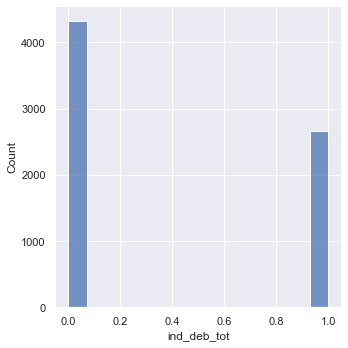

In [1265]:
sns.displot(df['ind_deb_tot'])

In [1266]:
sns.displot(df['pj_nr_setor_econ'])

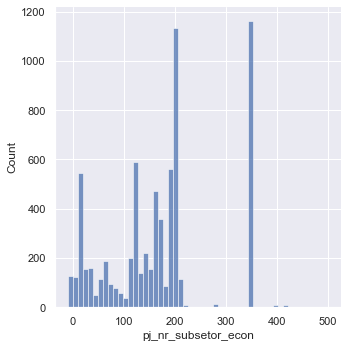

In [1267]:
sns.displot(df['pj_nr_subsetor_econ'])

In [1268]:
sns.displot(df['pj_nr_ativ_econ'])

#### Plotando a matriz de correlação.

#### Há variáveis correlacionadas que precisam ser removidas do dataset

In [1269]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

Text(0.5, 1.0, 'Correlation Matrix')

In [1270]:
 # Exclusão de variáveis 
df = df.drop(['pj_nr_subsetor_econ','ind_benef'], axis=1) # Alta correlação com ind_nr_setor_econ

Text(0.5, 1.0, 'Correlation Matrix')

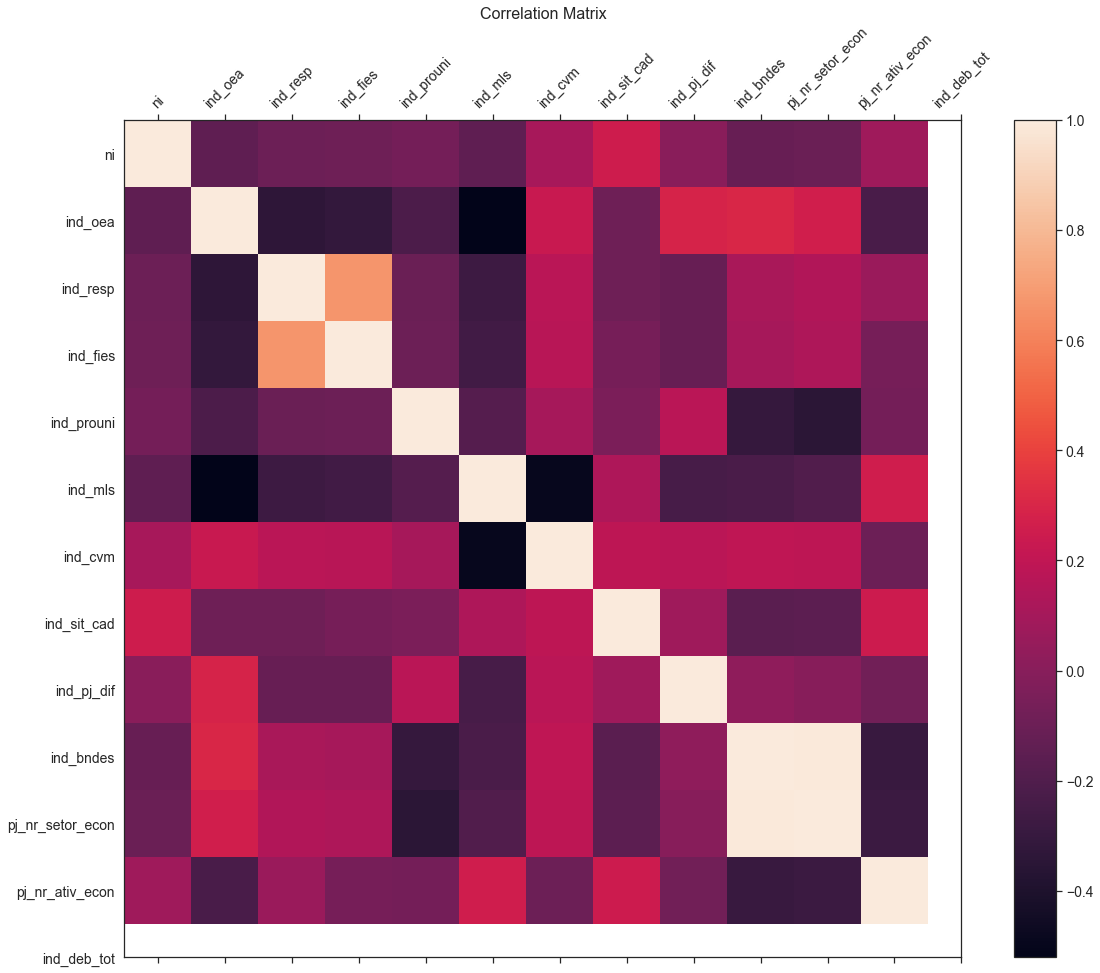

In [1272]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

<div style="background-color:#00cc00;color:white;padding:10px;">
    <h1>Criação de Modelos de Machine Learning</h1>
</div>

#### Criação de cópia da base para treino e teste

In [1181]:
df2 = df.copy() 

In [1182]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6987 entries, 0 to 6987
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ni                6987 non-null   object
 1   ind_oea           6987 non-null   int32 
 2   ind_resp          6987 non-null   int32 
 3   ind_fies          6987 non-null   int32 
 4   ind_prouni        6987 non-null   int32 
 5   ind_mls           6987 non-null   int32 
 6   ind_cvm           6987 non-null   int32 
 7   ind_sit_cad       6987 non-null   int32 
 8   ind_pj_dif        6987 non-null   int32 
 9   ind_bndes         6987 non-null   int32 
 10  pj_nr_setor_econ  6987 non-null   int32 
 11  pj_nr_ativ_econ   6987 non-null   int32 
 12  ind_deb_tot       6987 non-null   int32 
dtypes: int32(12), object(1)
memory usage: 436.7+ KB


In [1183]:
df2 = df2.drop(['ni'], axis=1)

#### Divisão da base em treino e teste

In [1184]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [1185]:
X = df2.drop('ind_deb_tot', axis=1).values
Y = df2['ind_deb_tot']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=17)

df_final.shape

(6987, 13)

In [1186]:
print((y_test).count())

2097


In [1187]:
print((y_test == 0).sum())

1279


In [1188]:
print((y_test == 1).sum())

818


<div style="background-color:MediumSeaGreen;color:white;padding:10px;">
    <h2>Modelo 0: Predição aleatória com base no percentual encontrado na amostra</h2>
</div>

#### Base de comparação: percentual de participação de amostras empresas Sem Débito entrontrada na base x_teste e y_teste

In [1189]:
# Proporção de amostras Sem Débito (y_test = 0)
print((y_test == 0).sum()/y_test.shape[0])

0.6099189318073438


In [1190]:
# Proporção de amostras Com Débito (y_test = 1)
print((y_test != 0).sum()/y_test.shape[0])

0.3900810681926562


<div style="background-color:MediumSeaGreen;color:white;padding:10px;">
    <h2>Modelo 1: Naive Bayes Classifier</h2>
</div>

In [1191]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB

#### Treinando o modelo

In [1192]:
model1 = GaussianNB()
model1.fit(x_train, y_train)

y_pred1 = model1.predict(x_test)

#### Avaliação do modelo

In [1193]:
print("Acurácia (base de treinamento):", model1.score(x_train, y_train))

Acurácia (base de treinamento): 0.6627811860940696


In [1194]:
print("Acurácia de previsão:", accuracy_score(y_test, y_pred1))

Acurácia de previsão: 0.6528373867429661


#### Avaliação do modelo através da validação cruzada utilizando as bases de treino

In [1195]:
scores = cross_val_score(model1, x_train, y_train, cv=5, scoring='f1_macro')
print("f1-score macro (base de treinamento):", scores)
print("f1-score macro (base de treinamento): média = ", scores.sum()/5)

f1-score macro (base de treinamento): [0.65146721 0.66035733 0.62293363 0.65154695 0.65736159]
f1-score macro (base de treinamento): média =  0.6487333443747707


In [1196]:
scores = cross_val_score(model1, x_train, y_train, cv=5, scoring='f1_weighted')
print("f1-score weighted (base de treinamento):", scores)
print("f1-score weighted (base de treinamento): média = ", scores.sum()/5)

f1-score weighted (base de treinamento): [0.66794491 0.67757233 0.64015322 0.66676038 0.67266505]
f1-score weighted (base de treinamento): média =  0.6650191787791964


#### Computando outras métricas: Precision, Recall e F1

In [1197]:
print(classification_report(y_test, y_pred1, target_names=["SemDebito", "ComDebito"]))

              precision    recall  f1-score   support

   SemDebito       0.73      0.68      0.70      1279
   ComDebito       0.55      0.61      0.58       818

    accuracy                           0.65      2097
   macro avg       0.64      0.65      0.64      2097
weighted avg       0.66      0.65      0.66      2097



#### Plotando a matriz de confusão

In [1198]:
# Legenda
x_legenda = ["SemDebito","ComDebito"] # legenda do eixo x
y_legenda = ["SemDebito_Prev","ComDebito_Prev"] # legenda do eixo y

In [1199]:
cf_matrix1 = confusion_matrix(y_test, y_pred1)

In [1200]:
cf_table = pd.DataFrame(data=cf_matrix1, index=x_legenda, columns=y_legenda)
print(cf_table)

           SemDebito_Prev  ComDebito_Prev
SemDebito             867             412
ComDebito             316             502


In [1201]:
sns.heatmap(cf_matrix1, annot=True, fmt="g", cmap='Blues', xticklabels= x_legenda, yticklabels = y_legenda, 
            cbar_kws={"orientation": "horizontal"}) 

<AxesSubplot:>

<div style="background-color:MediumSeaGreen;color:white;padding:10px;">
    <h2>Modelo 2: Decision Tree Classifier</h2>
</div>

In [1202]:
from sklearn.tree import DecisionTreeClassifier

#### Treinando o modelo

In [1203]:
model2 = DecisionTreeClassifier(random_state=0, criterion='entropy')
model2 = model2.fit(x_train, y_train)

y_pred2 = model2.predict(x_test)

#### Avaliação do modelo

In [1204]:
print("Acurácia (base de treinamento):", model2.score(x_train, y_train))

Acurácia (base de treinamento): 0.812678936605317


In [1205]:
print("Acurácia de previsão:", accuracy_score(y_test, y_pred2))

Acurácia de previsão: 0.7181688125894135


#### Avaliação do modelo através da validação cruzada utilizando as bases de treino

In [1206]:
scores = cross_val_score(model2, x_train, y_train, cv=5, scoring='f1_macro')
print("f1-score macro (base de treinamento):", scores)
print("f1-score macro (base de treinamento): média = ", scores.sum()/5)

f1-score macro (base de treinamento): [0.69540194 0.65750429 0.64756255 0.6492925  0.68390767]
f1-score macro (base de treinamento): média =  0.6667337912570405


In [1207]:
scores = cross_val_score(model2, x_train, y_train, cv=5, scoring='f1_weighted')
print("f1-score weighted (base de treinamento):", scores)
print("f1-score weighted (base de treinamento): média = ", scores.sum()/5)

f1-score weighted (base de treinamento): [0.72003451 0.68689532 0.67727613 0.6811482  0.70968458]
f1-score weighted (base de treinamento): média =  0.6950077472553297


#### Computando outras métricas: Precision, Recall e F1

In [1208]:
print(classification_report(y_test, y_pred2, target_names=["SemDebito", "ComDebito"]))

              precision    recall  f1-score   support

   SemDebito       0.73      0.85      0.79      1279
   ComDebito       0.69      0.51      0.58       818

    accuracy                           0.72      2097
   macro avg       0.71      0.68      0.69      2097
weighted avg       0.71      0.72      0.71      2097



#### Plotando a matriz de confusão

In [1209]:
cf_matrix2 = confusion_matrix(y_test, y_pred2)

In [1210]:
cf_table = pd.DataFrame(data=cf_matrix2, index=x_legenda, columns=y_legenda)
print(cf_table)

           SemDebito_Prev  ComDebito_Prev
SemDebito            1091             188
ComDebito             403             415


In [1211]:
sns.heatmap(cf_matrix2, annot=True, fmt="g", cmap='Blues', xticklabels= x_legenda, yticklabels = y_legenda, 
            cbar_kws={"orientation": "horizontal"}) 

<AxesSubplot:>

<div style="background-color:MediumSeaGreen;color:white;padding:10px;">
    <h2>Modelo 3: Random Forest Classifier</h2>
</div>

In [1212]:
from sklearn.ensemble import RandomForestClassifier

#### Treinando o modelo

In [1213]:
model3 = RandomForestClassifier(max_depth=5)
model3 = RandomForestClassifier(n_estimators=10)
model3.fit(x_train, y_train)

y_pred3 = model3.predict(x_test)

#### Avaliação do modelo

In [1214]:
print("Acurácia (base de treinamento):", model3.score(x_train, y_train))

Acurácia (base de treinamento): 0.8047034764826176


In [1215]:
print("Acurácia de previsão:", accuracy_score(y_test, y_pred3))

Acurácia de previsão: 0.7181688125894135


#### Avaliação do modelo através da validação cruzada utilizando as bases de treino

In [1216]:
scores = cross_val_score(model3, x_train, y_train, cv=5, scoring='f1_macro')
print("f1-score macro (base de treinamento):", scores)
print("f1-score macro (base de treinamento): média = ", scores.sum()/5)

f1-score macro (base de treinamento): [0.69271953 0.66602555 0.64536125 0.66264229 0.68804549]
f1-score macro (base de treinamento): média =  0.6709588200004835


In [1217]:
scores = cross_val_score(model3, x_train, y_train, cv=5, scoring='f1_weighted')
print("f1-score weighted (base de treinamento):", scores)
print("f1-score weighted (base de treinamento): média = ", scores.sum()/5)

f1-score weighted (base de treinamento): [0.71522544 0.68555614 0.6947087  0.69522915 0.7087117 ]
f1-score weighted (base de treinamento): média =  0.6998862256539902


#### Computando outras métricas: Precision, Recall e F1

In [1218]:
print(classification_report(y_test, y_pred3, target_names=["SemDebito", "ComDebito"]))

              precision    recall  f1-score   support

   SemDebito       0.74      0.84      0.78      1279
   ComDebito       0.68      0.53      0.60       818

    accuracy                           0.72      2097
   macro avg       0.71      0.69      0.69      2097
weighted avg       0.71      0.72      0.71      2097



#### Plotando a matriz de confusão

In [1219]:
cf_matrix3 = confusion_matrix(y_test, y_pred3)

In [1220]:
cf_table = pd.DataFrame(data=cf_matrix3, index=x_legenda, columns=y_legenda)
print(cf_table)

           SemDebito_Prev  ComDebito_Prev
SemDebito            1069             210
ComDebito             381             437


In [1221]:
sns.heatmap(cf_matrix3, annot=True, fmt="g", cmap='Blues', xticklabels= x_legenda, yticklabels = y_legenda, 
            cbar_kws={"orientation": "horizontal"}) 

<AxesSubplot:>

<div style="background-color:MediumSeaGreen;color:white;padding:10px;">
    <h2>Modelo 4: Random Forest Classifier utilizando Grid Search e Cross Validation</h2>
</div>

#### Utilizando o Grid Search para encontrar parâmetros melhores para o modelo

In [1273]:
from sklearn.model_selection import GridSearchCV

In [1274]:
parameters = {'n_estimators':[5, 10, 25, 50, 75, 100, 125, 150, 175, 200], 
              'max_depth':[None, 5, 8, 10, 12, 15, 18, 20, 25]}

In [1275]:
model4 = RandomForestClassifier()

clf = GridSearchCV(model4, parameters, cv=5, scoring='f1_weighted')

clf.fit(x_train,y_train)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

#### Lista dos parâmetros em sequência de cada uma das iterações com o respectivo rank

In [1276]:
print(clf.cv_results_['param_max_depth'])

[None None None None None None None None None None 5 5 5 5 5 5 5 5 5 5 8 8
 8 8 8 8 8 8 8 8 10 10 10 10 10 10 10 10 10 10 12 12 12 12 12 12 12 12 12
 12 15 15 15 15 15 15 15 15 15 15 18 18 18 18 18 18 18 18 18 18 20 20 20
 20 20 20 20 20 20 20 25 25 25 25 25 25 25 25 25 25]


In [1277]:
print(clf.cv_results_['param_n_estimators'])

[5 10 25 50 75 100 125 150 175 200 5 10 25 50 75 100 125 150 175 200 5 10
 25 50 75 100 125 150 175 200 5 10 25 50 75 100 125 150 175 200 5 10 25 50
 75 100 125 150 175 200 5 10 25 50 75 100 125 150 175 200 5 10 25 50 75
 100 125 150 175 200 5 10 25 50 75 100 125 150 175 200 5 10 25 50 75 100
 125 150 175 200]


In [1278]:
print(clf.cv_results_['rank_test_score'])

[88 83 86 85 70 72 67 46 50 58 68 32 36 63 44 52 57 38 40 39 25 11 20 21
 16 12  8  9 14 15 31  4 13  3  6 10  7  5  2  1 29 28 26 24 23 27 17 19
 18 22 81 49 56 43 35 30 34 42 37 33 90 79 78 73 75 47 60 65 80 51 82 61
 89 74 66 71 45 54 41 64 87 48 77 76 55 69 59 53 62 84]


#### Parâmetros que apresentaram a melhor performance no rank

In [1279]:
clf.cv_results_['params']
print(clf.best_params_)

{'max_depth': 10, 'n_estimators': 200}


#### Executando novamente o modelo para os melhores parâmetros

#### Treinando o modelo

In [1280]:
model5 = RandomForestClassifier(max_depth=10)
model5 = RandomForestClassifier(n_estimators=100)
model5.fit(x_train, y_train)

y_pred5 = model5.predict(x_test)

#### Avaliação do modelo

In [1281]:
print("Acurácia (base de treinamento):", model5.score(x_train, y_train))

Acurácia (base de treinamento): 0.812678936605317


In [1282]:
print("Acurácia de previsão:", accuracy_score(y_test, y_pred5))

Acurácia de previsão: 0.7277062470195518


#### Avaliação do modelo através da validação cruzada utilizando as bases de treino

In [1283]:
scores = cross_val_score(model5, x_train, y_train, cv=5, scoring='f1_macro')
print("f1-score macro (base de treinamento):", scores)
print("f1-score macro (base de treinamento): média = ", scores.sum()/5)

f1-score macro (base de treinamento): [0.70232072 0.66449711 0.65205255 0.66987918 0.69833853]
f1-score macro (base de treinamento): média =  0.677417616336623


In [1284]:
scores = cross_val_score(model5, x_train, y_train, cv=5, scoring='f1_weighted')
print("f1-score weighted (base de treinamento):", scores)
print("f1-score weighted (base de treinamento): média = ", scores.sum()/5)

f1-score weighted (base de treinamento): [0.72309379 0.69817596 0.69261767 0.69578631 0.71773299]
f1-score weighted (base de treinamento): média =  0.7054813431788428


#### Computando outras métricas: Precision, Recall e F1

In [1285]:
print(classification_report(y_test, y_pred5, target_names=["SemDebito", "ComDebito"]))

              precision    recall  f1-score   support

   SemDebito       0.74      0.84      0.79      1279
   ComDebito       0.69      0.55      0.61       818

    accuracy                           0.73      2097
   macro avg       0.72      0.70      0.70      2097
weighted avg       0.72      0.73      0.72      2097



#### Plotando a matriz de confusão

In [1286]:
cf_matrix5 = confusion_matrix(y_test, y_pred5)

In [1287]:
cf_table = pd.DataFrame(data=cf_matrix5, index=x_legenda, columns=y_legenda)
print(cf_table)

           SemDebito_Prev  ComDebito_Prev
SemDebito            1078             201
ComDebito             370             448


In [1288]:
sns.heatmap(cf_matrix5, annot=True, fmt="g", cmap='Blues', xticklabels= x_legenda, yticklabels = y_legenda, 
            cbar_kws={"orientation": "horizontal"}) 

<AxesSubplot:>

<div style="background-color:#00cc00;color:white;padding:10px;">
    <h1>Resultados</h1>
</div>

In [1289]:
# Distribuição de classes da base.
print('Sem Débito', round(df2['ind_deb_tot'].value_counts()[0]/len(df2) * 100,2), '% do dataset')
print('Com Débito', round(df2['ind_deb_tot'].value_counts()[1]/len(df2) * 100,2), '% do dataset')

Sem Débito 61.87 % do dataset
Com Débito 38.13 % do dataset


Text(0.5, 1.0, 'Distribuição de Classes \n (0: Sem Débito | 1: Com Débito)')

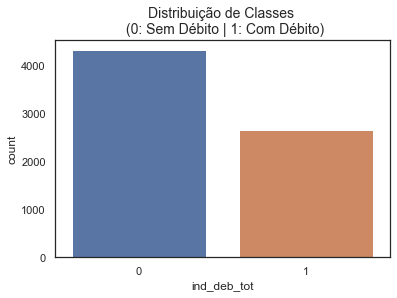

In [1290]:
sns.countplot(x='ind_deb_tot', data=df2)
plt.title('Distribuição de Classes \n (0: Sem Débito | 1: Com Débito)', fontsize=14)

In [ ]:
#sns.set_theme(style="darkgrid")
#df2 = sns.load_dataset("df2")

In [1307]:
# Distribuição de empresas diferenciadas
print('PJ Demais', round(df2['ind_pj_dif'].value_counts()[0]/len(df2) * 100,2), '% do dataset')
print('PJ Diferenciada', round(df2['ind_pj_dif'].value_counts()[1]/len(df2) * 100,2), '% do dataset')

PJ Demais 81.79 % do dataset
PJ Diferenciada 18.21 % do dataset


Text(0.5, 1.0, 'Distribuição de Classes \n (0: Sem Débito | 1: Com Débito)')

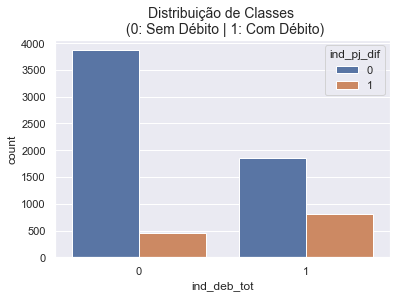

In [1310]:
sns.countplot(x='ind_deb_tot', hue="ind_pj_dif", data=df2)
plt.title('Distribuição de Classes \n (0: Sem Débito | 1: Com Débito)', fontsize=14)

In [1318]:
# Distribuição de empresas no dataset
print('Empresa de capital aberto (CVM)', round(df2['ind_cvm'].value_counts()[0]/len(df2) * 100,2), '% do dataset')
print('Empresa de capital fechado', round(df2['ind_cvm'].value_counts()[1]/len(df2) * 100,2), '% do dataset')

Empresa de capital aberto (CVM) 67.12 % do dataset
Empresa de capital fechado 32.88 % do dataset


In [1319]:
sns.countplot(x='ind_deb_tot', hue="ind_cvm", data=df2)
plt.title('Distribuição de Classes \n (0: Sem Débito | 1: Com Débito)', fontsize=14)

Text(0.5, 1.0, 'Distribuição de Classes \n (0: Sem Débito | 1: Com Débito)')

In [1324]:
# Distribuição de empresas no dataset
print('PJ sem Benefício Mais Leite Saudável', round(df2['ind_mls'].value_counts()[0]/len(df2) * 100,2), '% do dataset')
print('PJ com Benefício Mais Leite Saudável', round(df2['ind_mls'].value_counts()[1]/len(df2) * 100,2), '% do dataset')

PJ sem Benefício Mais Leite Saudável 93.83 % do dataset
PJ com Benefício Mais Leite Saudável 6.17 % do dataset


In [1325]:
sns.countplot(x='ind_deb_tot', hue="ind_mls", data=df2)
plt.title('Distribuição de Classes \n (0: Sem Débito | 1: Com Débito)', fontsize=14)

Text(0.5, 1.0, 'Distribuição de Classes \n (0: Sem Débito | 1: Com Débito)')

## FIM